# COVID-19 in Ireland
__Alessandra Ravida__ - _UCDPA Certificate in Introductory Data Analytics - January 2022_

***

## About
In this project I am analysing Covid-19 datasets in Ireland. Firstly I'll explore the datasets per se, looking for interesting patterns, and then I'll try to contextualise patterns and explore correlations with other data (such as impact of some govenrnment restrictions on some specific cohorts, vaccination data and infection trends in other countries).

***

## Python Packages

__Import all Relevant Packages__

In [1]:
#Here I import requests, numpy, pandas, matplotlib and seaborn

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***

## Import and Clean data - Covid-19 IRL

__Importing COVID-19 Dataset for Ireland__
[Click here for dataset source](https://covid-19.geohive.ie/datasets/d8eb52d56273413b84b0187a4e9117be/explore?showTable=true)

In [2]:
#This dataset is a csv file saved locally, I import it as Pandas DataFrame.

covid_IRL = pd.read_csv('/Users/Alessandra/Dropbox/Data Analytics/Project/UCDPA_AlessandraRavida/Data/COVID-19_HPSC_Detailed_Statistics_Profile.csv')

__Understanding the dataset__

Check basic data structure of the data set via .info(), .head() functions.
Also note the first and last day of dataset for personal reference.

In [3]:
#I start analysing structure of the df
covid_IRL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X                            673 non-null    float64
 1   Y                            673 non-null    float64
 2   Date                         673 non-null    object 
 3   ConfirmedCovidCases          673 non-null    int64  
 4   TotalConfirmedCovidCases     673 non-null    int64  
 5   ConfirmedCovidDeaths         502 non-null    float64
 6   TotalCovidDeaths             673 non-null    int64  
 7   StatisticsProfileDate        673 non-null    object 
 8   CovidCasesConfirmed          671 non-null    float64
 9   HospitalisedCovidCases       671 non-null    float64
 10  RequiringICUCovidCases       671 non-null    float64
 11  HealthcareWorkersCovidCases  671 non-null    float64
 12  ClustersNotified             651 non-null    float64
 13  HospitalisedAged5   

In [48]:
covid_IRL.columns

Index(['X', 'Y', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'StatisticsProfileDate',
       'CovidCasesConfirmed', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'HealthcareWorkersCovidCases',
       'ClustersNotified', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'Male', 'Female', 'Unknown', 'Aged1to4',
       'Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64', 'Median_Age', 'CommunityTransmission', 'CloseContact',
       'TravelAbroad', 'FID', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Aged65to74',
       'Aged75to84', 'Aged85up'],
      dtype='object')

In [4]:
#look at the first 5 rows of the dataset

covid_IRL.head()

X          Y                    Date  ConfirmedCovidCases  \
0 -7.692596  53.288234  2020/02/29 00:00:00+00                    1   
1 -7.692596  53.288234  2020/03/03 00:00:00+00                    1   
2 -7.692596  53.288234  2020/03/04 00:00:00+00                    4   
3 -7.692596  53.288234  2020/03/05 00:00:00+00                    7   
4 -7.692596  53.288234  2020/03/06 00:00:00+00                    5   

   TotalConfirmedCovidCases  ConfirmedCovidDeaths  TotalCovidDeaths  \
0                         1                   0.0                 0   
1                         2                   0.0                 0   
2                         6                   0.0                 0   
3                        13                   0.0                 0   
4                        18                   0.0                 0   

    StatisticsProfileDate  CovidCasesConfirmed  HospitalisedCovidCases  ...  \
0  2020/02/27 00:00:00+00                  NaN                     NaN  ...   
1  2020/03/01 00:00:00+00                  NaN                     NaN  ...   
2  2020/03/02 00:00:00+00                  1.0                     0.0  ...   
3  2020/03/03 00:00:00+00                  2.0                     1.0  ...   
4  2020/03/04 00:00:00+00                  5.0                     4.0  ...   

   CommunityTransmission  CloseContact  TravelAbroad  FID  \
0                      0             0             0    1   
1                      0             0             0    2   
2                      0             0             0    3   
3                      0             0             0    4   
4                      0             0             0    5   

   HospitalisedAged65to74  HospitalisedAged75to84  HospitalisedAged85up  \
0                     NaN                     NaN                   NaN   
1                     NaN                     NaN                   NaN   
2                     0.0                     0.0                   0.0   
3                     0.0                     0.0                   0.0   
4                     0.0                     0.0                   0.0   

   Aged65to74  Aged75to84  Aged85up  
0         NaN         NaN       NaN  
1         NaN         NaN       NaN  
2         0.0         0.0       0.0  
3         0.0         0.0       0.0  
4         0.0         0.0       0.0  

[5 rows x 41 columns]

In [5]:
"""
First date in dataset is 29th of Feb 2020.
I now check what's the last date.
This information will be important to slice other time-based datasets.
"""
#I select the last row of the dataframe via its index number and only the date column

covid_IRL.loc[672 , "Date"]

'2022/01/03 00:00:00+00'

__Cleaning the dataset__

Check for NaN values and replace them with 0.0

In [6]:
""" 
In the first rows of the df, there are some NaN.
I believe that for the first few days they might not have 
tested all hospitalised patients for COVID hence it's more correct 
to report those values as NaN rather than 0.0, however I think that
for the purposese of my analysis, it's safe to convert NaN into 0.0.
"""

#I check in how many more instances I find NaN in the dataset

covid_IRL.isna().sum()

X                                0
Y                                0
Date                             0
ConfirmedCovidCases              0
TotalConfirmedCovidCases         0
ConfirmedCovidDeaths           171
TotalCovidDeaths                 0
StatisticsProfileDate            0
CovidCasesConfirmed              2
HospitalisedCovidCases           2
RequiringICUCovidCases           2
HealthcareWorkersCovidCases      2
ClustersNotified                22
HospitalisedAged5                2
HospitalisedAged5to14            2
HospitalisedAged15to24           2
HospitalisedAged25to34           2
HospitalisedAged35to44           2
HospitalisedAged45to54           2
HospitalisedAged55to64           2
Male                             2
Female                           2
Unknown                          2
Aged1to4                         2
Aged5to14                        2
Aged15to24                       2
Aged25to34                       2
Aged35to44                       2
Aged45to54          

In [7]:
""" 
The column with most NaN is ConfirmedCovidDeaths, 
this is due to the fact that the reporting system for 
COVID deaths has changed in the summer of 2021 from a daily
to a weekly report, hence numbers appear now only 
once a week.

Note:It might be better to analyse data on a weekly 
basis rather than on a dayly basis
"""

#replacing NaN with 0 and check if successful

covid_IRL_fill = covid_IRL.fillna(0)
covid_IRL_fill.isna().sum()

X                              0
Y                              0
Date                           0
ConfirmedCovidCases            0
TotalConfirmedCovidCases       0
ConfirmedCovidDeaths           0
TotalCovidDeaths               0
StatisticsProfileDate          0
CovidCasesConfirmed            0
HospitalisedCovidCases         0
RequiringICUCovidCases         0
HealthcareWorkersCovidCases    0
ClustersNotified               0
HospitalisedAged5              0
HospitalisedAged5to14          0
HospitalisedAged15to24         0
HospitalisedAged25to34         0
HospitalisedAged35to44         0
HospitalisedAged45to54         0
HospitalisedAged55to64         0
Male                           0
Female                         0
Unknown                        0
Aged1to4                       0
Aged5to14                      0
Aged15to24                     0
Aged25to34                     0
Aged35to44                     0
Aged45to54                     0
Aged55to64                     0
Median_Age

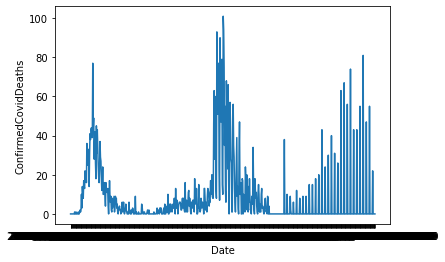

'\nI need to address the display of the x-axis to tidy up the visualisation\n'

In [8]:
"""
I want to see how the confirmed covid deaths column looks,
i think it's misleading since all the other data is daily.

If I use this column I will manipulate all the other columns so to show 
weekly data and not daily
"""

#make a quick line plot of Confirmed covid cases vs date
sns.lineplot(data=covid_IRL_fill, x="Date", y="ConfirmedCovidDeaths")
plt.show()

"""
I need to address the display of the x-axis to tidy up the visualisation
"""

Convert Date column into datetime variables

In [9]:
"""
The display of the x axis needs to be addressed.
One problem could be that the Date column is not seen as date.
If I convert the date column into date variable I might be able
to control the axes better.
"""

#I check the type of variables in the column Date
covid_IRL_fill.dtypes

X                              float64
Y                              float64
Date                            object
ConfirmedCovidCases              int64
TotalConfirmedCovidCases         int64
ConfirmedCovidDeaths           float64
TotalCovidDeaths                 int64
StatisticsProfileDate           object
CovidCasesConfirmed            float64
HospitalisedCovidCases         float64
RequiringICUCovidCases         float64
HealthcareWorkersCovidCases    float64
ClustersNotified               float64
HospitalisedAged5              float64
HospitalisedAged5to14          float64
HospitalisedAged15to24         float64
HospitalisedAged25to34         float64
HospitalisedAged35to44         float64
HospitalisedAged45to54         float64
HospitalisedAged55to64         float64
Male                           float64
Female                         float64
Unknown                        float64
Aged1to4                       float64
Aged5to14                      float64
Aged15to24               

In [10]:
#I will convert the Date values into datetime variables
covid_IRL_fill['Date'] = pd.to_datetime(covid_IRL_fill['Date'], format= '%Y-%m-%d')

#I check if the format of the Date column has changed successfully
covid_IRL_fill.dtypes

X                                          float64
Y                                          float64
Date                           datetime64[ns, UTC]
ConfirmedCovidCases                          int64
TotalConfirmedCovidCases                     int64
ConfirmedCovidDeaths                       float64
TotalCovidDeaths                             int64
StatisticsProfileDate                       object
CovidCasesConfirmed                        float64
HospitalisedCovidCases                     float64
RequiringICUCovidCases                     float64
HealthcareWorkersCovidCases                float64
ClustersNotified                           float64
HospitalisedAged5                          float64
HospitalisedAged5to14                      float64
HospitalisedAged15to24                     float64
HospitalisedAged25to34                     float64
HospitalisedAged35to44                     float64
HospitalisedAged45to54                     float64
HospitalisedAged55to64         

In [11]:
#I want to see how the date column looks like
covid_IRL_fill["Date"]

0     2020-02-29 00:00:00+00:00
1     2020-03-03 00:00:00+00:00
2     2020-03-04 00:00:00+00:00
3     2020-03-05 00:00:00+00:00
4     2020-03-06 00:00:00+00:00
                 ...           
668   2021-12-30 00:00:00+00:00
669   2021-12-31 00:00:00+00:00
670   2022-01-01 00:00:00+00:00
671   2022-01-02 00:00:00+00:00
672   2022-01-03 00:00:00+00:00
Name: Date, Length: 673, dtype: datetime64[ns, UTC]

Remove columns I am not interested in

In [12]:
#Drop columns I am not interested in
covid_IRL_clean=covid_IRL_fill.drop(["X", "Y","StatisticsProfileDate", 
                                     "CovidCasesConfirmed",
                                     "HealthcareWorkersCovidCases", 
                                     "ClustersNotified", "Median_Age",
                                     "CommunityTransmission", "CloseContact", 
                                     "TravelAbroad"], axis='columns')

#Check the columns in the new df
covid_IRL_clean.columns


Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'Male', 'Female', 'Unknown', 'Aged1to4',
       'Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64', 'FID', 'HospitalisedAged65to74', 'HospitalisedAged75to84',
       'HospitalisedAged85up', 'Aged65to74', 'Aged75to84', 'Aged85up'],
      dtype='object')

Rearrange order of columns

In [13]:
#rearrange columns
covid_IRL_ordered=covid_IRL_clean[["FID","Date", "ConfirmedCovidCases", "TotalConfirmedCovidCases", "ConfirmedCovidDeaths", "TotalCovidDeaths", 'HospitalisedCovidCases', 'RequiringICUCovidCases', 'Aged1to4','Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64','Aged65to74', 'Aged75to84', 'Aged85up','HospitalisedAged5', 'HospitalisedAged5to14','HospitalisedAged15to24', 'HospitalisedAged25to34', 'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74', 'HospitalisedAged75to84','HospitalisedAged85up', 'Male', 'Female', 'Unknown']]
covid_IRL_ordered.columns

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown'],
      dtype='object')

Set the Date column as index

In [14]:
#I set the date column as index
covid_IRL_ordered.set_index("Date")

FID  ConfirmedCovidCases  TotalConfirmedCovidCases  \
Date                                                                            
2020-02-29 00:00:00+00:00    1                    1                         1   
2020-03-03 00:00:00+00:00    2                    1                         2   
2020-03-04 00:00:00+00:00    3                    4                         6   
2020-03-05 00:00:00+00:00    4                    7                        13   
2020-03-06 00:00:00+00:00    5                    5                        18   
...                        ...                  ...                       ...   
2021-12-30 00:00:00+00:00  669                20554                    768449   
2021-12-31 00:00:00+00:00  670                20110                    788559   
2022-01-01 00:00:00+00:00  671                23281                    811840   
2022-01-02 00:00:00+00:00  672                17071                    828911   
2022-01-03 00:00:00+00:00  673                16986                    845897   

                           ConfirmedCovidDeaths  TotalCovidDeaths  \
Date                                                                
2020-02-29 00:00:00+00:00                   0.0                 0   
2020-03-03 00:00:00+00:00                   0.0                 0   
2020-03-04 00:00:00+00:00                   0.0                 0   
2020-03-05 00:00:00+00:00                   0.0                 0   
2020-03-06 00:00:00+00:00                   0.0                 0   
...                                         ...               ...   
2021-12-30 00:00:00+00:00                   0.0              5912   
2021-12-31 00:00:00+00:00                   0.0              5912   
2022-01-01 00:00:00+00:00                   0.0              5912   
2022-01-02 00:00:00+00:00                   0.0              5912   
2022-01-03 00:00:00+00:00                   0.0              5912   

                           HospitalisedCovidCases  RequiringICUCovidCases  \
Date                                                                        
2020-02-29 00:00:00+00:00                     0.0                     0.0   
2020-03-03 00:00:00+00:00                     0.0                     0.0   
2020-03-04 00:00:00+00:00                     0.0                     0.0   
2020-03-05 00:00:00+00:00                     1.0                     0.0   
2020-03-06 00:00:00+00:00                     4.0                     0.0   
...                                           ...                     ...   
2021-12-30 00:00:00+00:00                 21662.0                  2300.0   
2021-12-31 00:00:00+00:00                 21662.0                  2300.0   
2022-01-01 00:00:00+00:00                 21662.0                  2300.0   
2022-01-02 00:00:00+00:00                 21662.0                  2300.0   
2022-01-03 00:00:00+00:00                 21662.0                  2300.0   

                           Aged1to4  Aged5to14  Aged15to24  ...  \
Date                                                        ...   
2020-02-29 00:00:00+00:00       0.0        0.0         0.0  ...   
2020-03-03 00:00:00+00:00       0.0        0.0         0.0  ...   
2020-03-04 00:00:00+00:00       0.0        1.0         0.0  ...   
2020-03-05 00:00:00+00:00       0.0        1.0         0.0  ...   
2020-03-06 00:00:00+00:00       0.0        2.0         0.0  ...   
...                             ...        ...         ...  ...   
2021-12-30 00:00:00+00:00   29660.0    94523.0    121029.0  ...   
2021-12-31 00:00:00+00:00   29660.0    94523.0    121029.0  ...   
2022-01-01 00:00:00+00:00   29660.0    94523.0    121029.0  ...   
2022-01-02 00:00:00+00:00   29660.0    94523.0    121029.0  ...   
2022-01-03 00:00:00+00:00   29660.0    94523.0    121029.0  ...   

                           HospitalisedAged25to34  HospitalisedAged35to44  \
Date                                                                        
2020-02-29 00:00:00+00:00                     0

Convert from cumulative sums to individual figures

<ipython-input-15-74edc7eb6fc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_IRL_ordered["HospitalisedCovidCases_diff"] = covid_IRL_ordered["HospitalisedCovidCases"].sub(covid_IRL_ordered["HospitalisedCovidCases"].shift())
/Users/Alessandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Alessandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy

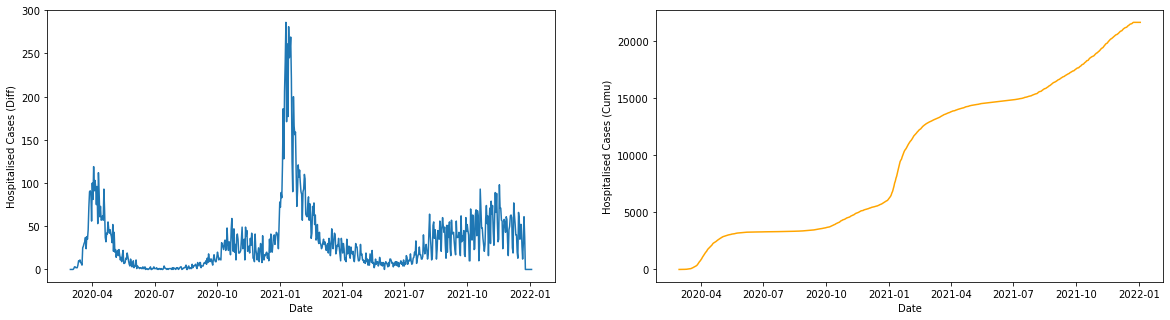

In [15]:
"""
I noticed that most columns are cumulative sums and I want to explore 
individual cases numbers to better see fluctuations
"""

#I create a new column subtracting with .sub and shift
covid_IRL_ordered["HospitalisedCovidCases_diff"] = covid_IRL_ordered["HospitalisedCovidCases"].sub(covid_IRL_ordered["HospitalisedCovidCases"].shift())
#Here I set the last subtraction value (=first row) as the first row of the original columns
covid_IRL_ordered["HospitalisedCovidCases_diff"].iloc[0] = covid_IRL_ordered["HospitalisedCovidCases"].iloc[0]


#I make a quick plot to see the difference between the columns
fig, ax =plt.subplots(1,2, sharey=False, figsize=(20,5))
ax[0].plot(covid_IRL_ordered["Date"], 
           covid_IRL_ordered["HospitalisedCovidCases_diff"], label="Diff")
ax[1].plot(covid_IRL_ordered["Date"], 
           covid_IRL_ordered["HospitalisedCovidCases"], label="Cum", color="orange")

#set labels for x and y axes
ax[0].set_ylabel("Hospitalised Cases (Diff)")
ax[1].set_ylabel("Hospitalised Cases (Cumu)")
ax[0].set_xlabel("Date")
ax[1].set_xlabel("Date")

plt.show()




In [16]:
#check some of the first values to make sure everything went well
covid_IRL_ordered[["HospitalisedCovidCases_diff", "HospitalisedCovidCases"]].head(10)

HospitalisedCovidCases_diff  HospitalisedCovidCases
0                          0.0                     0.0
1                          0.0                     0.0
2                          0.0                     0.0
3                          1.0                     1.0
4                          3.0                     4.0
5                          3.0                     7.0
6                          2.0                     9.0
7                          2.0                    11.0
8                          2.0                    13.0
9                          5.0                    18.0

I'll repeat this for the other cumulative columns

In [19]:

#I create a list of column names to which I want to apply this transformation

columns = ['RequiringICUCovidCases', 'Aged1to4',
       'Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64', 'Aged65to74', 'Aged75to84', 'Aged85up',
       'HospitalisedAged5', 'HospitalisedAged5to14', 'HospitalisedAged15to24',
       'HospitalisedAged25to34', 'HospitalisedAged35to44',
       'HospitalisedAged45to54', 'HospitalisedAged55to64',
       'HospitalisedAged65to74', 'HospitalisedAged75to84',
       'HospitalisedAged85up', 'Male', 'Female', 'Unknown']

#I create a new list with a "_diff" suffix added to each string of the list
columns_diff=[sub + "_diff" for sub in columns]


#I apply the subtraction function using the lists above for indexing
covid_IRL_ordered[columns_diff] = covid_IRL_ordered[columns].sub(covid_IRL_ordered[columns].shift())
covid_IRL_ordered[columns_diff].iloc[0] = covid_IRL_ordered[columns].iloc[0]

#I make sure that I have added new columns to the df
covid_IRL_ordered.columns

/Users/Alessandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/Alessandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/Alessandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown', 'HospitalisedCovidCases_diff', 'RequiringICUCovidCases_diff',
       'Aged1to4_diff', 'Aged5to14_diff', 'Aged15to24_diff', 'Aged25to34_diff',
       'Aged35to44_diff', 'Aged45to54_diff', 'Aged55to64_diff',
       'Aged65to74_diff', 'Aged75to84_diff', 'Aged85up_diff',
       'HospitalisedAged5_diff', 'HospitalisedAged5to14_diff',
       'HospitalisedA

In [20]:
#I pick a random pair and check subtraction has worked
covid_IRL_ordered[["HospitalisedAged65to74", "HospitalisedAged65to74_diff"]].tail(30)

HospitalisedAged65to74  HospitalisedAged65to74_diff
643                  3572.0                         11.0
644                  3575.0                          3.0
645                  3580.0                          5.0
646                  3590.0                         10.0
647                  3595.0                          5.0
648                  3605.0                         10.0
649                  3606.0                          1.0
650                  3612.0                          6.0
651                  3613.0                          1.0
652                  3615.0                          2.0
653                  3625.0                         10.0
654                  3632.0                          7.0
655                  3636.0                          4.0
656                  3642.0                          6.0
657                  3650.0                          8.0
658                  3658.0                          8.0
659                  3659.0                          1.0
660                  3663.0                          4.0
661                  3672.0                          9.0
662                  3673.0                          1.0
663                  3673.0                          0.0
664                  3673.0                          0.0
665                  3673.0                          0.0
666                  3673.0                          0.0
667                  3673.0                          0.0
668                  3673.0                          0.0
669                  3673.0                          0.0
670                  3673.0                          0.0
671                  3673.0                          0.0
672                  3673.0                          0.0

In [49]:
#check for NaN values
covid_IRL_ordered.isna().sum()

FID                            0
Date                           0
ConfirmedCovidCases            0
TotalConfirmedCovidCases       0
ConfirmedCovidDeaths           0
TotalCovidDeaths               0
HospitalisedCovidCases         0
RequiringICUCovidCases         0
Aged1to4                       0
Aged5to14                      0
Aged15to24                     0
Aged25to34                     0
Aged35to44                     0
Aged45to54                     0
Aged55to64                     0
Aged65to74                     0
Aged75to84                     0
Aged85up                       0
HospitalisedAged5              0
HospitalisedAged5to14          0
HospitalisedAged15to24         0
HospitalisedAged25to34         0
HospitalisedAged35to44         0
HospitalisedAged45to54         0
HospitalisedAged55to64         0
HospitalisedAged65to74         0
HospitalisedAged75to84         0
HospitalisedAged85up           0
Male                           0
Female                         0
Unknown   

In [22]:
covid_IRL_ordered[["HospitalisedAged85up_diff", "HospitalisedAged25to34_diff", "Male_diff"]].head()

HospitalisedAged85up_diff  HospitalisedAged25to34_diff  Male_diff
0                        NaN                          NaN        NaN
1                        0.0                          0.0        0.0
2                        0.0                          0.0        1.0
3                        0.0                          0.0        0.0
4                        0.0                          0.0        2.0

In [23]:
"""
I have some NaN, but checking the original dataset, they are there originally
so I can replace them with 0
"""

'\nI have some NaN, but checking the original dataset, they are there originally\nso I can replace them with 0\n'

In [24]:
covid_IRL_ordered=covid_IRL_ordered.fillna(0)
covid_IRL_ordered.isna().sum()

FID                            0
Date                           0
ConfirmedCovidCases            0
TotalConfirmedCovidCases       0
ConfirmedCovidDeaths           0
TotalCovidDeaths               0
HospitalisedCovidCases         0
RequiringICUCovidCases         0
Aged1to4                       0
Aged5to14                      0
Aged15to24                     0
Aged25to34                     0
Aged35to44                     0
Aged45to54                     0
Aged55to64                     0
Aged65to74                     0
Aged75to84                     0
Aged85up                       0
HospitalisedAged5              0
HospitalisedAged5to14          0
HospitalisedAged15to24         0
HospitalisedAged25to34         0
HospitalisedAged35to44         0
HospitalisedAged45to54         0
HospitalisedAged55to64         0
HospitalisedAged65to74         0
HospitalisedAged75to84         0
HospitalisedAged85up           0
Male                           0
Female                         0
Unknown   

***

## Covid-19 IRL Data Exploration and Analysis

__Cases by Age group__

The first thing I am going to explore is the cases by age group.
I am particularely interested in understanding the effect of the 
Goverment restrictions on schools opening/closing and if there
are any interesting observations.

Cumulative dataset

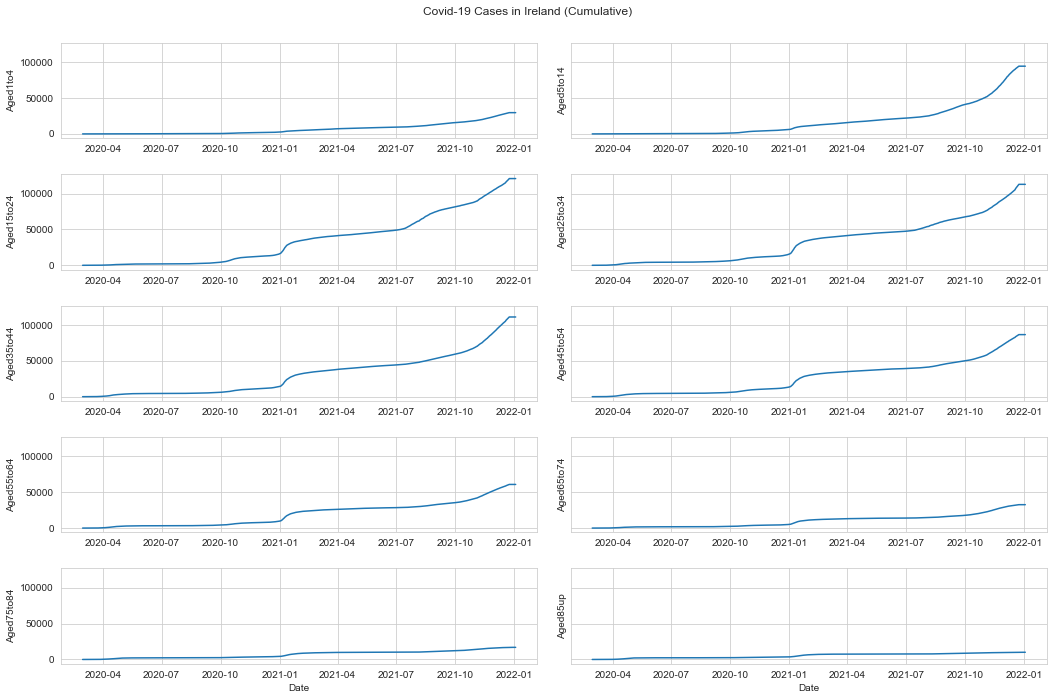

In [52]:
#set up a multiplot area 5 rows by 2 columns  
#share the ylabel so data can be compared more easily
#Set the size of the plots so that they are optimally visualised
fig, ax = plt.subplots(5,2, sharey=True, figsize = (15, 10))
fig.suptitle('Covid-19 Cases in Ireland (Cumulative)')

#define what's to go into each plot
ax[0,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged1to4"])
ax[0,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged5to14"])
ax[1,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged15to24"])
ax[1,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged25to34"])
ax[2,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged35to44"])
ax[2,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged45to54"])
ax[3,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged55to64"])
ax[3,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged65to74"])
ax[4,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged75to84"])
ax[4,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged85up"])

#set labels for x and y axes
ax[0,0].set_ylabel("Aged1to4")
ax[0,1].set_ylabel("Aged5to14")
ax[1,0].set_ylabel("Aged15to24")
ax[1,1].set_ylabel("Aged25to34")
ax[2,0].set_ylabel("Aged35to44")
ax[2,1].set_ylabel("Aged45to54")
ax[3,0].set_ylabel("Aged55to64")
ax[3,1].set_ylabel("Aged65to74")
ax[4,0].set_ylabel("Aged75to84")
ax[4,1].set_ylabel("Aged85up")
ax[4,0].set_xlabel("Date")
ax[4,1].set_xlabel("Date")

#Add padding between plots
fig.tight_layout(pad=2.0)

#save figure as png at 150dpi
fig.savefig("Cases_byAge_cum.png", dpi=150)
plt.show()

In [27]:
"""
This visualization is interesting as it's showing
1) the categoreis with highest cases numbers (5to44)
2) in the 15to24 there are 4-5 distinct waves (more bumps) than in the 35to44 age braket
3) I need to change the y axes to analyse patterns of cohorts with smaller case numbers
4) I may need to break the plot in two (2020 and 2021 as cases numbers are much higher in 2021)
"""

"\nThis visualization is interesting as it's showing\n1) the categoreis with highest cases numbers (5to44)\n2) in the 15to24 there are 4-5 distinct waves (more bumps) than in the 35to44 age braket\n3) I need to change the y axes to analyse patterns of cohorts with smaller case numbers\n4) I may need to break the plot in two (2020 and 2021 as cases numbers are much higher in 2021)\n"

Diff Dataset

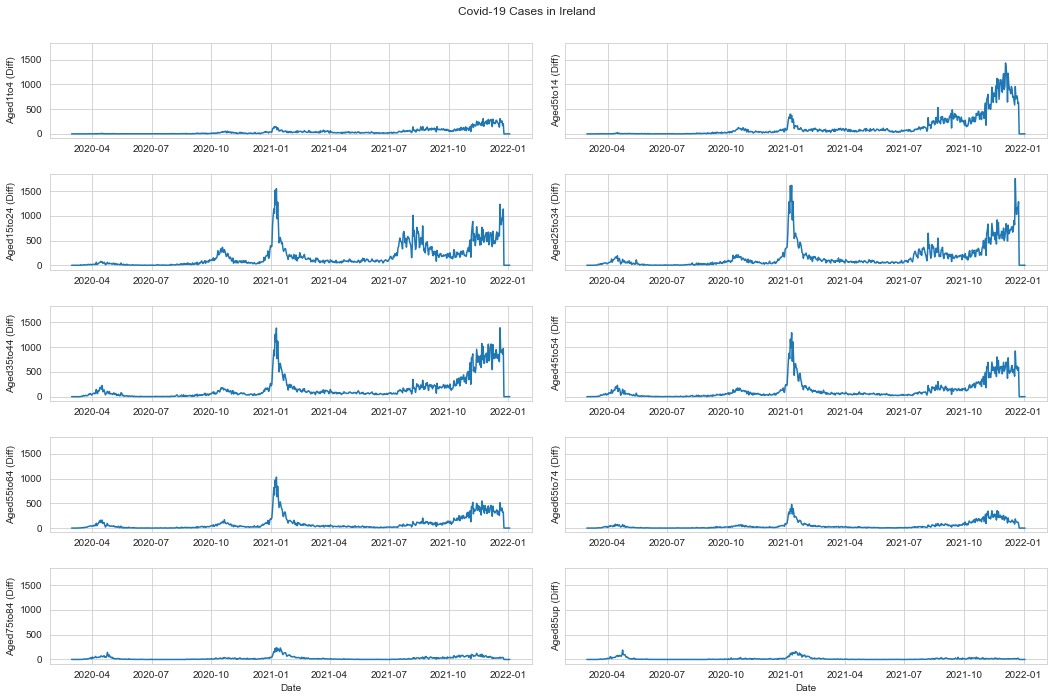

In [53]:
#set up a multiplot area 5 rows by 2 columns  
#share the ylabel so data can be compared more easily
#Set the size of the plots so that they are optimally visualised
fig, ax = plt.subplots(5,2, sharey=True, figsize = (15, 10))
fig.suptitle('Covid-19 Cases in Ireland')

#define what's to go into each plot
ax[0,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged1to4_diff"])
ax[0,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged5to14_diff"])
ax[1,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged15to24_diff"])
ax[1,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged25to34_diff"])
ax[2,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged35to44_diff"])
ax[2,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged45to54_diff"])
ax[3,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged55to64_diff"])
ax[3,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged65to74_diff"])
ax[4,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged75to84_diff"])
ax[4,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged85up_diff"])

#set labels for x and y axes
ax[0,0].set_ylabel("Aged1to4 (Diff)")
ax[0,1].set_ylabel("Aged5to14 (Diff)")
ax[1,0].set_ylabel("Aged15to24 (Diff)")
ax[1,1].set_ylabel("Aged25to34 (Diff)")
ax[2,0].set_ylabel("Aged35to44 (Diff)")
ax[2,1].set_ylabel("Aged45to54 (Diff")
ax[3,0].set_ylabel("Aged55to64 (Diff)")
ax[3,1].set_ylabel("Aged65to74 (Diff)")
ax[4,0].set_ylabel("Aged75to84 (Diff)")
ax[4,1].set_ylabel("Aged85up (Diff)")
ax[4,0].set_xlabel("Date")
ax[4,1].set_xlabel("Date")

#Add padding between plots
fig.tight_layout(pad=2.0)

#save figure as png
fig.savefig("Cases_byAge", dpi=150)
plt.show()

Bar Chart race of different age cohorts

In [29]:
#remind myself of column names
covid_IRL_ordered.columns

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown', 'HospitalisedCovidCases_diff', 'RequiringICUCovidCases_diff',
       'Aged1to4_diff', 'Aged5to14_diff', 'Aged15to24_diff', 'Aged25to34_diff',
       'Aged35to44_diff', 'Aged45to54_diff', 'Aged55to64_diff',
       'Aged65to74_diff', 'Aged75to84_diff', 'Aged85up_diff',
       'HospitalisedAged5_diff', 'HospitalisedAged5to14_diff',
       'HospitalisedA

In [30]:
#I make a new df selecting only some columns of main df
Age_Race=pd.DataFrame(covid_IRL_ordered[['Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up']])

#Preparing df for barchart race
#Values are already cumulative sum of values in each column so I don't need to make a cumsum
#Age_Race_cum_sum=Age_Race.cumsum(axis=0)

#Add Date column (I do it now because I didn't want to have a cumsum on this)
Age_Race["Date"] = covid_IRL_ordered["Date"]

Age_Race["Date"] = pd.to_datetime(Age_Race['Date'], format= '%Y-%m-%d')

#set the date column as index
Age_Race=Age_Race.set_index("Date")


In [31]:
#Age_Race_cum_sum.reindex(pd.date_range('2020-02-29', '2022-01-03')).isnull().all(1)

In [32]:
#Age_Race_cum_sum.isna().sum()

In [33]:
#make a smaller dataset to see if it works
#Bar_simple=Age_Race_cum_sum.loc[662:672,:]
#Bar_simple

Bar_simple=Age_Race.loc["2021-12-30":"2022-01-03",:]
Bar_simple

Aged1to4  Aged5to14  Aged15to24  Aged25to34  \
Date                                                                     
2021-12-30 00:00:00+00:00   29660.0    94523.0    121029.0    112993.0   
2021-12-31 00:00:00+00:00   29660.0    94523.0    121029.0    112993.0   
2022-01-01 00:00:00+00:00   29660.0    94523.0    121029.0    112993.0   
2022-01-02 00:00:00+00:00   29660.0    94523.0    121029.0    112993.0   
2022-01-03 00:00:00+00:00   29660.0    94523.0    121029.0    112993.0   

                           Aged35to44  Aged45to54  Aged55to64  Aged65to74  \
Date                                                                        
2021-12-30 00:00:00+00:00    111231.0     86626.0     60901.0     32649.0   
2021-12-31 00:00:00+00:00    111231.0     86626.0     60901.0     32649.0   
2022-01-01 00:00:00+00:00    111231.0     86626.0     60901.0     32649.0   
2022-01-02 00:00:00+00:00    111231.0     86626.0     60901.0     32649.0   
2022-01-03 00:00:00+00:00    111231.0     86626.0     60901.0     32649.0   

                           Aged75to84  Aged85up  
Date                                             
2021-12-30 00:00:00+00:00     16909.0   10062.0  
2021-12-31 00:00:00+00:00     16909.0   10062.0  
2022-01-01 00:00:00+00:00     16909.0   10062.0  
2022-01-02 00:00:00+00:00     16909.0   10062.0  
2022-01-03 00:00:00+00:00     16909.0   10062.0

In [34]:
#Import python module
import bar_chart_race as bcr

#run bar_chart_race on Bar_simple df
bcr.bar_chart_race(df=Bar_simple, filename=None)

"""
I tried so many times to make Jupyter realise I do have ffmpeg installed
without success...
"""

/Users/Alessandra/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Users/Alessandra/opt/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            Requested MovieWriter (ffmpeg) not available
                            

__Plot cases aged 15 to 24 contextualised by school opening/closing dates__

[School opening/closing dates are sourced from here](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/epidemiologyofcovid-19inirelandcasesaged0-18years/COVID-19%20Weekly%20Report_Cases%20aged%200-18yrs_Week%2050_%20Slideset_HPSC_2021220_v1.0.pdf)

Cumulative Dataset

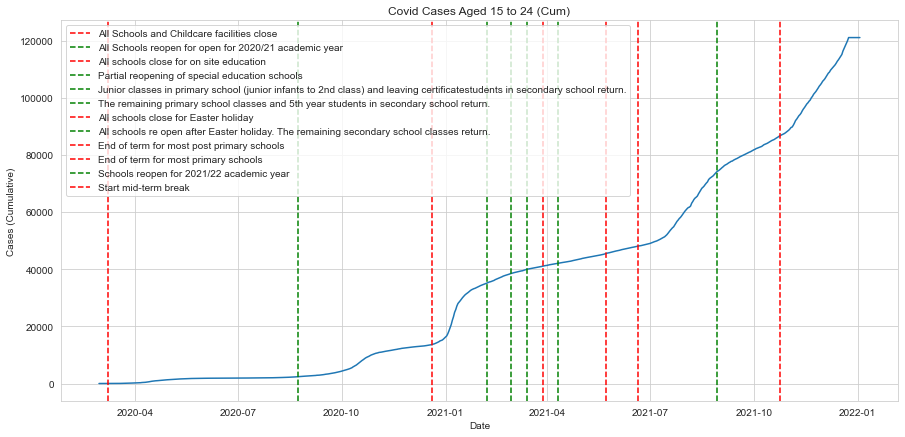

In [55]:
#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged15to24").set_title('Covid Cases Aged 15 to 24 (Cum)')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases (Cumulative)')

#add vertical lines to specify key dates
ax.axvline(pd.to_datetime('2020-03-08'),label='All Schools and Childcare facilities close', linestyle='--', color='r')
#ax.axvline(pd.to_datetime('2020-06-29'),label='Childcare facilities reopen', linestyle='--' )
ax.axvline(pd.to_datetime('2020-08-23'),label='All Schools reopen for open for 2020/21 academic year', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2020-12-20'),label='All schools close for on site education', linestyle='--', color='r')
ax.axvline(pd.to_datetime('2021-02-07'),label='Partial reopening of special education schools', linestyle='--',color='g' )
ax.axvline(pd.to_datetime('2021-02-28'),label='Junior classes in primary school (junior infants to 2nd class) and leaving certificatestudents in secondary school return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-03-14'),label='The remaining primary school classes and 5th year students in secondary school return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-03-28'),label='All schools close for Easter holiday', linestyle='--', color='r')
ax.axvline(pd.to_datetime('2021-04-11'),label='All schools re open after Easter holiday. The remaining secondary school classes return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-05-23'),label='End of term for most post primary schools', linestyle='--',color='r')
ax.axvline(pd.to_datetime('2021-06-20'),label='End of term for most primary schools', linestyle='--',color='r')
ax.axvline(pd.to_datetime('2021-08-29'),label='Schools reopen for 2021/22 academic year', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-10-24'),label='Start mid-term break', linestyle='--',color='r')

#create a legend
plt.legend()

#save figure as png
fig.savefig("Covid_15to24_School_Cum.png", dpi=300)

plt.show()

Diff Data Set

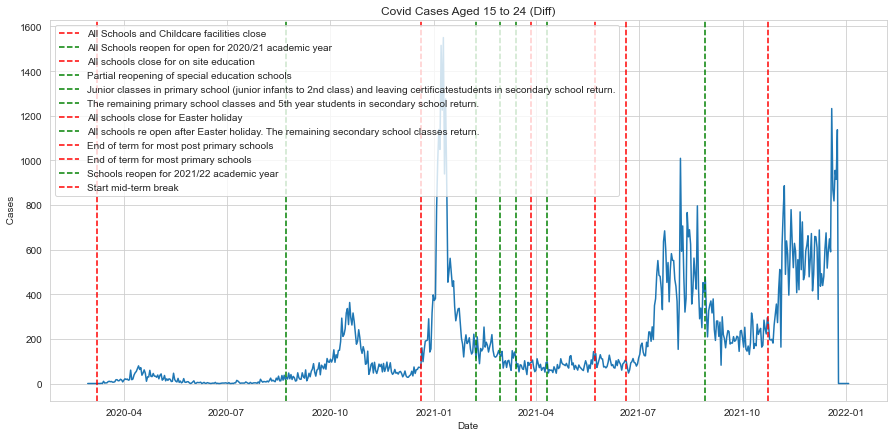

In [56]:
#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged15to24_diff").set_title('Covid Cases Aged 15 to 24 (Diff)')

# set axes labels
plt.xlabel('Date')
plt.ylabel(' Cases')

#add vertical lines to specify key dates
ax.axvline(pd.to_datetime('2020-03-08'),label='All Schools and Childcare facilities close', linestyle='--', color='r')
#ax.axvline(pd.to_datetime('2020-06-29'),label='Childcare facilities reopen', linestyle='--' )
ax.axvline(pd.to_datetime('2020-08-23'),label='All Schools reopen for open for 2020/21 academic year', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2020-12-20'),label='All schools close for on site education', linestyle='--', color='r')
ax.axvline(pd.to_datetime('2021-02-07'),label='Partial reopening of special education schools', linestyle='--',color='g' )
ax.axvline(pd.to_datetime('2021-02-28'),label='Junior classes in primary school (junior infants to 2nd class) and leaving certificatestudents in secondary school return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-03-14'),label='The remaining primary school classes and 5th year students in secondary school return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-03-28'),label='All schools close for Easter holiday', linestyle='--', color='r')
ax.axvline(pd.to_datetime('2021-04-11'),label='All schools re open after Easter holiday. The remaining secondary school classes return.', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-05-23'),label='End of term for most post primary schools', linestyle='--',color='r')
ax.axvline(pd.to_datetime('2021-06-20'),label='End of term for most primary schools', linestyle='--',color='r')
ax.axvline(pd.to_datetime('2021-08-29'),label='Schools reopen for 2021/22 academic year', linestyle='--',color='g')
ax.axvline(pd.to_datetime('2021-10-24'),label='Start mid-term break', linestyle='--',color='r')

#create a legend
plt.legend()

#save fig as png
fig.savefig("Covid_15to24.png", dpi=150)

plt.show()

__Cases aged 5 to 14 contextualised by school opening/closing__

[School opening/closing dates are sourced from here](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/epidemiologyofcovid-19inirelandcasesaged0-18years/COVID-19%20Weekly%20Report_Cases%20aged%200-18yrs_Week%2050_%20Slideset_HPSC_2021220_v1.0.pdf)

Diff Dataset

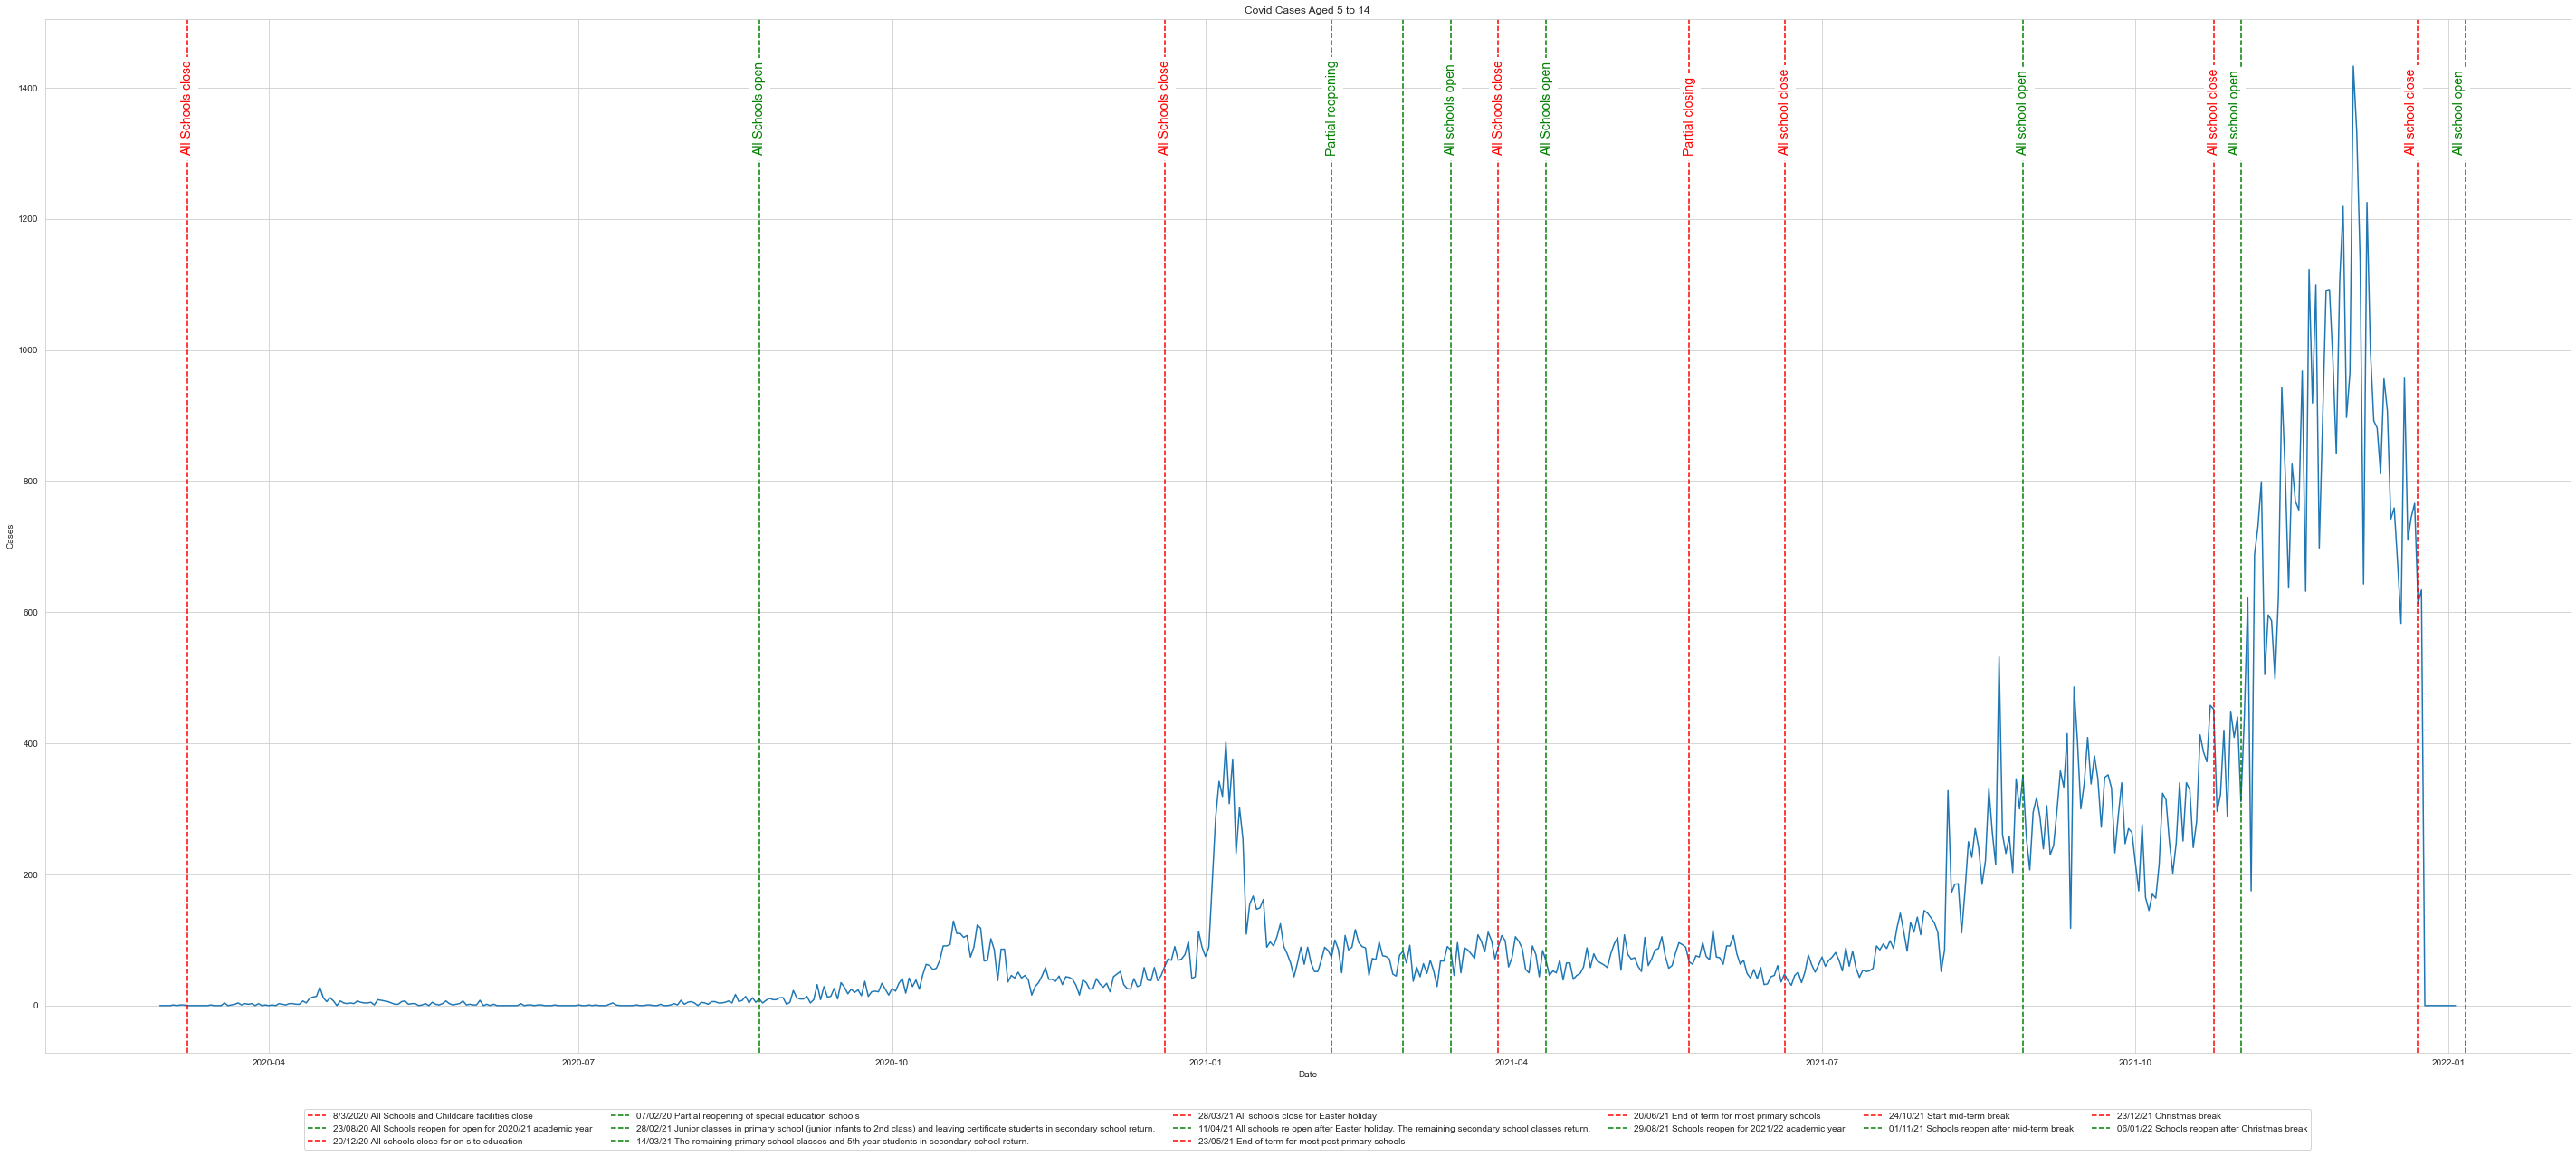

In [57]:
#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (50, 30))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged5to14_diff").set_title('Covid Cases Aged 5 to 14')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases')

"""
I can make a custom funtion for this
by imputting the date, label and line colour to go in the ax.axvline 
and then second date, height and label for plt.text
"""

#add vertical lines to specify key dates

#ax.avline specifies info for line (first location on x axix, then label, then line style and colour)
ax.axvline(pd.to_datetime('2020-03-08'),
           label='8/3/2020 All Schools and Childcare facilities close', 
           linestyle='--', color='r')
#plt.text specifies info for the text (x-coordinate of data label, adjusted to be 2 days after line, y-coordinate of label, label and fontsize)
plt.text(x = pd.to_datetime('2020-03-10'), y = 1300, ha='right',
         s = "All Schools close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

#repeat for all other dates
#ax.axvline(pd.to_datetime('2020-06-29'),label='Childcare facilities reopen', linestyle='--' )

ax.axvline(pd.to_datetime('2020-08-23'),
           label='23/08/20 All Schools reopen for open for 2020/21 academic year', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2020-08-25'), y = 1300, ha="right", 
         s = "All Schools open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-12-20'),
           label='20/12/20 All schools close for on site education', 
           linestyle='--', color='r')
plt.text(x = pd.to_datetime('2020-12-22'), y = 1300, ha="right",
         s = "All Schools close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-02-07'),
           label='07/02/20 Partial reopening of special education schools', 
           linestyle='--',color='g' )
plt.text(x = pd.to_datetime('2021-02-09'), y = 1300, ha="right",
         s = "Partial reopening", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-02-28'),
           label='28/02/21 Junior classes in primary school (junior infants to 2nd class) and leaving certificate students in secondary school return.', 
           linestyle='--',color='g')
#plt.text(x = pd.to_datetime('2021-03-01'), y = 70, s = "Partial reopening", fontsize=14)

ax.axvline(pd.to_datetime('2021-03-14'),
           label='14/03/21 The remaining primary school classes and 5th year students in secondary school return.', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-03-16'), y = 1300, ha="right",
         s = "All schools open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-03-28'),label='28/03/21 All schools close for Easter holiday', 
           linestyle='--', color='r')
plt.text(x = pd.to_datetime('2021-03-30'), y = 1300, ha="right", 
         s = "All Schools close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-04-11'),
           label='11/04/21 All schools re open after Easter holiday. The remaining secondary school classes return.',
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-04-13'),y = 1300, ha="right",
         s = "All Schools open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-05-23'),
           label='23/05/21 End of term for most post primary schools', 
           linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-05-25'), y = 1300, ha="right", 
         s = "Partial closing", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-06-20'),
           label='20/06/21 End of term for most primary schools', 
           linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-06-22'), y = 1300, ha="right", 
         s = "All school close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-08-29'),
           label='29/08/21 Schools reopen for 2021/22 academic year', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-08-31'), y = 1300, ha="right",
         s = "All school open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-10-24'),
           label='24/10/21 Start mid-term break', 
           linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-10-26'), y = 1300, ha="right", 
         s = "All school close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")


ax.axvline(pd.to_datetime('2021-11-01'),
           label='01/11/21 Schools reopen after mid-term break', 
           linestyle='--',color='g')
plt.text(x = pd.to_datetime('2021-11-01'), y = 1300, ha="right", 
         s = "All school open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-12-23'),
           label='23/12/21 Christmas break', 
           linestyle='--', color='r')
plt.text(x = pd.to_datetime('2021-12-23'), y = 1300, ha="right", 
         s = "All school close", fontsize=14, color='r', rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2022-01-06'),
           label='06/01/22 Schools reopen after Christmas break',
           linestyle='--', color='g')
plt.text(x = pd.to_datetime('2022-01-06'), y = 1300, ha="right", 
         s = "All school open", fontsize=14, color='g', rotation=90).set_backgroundcolor("white")

#create a legend below the plot

# Shrink current axis's height by 30% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.3,
                 box.width, box.height * 0.7])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=10)

#save fig as png
fig.savefig("Covid_5to14.png", dpi=150)
plt.show()

Covid Cases of Age 5 to 14 visualising also school opening/closing and Bank Holiday dates 

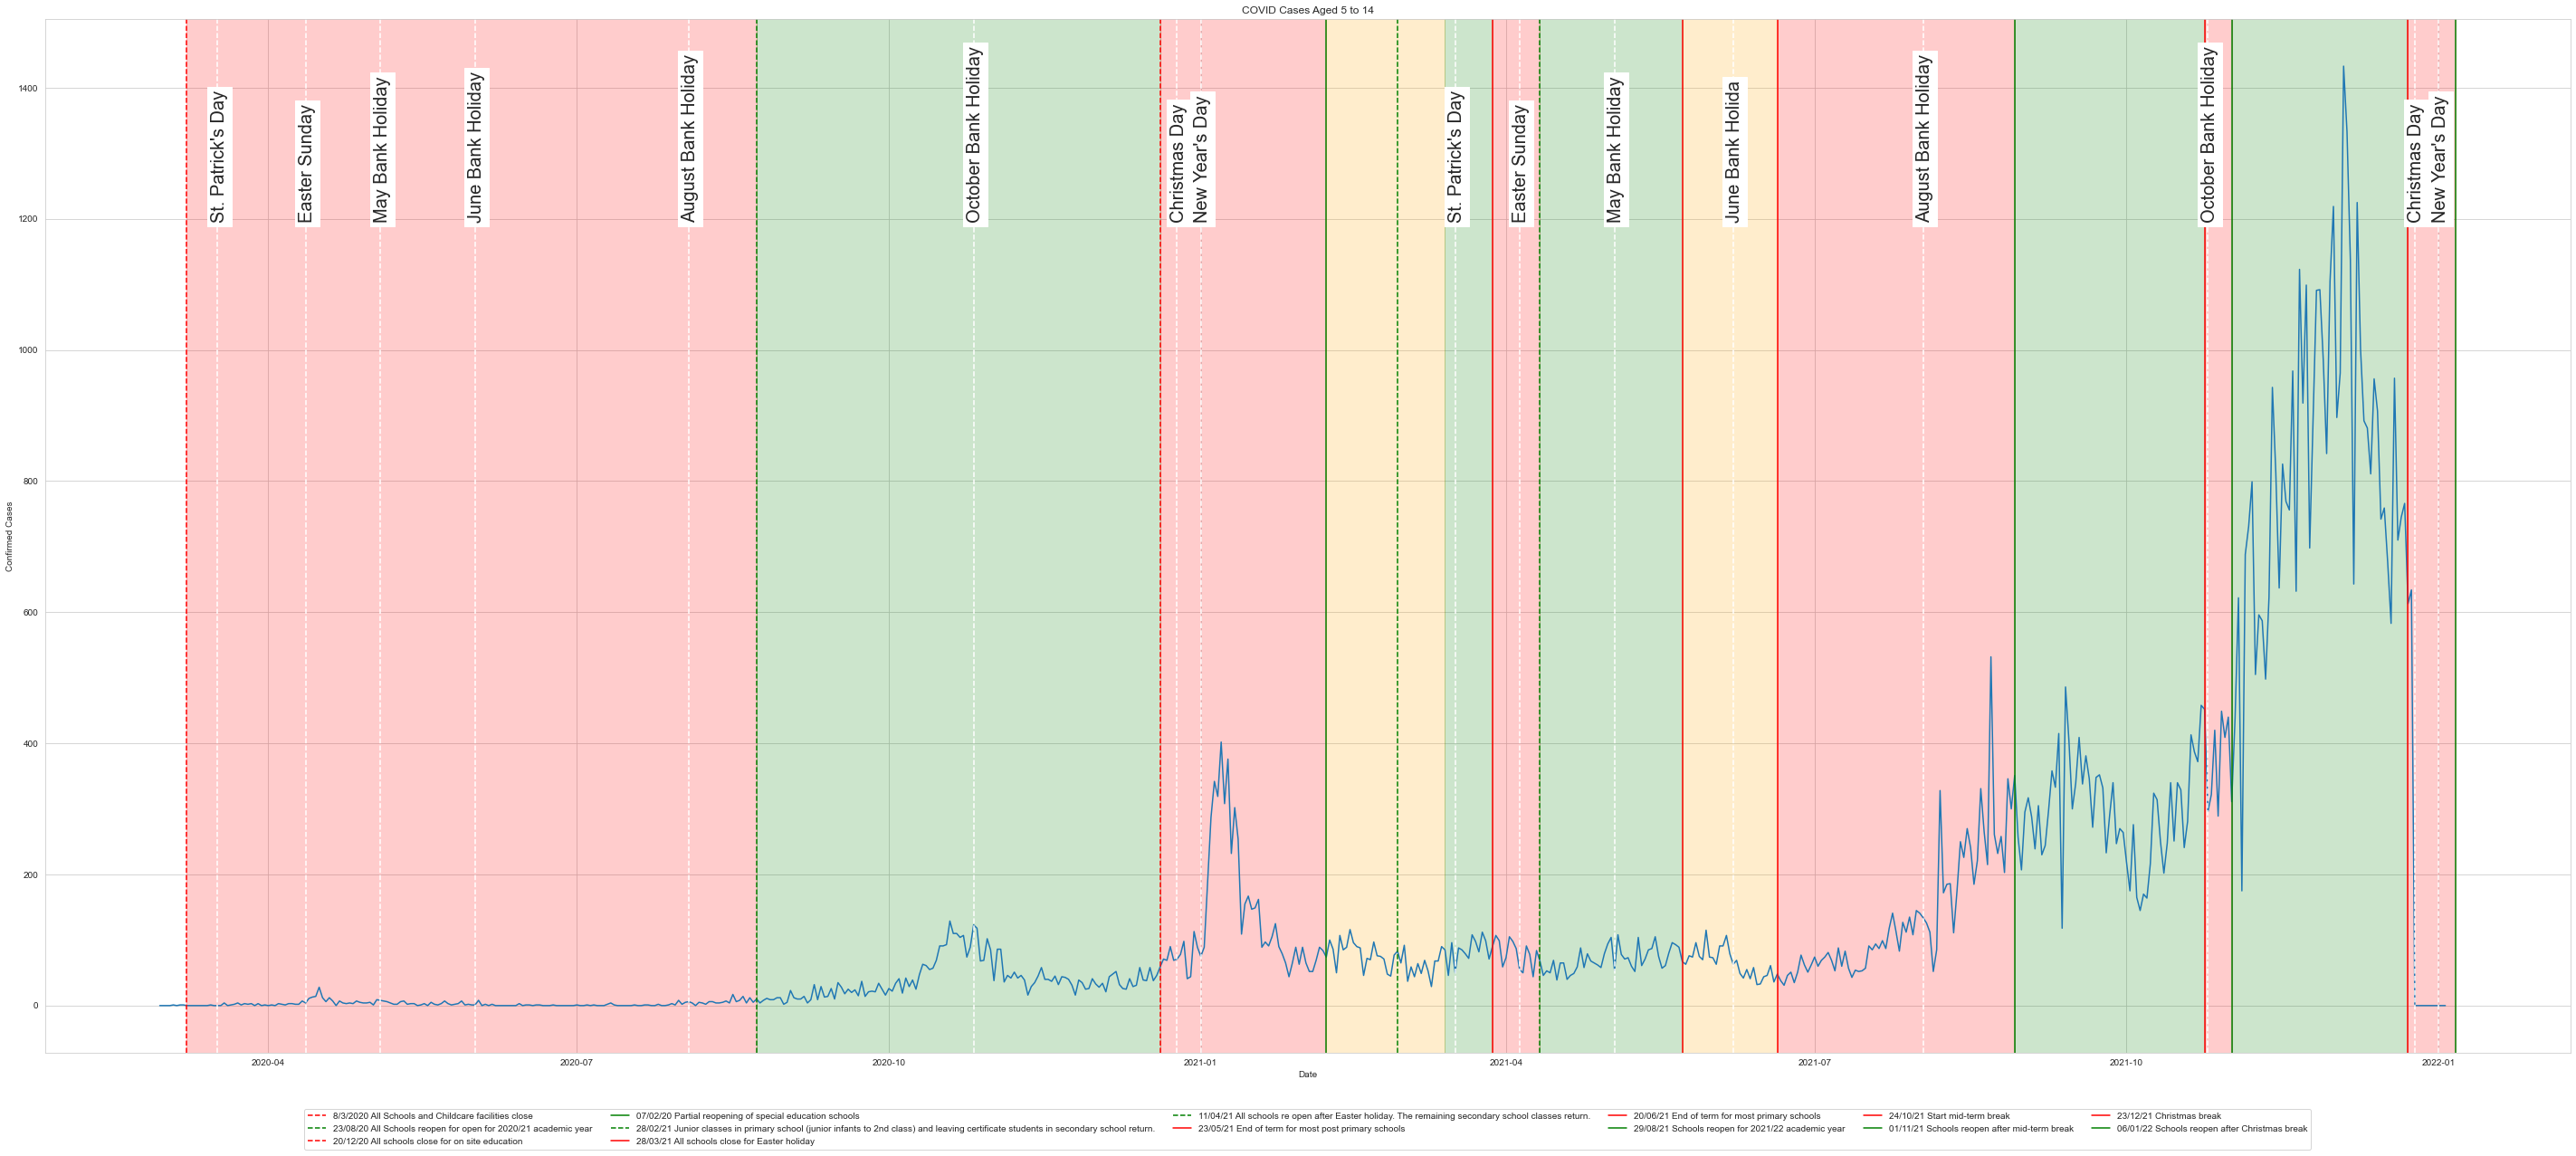

In [59]:
#set plot style
sns.set_style("whitegrid")

# prepare the figure optimising figure size for optimal visualisation of plot
fig, ax = plt.subplots(figsize = (50, 30))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged5to14_diff").set_title('COVID Cases Aged 5 to 14')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')

"""
I can make a custom funtion for this
by imputting the date, label and line colour to go in the ax.axvline 
and then second date, and colour for the ax.axvspan box
"""

#add vertical lines to specify key dates

#ax.avline specifies info for line (first location on x axix, then label, then line style and colour)
ax.axvline(pd.to_datetime('2020-03-08'),
           label='8/3/2020 All Schools and Childcare facilities close', 
           linestyle='--', color='r')
ax.axvline(pd.to_datetime('2020-08-23'),
           label='23/08/20 All Schools reopen for open for 2020/21 academic year', 
           linestyle='--',color='g')
#create a shaded box between two dates, setting transparency and colour
ax.axvspan(pd.to_datetime('2020-03-08'), pd.to_datetime('2020-08-23'), alpha=0.2, color='r')

#repeat for all other dates
ax.axvline(pd.to_datetime('2020-12-20'),
           label='20/12/20 All schools close for on site education', 
           linestyle='--', color='r')
ax.axvspan(pd.to_datetime('2020-08-23'), pd.to_datetime('2020-12-20'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-02-07'),
           label='07/02/20 Partial reopening of special education schools', color='g' )
ax.axvspan(pd.to_datetime('2020-12-20'), pd.to_datetime('2021-02-07'), alpha=0.2, color='r')


ax.axvline(pd.to_datetime('2021-02-28'),
           label='28/02/21 Junior classes in primary school (junior infants to 2nd class) and leaving certificate students in secondary school return.', linestyle='--',color='g')
#ax.axvline(pd.to_datetime('2021-03-14'),label='14/03/21 The remaining primary school classes and 5th year students in secondary school return.', linestyle='--',color='g')
ax.axvspan(pd.to_datetime('2021-02-07'), pd.to_datetime('2021-03-14'), alpha=0.2, color='orange')

ax.axvline(pd.to_datetime('2021-03-28'),
           label='28/03/21 All schools close for Easter holiday', color='r')
ax.axvspan(pd.to_datetime('2021-03-14'), pd.to_datetime('2021-03-28'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-04-11'),
           label='11/04/21 All schools re open after Easter holiday. The remaining secondary school classes return.', linestyle='--',color='g')
ax.axvspan(pd.to_datetime('2021-03-28'), pd.to_datetime('2021-04-11'), alpha=0.2, color='r')

ax.axvline(pd.to_datetime('2021-05-23'),
           label='23/05/21 End of term for most post primary schools', color='r')
ax.axvspan(pd.to_datetime('2021-04-11'), pd.to_datetime('2021-05-23'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-06-20'),
           label='20/06/21 End of term for most primary schools', color='r')
ax.axvspan(pd.to_datetime('2021-05-23'), pd.to_datetime('2021-06-20'), alpha=0.2, color='orange')

ax.axvline(pd.to_datetime('2021-08-29'),
           label='29/08/21 Schools reopen for 2021/22 academic year', color='g')
ax.axvspan(pd.to_datetime('2021-06-20'), pd.to_datetime('2021-08-29'), alpha=0.2, color='r')

ax.axvline(pd.to_datetime('2021-10-24'),
           label='24/10/21 Start mid-term break', color='r')
ax.axvspan(pd.to_datetime('2021-08-29'), pd.to_datetime('2021-10-24'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2021-11-01'),
           label='01/11/21 Schools reopen after mid-term break', color='g')
ax.axvspan(pd.to_datetime('2021-10-24'), pd.to_datetime('2021-11-01'), alpha=0.2, color='r')

ax.axvline(pd.to_datetime('2021-12-23'),
           label='23/12/21 Christmas break', color='r')
ax.axvspan(pd.to_datetime('2021-11-01'), pd.to_datetime('2021-12-23'), alpha=0.2, color='g')

ax.axvline(pd.to_datetime('2022-01-06'),
           label='06/01/22 Schools reopen after Christmas break',color='g')
ax.axvspan(pd.to_datetime('2022-01-06'), pd.to_datetime('2021-12-23'), alpha=0.2, color='r')



#Add white dotted lines with bank holidays
ax.axvline(pd.to_datetime('2020-03-17'), linestyle='--',color='white')

#add vertical text along the lines at a set height on a white bg, adjusted x position for optimal visualisation
plt.text(x = pd.to_datetime('2020-03-15'), y = 1200, 
         s = "St. Patrick's Day", fontsize=20, rotation=90).set_backgroundcolor("white")

#repeat for all other bank holidays

ax.axvline(pd.to_datetime('2020-04-12'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-04-10'), y = 1200, 
         s = "Easter Sunday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-05-04'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-05-02'), y = 1200, 
         s = "May Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-06-01'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-05-30'), y = 1200, 
         s = "June Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-08-03'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-08-01'), y = 1200, 
         s = "August Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-10-26'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-10-24'), y = 1200, 
         s = "October Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2020-12-25'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-12-23'), y = 1200, 
         s = "Christmas Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-01-01'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2020-12-30'), y = 1200, 
         s = "New Year's Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-03-17'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-03-15'), y = 1200, 
         s = "St. Patrick's Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-04-05'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-04-03'), y = 1200, 
         s = "Easter Sunday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-05-03'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-05-01'), y = 1200, 
         s = "May Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-06-07'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-06-05'), y = 1200, 
         s = "June Bank Holida", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-08-02'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-07-31'), y = 1200, 
         s = "August Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-10-25'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-10-23'), y = 1200, 
         s = "October Bank Holiday", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2021-12-25'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-12-23'), y = 1200, 
         s = "Christmas Day", fontsize=20, rotation=90).set_backgroundcolor("white")

ax.axvline(pd.to_datetime('2022-01-01'), linestyle='--',color='white')
plt.text(x = pd.to_datetime('2021-12-30'), y = 1200, 
         s = "New Year's Day", fontsize=20, rotation=90).set_backgroundcolor("white")




#create a legend

# Shrink current axis's height by 30% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.3,
                 box.width, box.height * 0.7])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=6, fontsize=10)

#save fig as png
fig.savefig("Covid_5to14_BH")

plt.show()


In [ ]:
"""

I don't see trends linked to opening/closing of schools.
I can see that schools closed upon upward trends, but not cases 
going up because of school openings.

1) Xmas 2020 seems to be an obvious factor
2) Before the October 2020 bank holiday there is a bump
3) From august bank holiday there is an upwards trend
4) At the beginning of the school year 2021 there is a rise and 
    also after the October 2021 bank holiday but not really obvious
    what is the cause.

"""

__Total Cases vs hospitalised cases - Aged 5 to 14__

Cumulative datasets

In [ ]:
#Two lineplots on the same chart

#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged5to14")
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="HospitalisedAged5to14").set_title('Infections and Hospitalisations - Aged 5 to 14 (Cumulative)')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases (Cumulative)')


plt.show()

In [ ]:
"""
The scales are too different so I need to plot the data in two different plots
"""

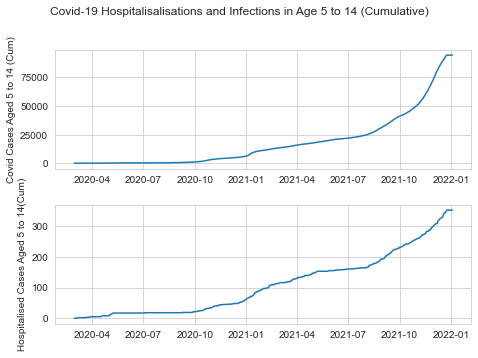

In [78]:
#set up a multiplot area 1 row by 2 columns  
#don't share the ylabel because scales are different but I want to see trend
#Set the size of the plots so that they are optimally visualised
fig, ax = plt.subplots(2,1, figsize = (7, 5))
fig.suptitle("Covid-19 Hospitalisalisations and Infections in Age 5 to 14 (Cumulative)")


#define what's to go into each plot
ax[0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged5to14"])
ax[1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["HospitalisedAged5to14"])

#set labels for x and y axes
ax[0].set_ylabel("Covid Cases Aged 5 to 14 (Cum)")
ax[1].set_ylabel("Hospitalised Cases Aged 5 to 14(Cum)")

#Add padding between plots
fig.tight_layout(pad=2.0)

#save figure
fig.savefig("HvsC_5to14_cum.png", dpi=150)

plt.show()

In [ ]:
"""
It looks the trend is similar but I think that the 
correlation between the two variables has changed in 
the first months of 2021 (delta?)
"""

Diff Datasets

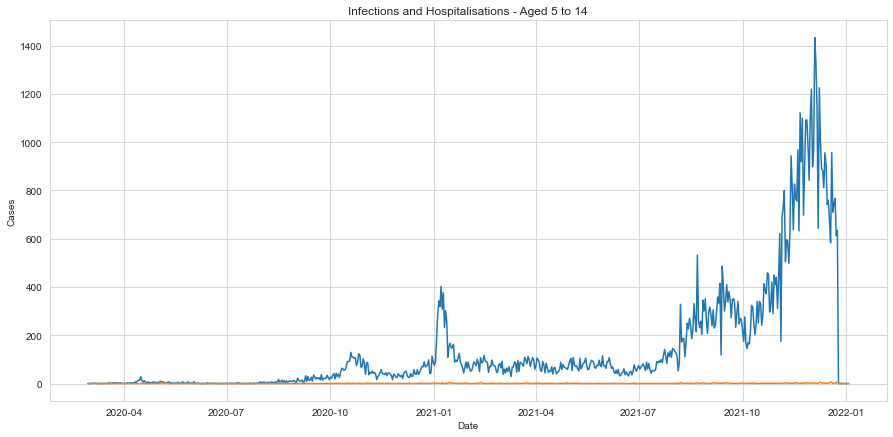

In [63]:
#Two lineplots on the same chart

#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="Aged5to14_diff")
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="HospitalisedAged5to14_diff").set_title('Infections and Hospitalisations - Aged 5 to 14')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases')

#save fig
fig.savefig("HvsC_5to15.png", dpi=150)

plt.show()

In [ ]:
"""
The scales are too different so I need to plot the data in two different plots
"""

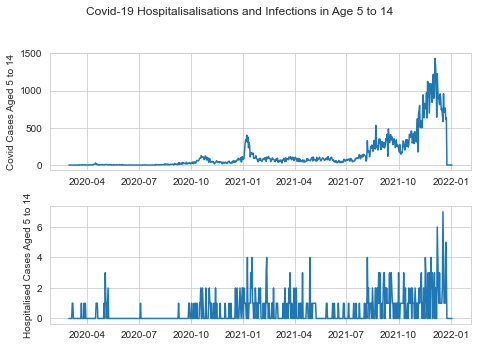

In [76]:
#set up a multiplot area 1 row by 2 columns  
#don't share the ylabel because scales are different but I want to see trend
#Set the size of the plots so that they are optimally visualised
fig, ax = plt.subplots(2,1, figsize = (7, 5))
fig.suptitle("Covid-19 Hospitalisalisations and Infections in Age 5 to 14")

#define what's to go into each plot
ax[0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged5to14_diff"])
ax[1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["HospitalisedAged5to14_diff"])

#set labels for x and y axes
ax[0].set_ylabel("Covid Cases Aged 5 to 14")
ax[1].set_ylabel("Hospitalised Cases Aged 5 to 14")

#Add padding between plots
fig.tight_layout(pad=2.0)

#save fig
fig.savefig("HvsC_5to14.png", dpi=150)

plt.show()

Check regression between cases and hospitalisations (Age 5 to 14)

Cumulative Datasets

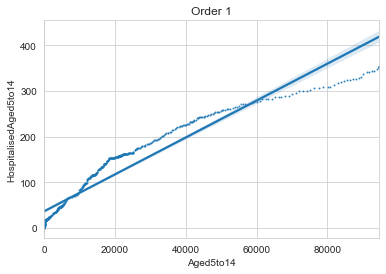

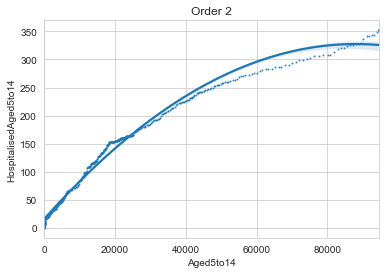

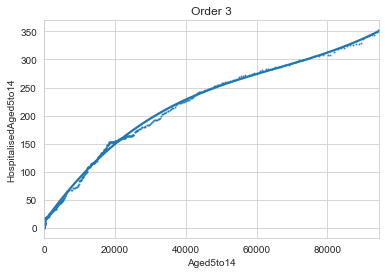

In [89]:
#I make a for loop to check regression order (1, 2, or 3) 

#First I make a list of the order values
order=[1,2,3]

#I create the for loop, where x is used in the order argument of regplot
for x in order:
    g=sns.regplot(data=covid_IRL_ordered, 
                  x="Aged5to14", y="HospitalisedAged5to14", 
                  marker='o', scatter_kws={'s':1},
                  order=x)
    #I also convert xinto string and use in in the plot titles
    g.set_title("Order "+ str(x))
    plt.show()

    


In [ ]:
"""
It looks like at the beginning there is a ploynomial correlation of second
order between infections and hospital cases but from around 40000 
(approx Oct 2021) the model doesn't fit.

A ploynomial correlation of third order seems to fit the curve better.
"""

Check validity of correlation model (order =3)

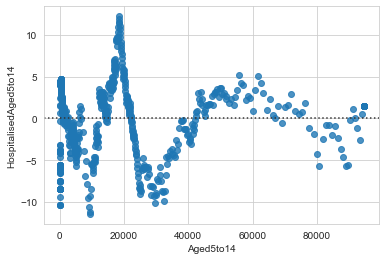

In [68]:
#check correlation with residplot order 3
sns.residplot(data=covid_IRL_ordered, x="Aged5to14", 
              y="HospitalisedAged5to14", order=3)

#save fig
fig.savefig("HvsC_5to14_resid_cum.png", dpi=150)

Diff Datasets

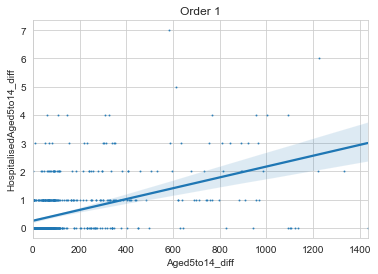

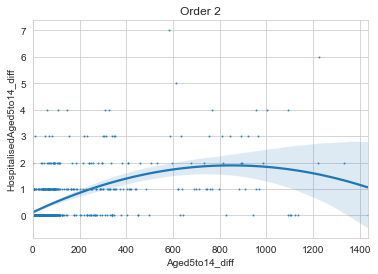

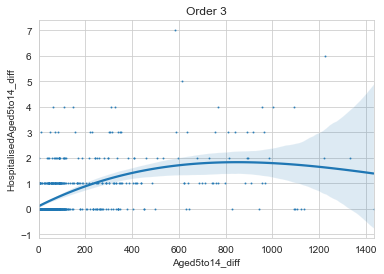

In [69]:
#I make a for loop to check regression order (1, 2, or 3) 

#First I make a list of the order values
order=[1,2,3]

#I create the for loop, where x is used in the order argument of regplot
for x in order:
    g=sns.regplot(data=covid_IRL_ordered, 
                  x="Aged5to14_diff", y="HospitalisedAged5to14_diff", 
                  marker='o', scatter_kws={'s':1},
                  order=x)
    #I also convert xinto string and use in in the plot titles
    g.set_title("Order "+ str(x))
    plt.show()
    
#save fig
fig.savefig("HvsC_5to14_Reg.png", dpi=150)

In [ ]:
"""
I cannot see any correlation with the diff datasets
"""

Regression Between all cases and all hospitalisations

Cumulative Datasets

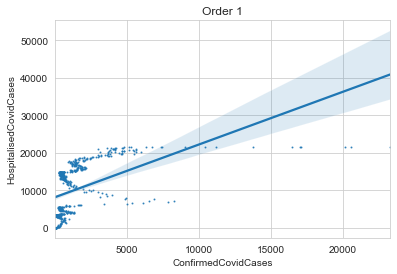

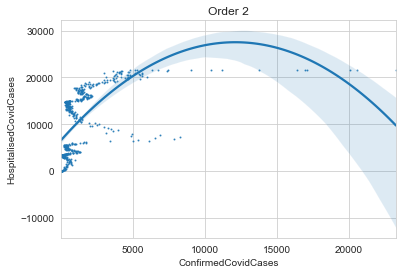

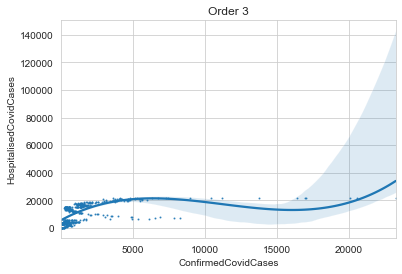

In [70]:
#I make a for loop to check regression order (1, 2, or 3) 

#First I make a list of the order values
order=[1,2,3]

#I create the for loop, where x is used in the order argument of regplot
for x in order:
    g=sns.regplot(data=covid_IRL_ordered, 
                  x="ConfirmedCovidCases", y="HospitalisedCovidCases", 
                  marker='o', scatter_kws={'s':1},
                  order=x)
    #I also convert xinto string and use in in the plot titles
    g.set_title("Order "+ str(x))
    plt.show()
    
#save fig
fig.savefig("HvsC_reg_cum.png", dpi=150)

In [ ]:
"""
Interestingly no correlation can be found in the dataset
with all cohorts.

Possibly vaccinations have skewed some correlations for adults
while younger cohorts which are mostly non vaccinated (like
5 to 14) have a similar trend.

However predominance of different variants may also need to come 
into place
"""

Diff Dataset

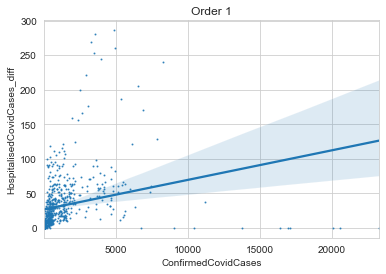

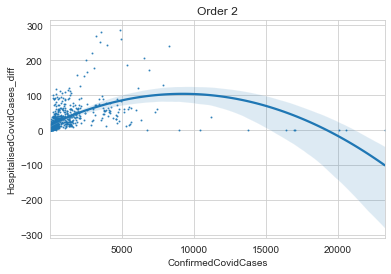

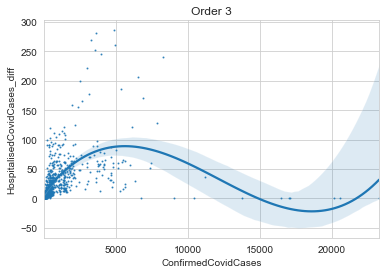

In [71]:
#I make a for loop to check regression order (1, 2, or 3) 

#First I make a list of the order values
order=[1,2,3]

#I create the for loop, where x is used in the order argument of regplot
for x in order:
    g=sns.regplot(data=covid_IRL_ordered, 
                  x="ConfirmedCovidCases", y="HospitalisedCovidCases_diff", 
                  marker='o', scatter_kws={'s':1},
                  order=x)
    #I also convert xinto string and use in in the plot titles
    g.set_title("Order "+ str(x))
    plt.show()
    
#save fig
fig.savefig("HvsC_reg.png", dpi=150)

In [ ]:
"""
No correlation here either
"""

Check correlation between cases and hospitalisations in various cohorts

Cumulative Datasets

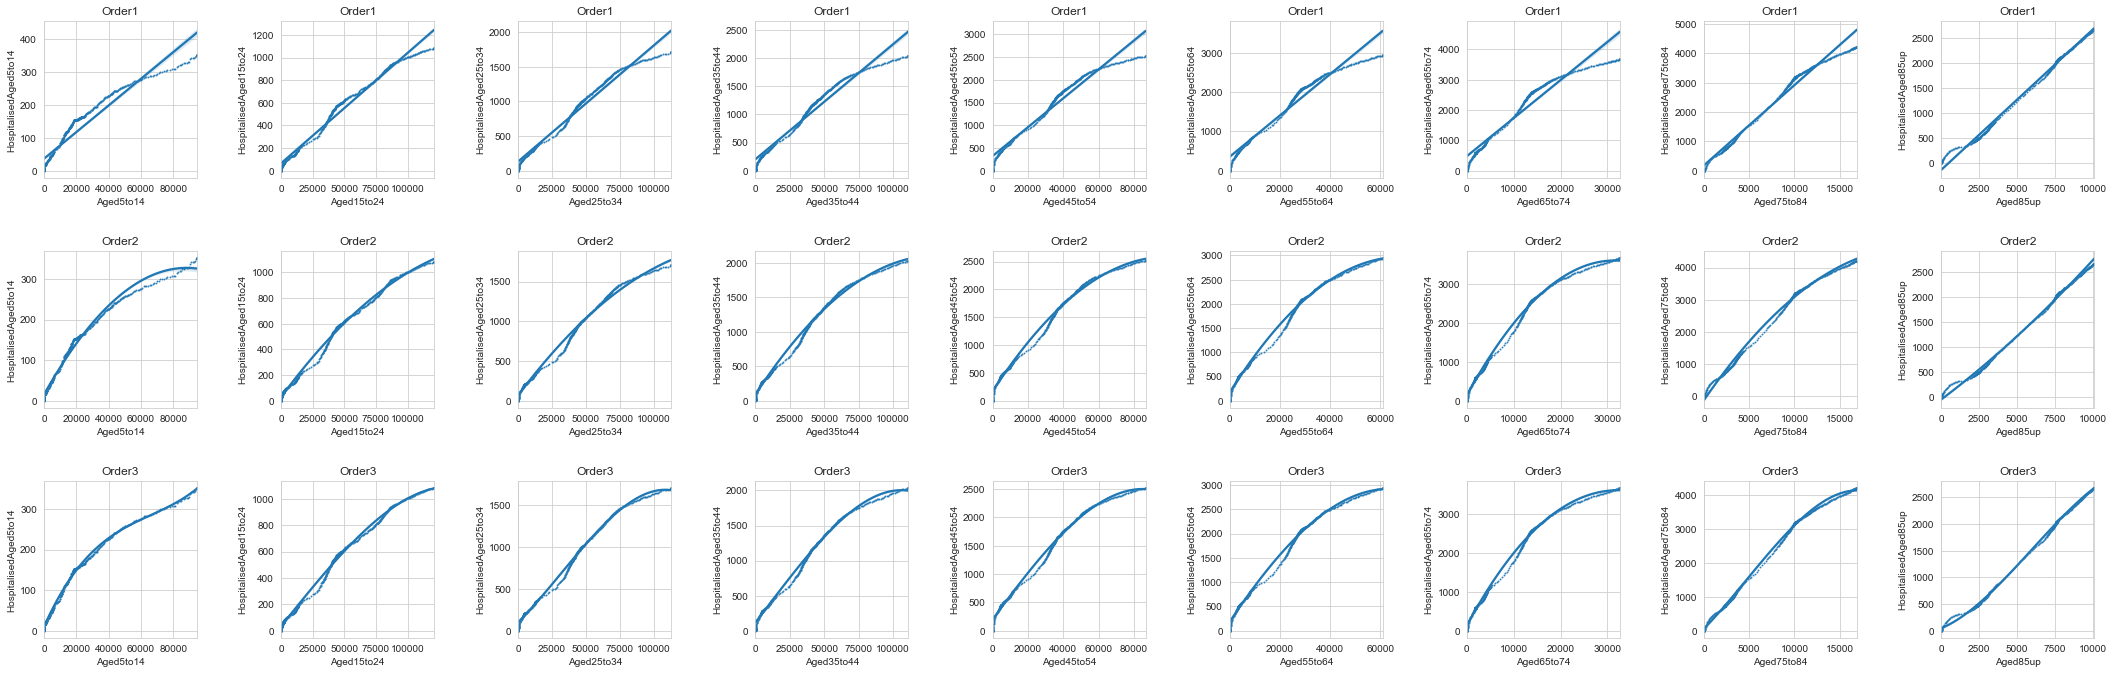

In [72]:
#I make a loop to create a 9x3 matrix, with order numbers 1-3 in each row
#In each column I'll plot a different age cohort

#  List of polynomial order
order = [1,2,3]

#  plot Numerical Data
a = 3  # number of rows
b = 9  # number of columns
c = 1  # initialize plot counter

#set figure size
fig = plt.figure(figsize=(30,10))

#set the loop, so that the regression order and title change automatically
for d in order :
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged5to14", y="HospitalisedAged5to14", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged15to24", y="HospitalisedAged15to24", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged25to34", y="HospitalisedAged25to34", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged35to44", y="HospitalisedAged35to44", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged45to54", y="HospitalisedAged45to54", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged55to64", y="HospitalisedAged55to64", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged65to74", y="HospitalisedAged65to74", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged75to84", y="HospitalisedAged75to84", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged85up", y="HospitalisedAged85up", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

#Add padding between plots
fig.tight_layout(pad=3.0)

#save fig
fig.savefig("HvsC_byAge_Reg_Cum.png", dpi=300)

plt.show()


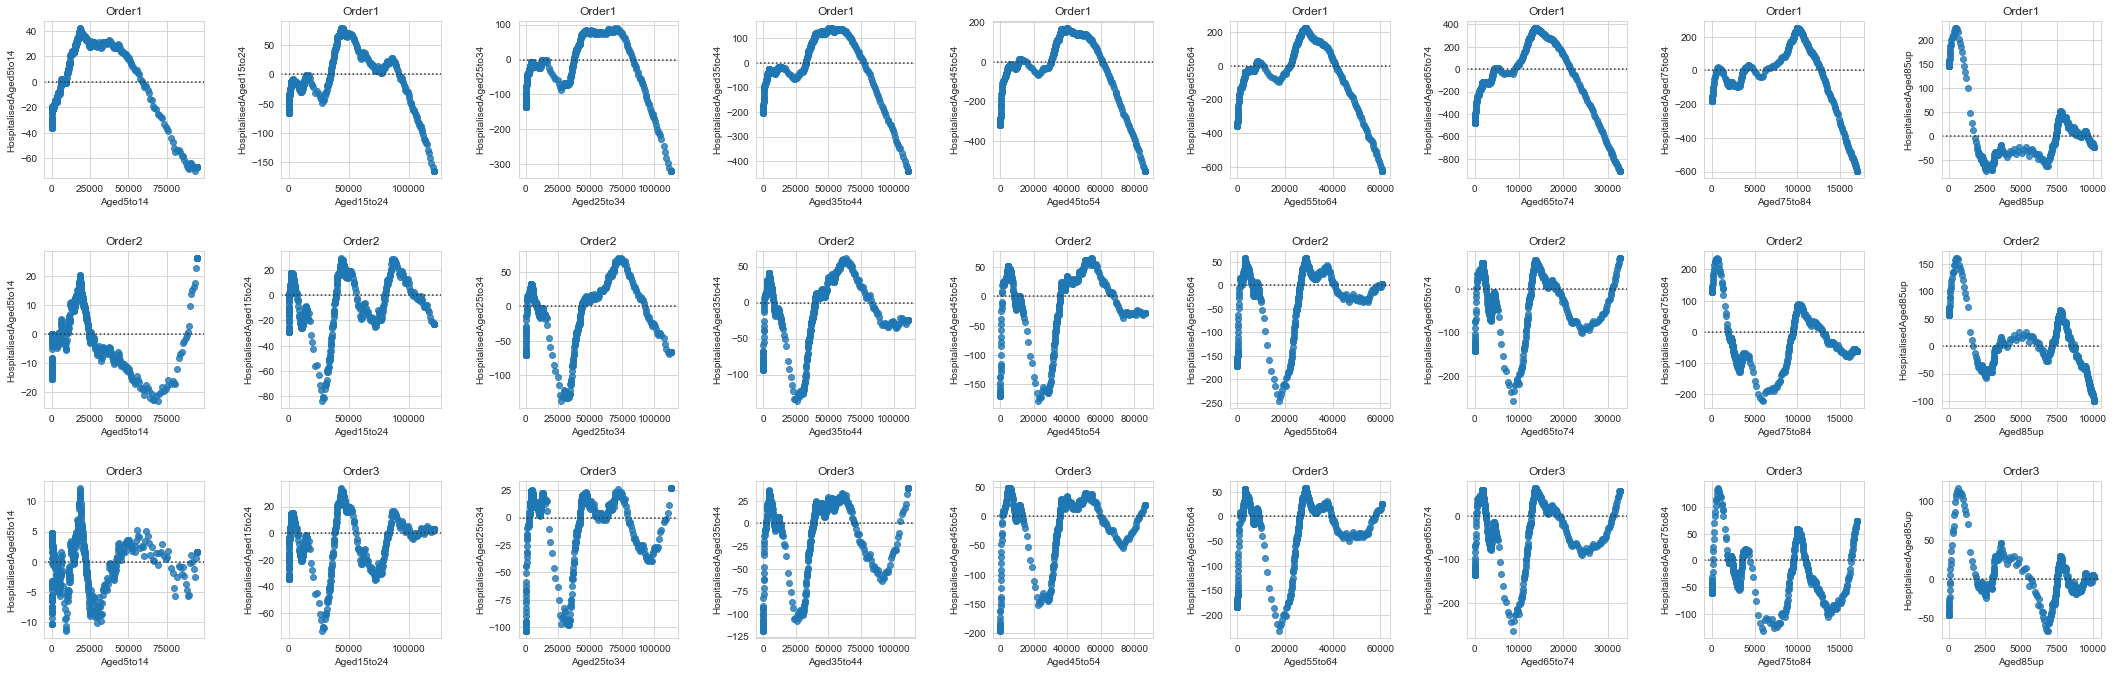

In [73]:
#I'll use the same type of loop to check if the regression models are good

#  Regression order list
order = [1,2,3]

#  plot Numerical Data
a = 3  # number of rows
b = 9  # number of columns
c = 1  # initialize plot counter

#set up figure size
fig = plt.figure(figsize=(30,10))

#create loop
for d in order :
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged5to14", y="HospitalisedAged5to14", 
                      order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged15to24", y="HospitalisedAged15to24", 
                      order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged25to34", y="HospitalisedAged25to34", 
                      order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged35to44", y="HospitalisedAged35to44", 
                      order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged45to54", y="HospitalisedAged45to54", 
                      order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged55to64", y="HospitalisedAged55to64", 
                      order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged65to74", y="HospitalisedAged65to74", 
                      order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged75to84", y="HospitalisedAged75to84", 
                      order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged85up", y="HospitalisedAged85up", 
                      order=d)
    c = c + 1

#Add padding between plots
fig.tight_layout(pad=3.0)

#save fig
fig.savefig("HvsC_byAge_Resid_Cum.png", dpi=150)

plt.show()

Diff Datasets

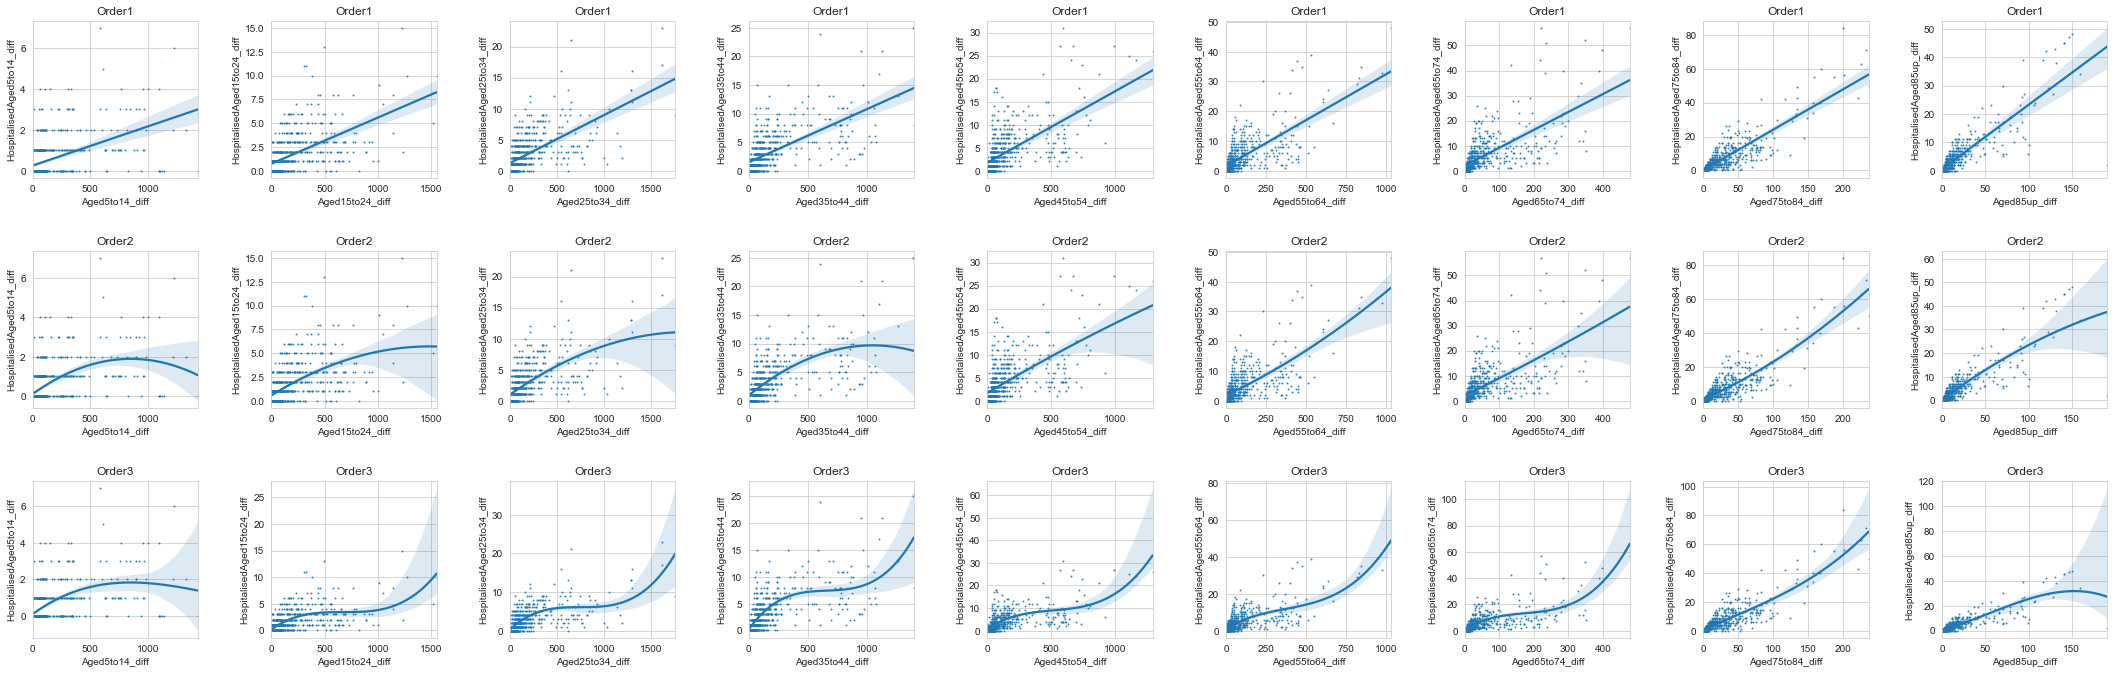

In [74]:
#I make a loop to create a 9x3 matrix, with order numbers 1-3 in each row
#In each column I'll plot a different age cohort

#  List of polynomial order
order = [1,2,3]

#  plot Numerical Data
a = 3  # number of rows
b = 9  # number of columns
c = 1  # initialize plot counter

#set figure size
fig = plt.figure(figsize=(30,10))

#set the loop, so that the regression order and title change automatically
for d in order :
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged5to14_diff", y="HospitalisedAged5to14_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged15to24_diff", y="HospitalisedAged15to24_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged25to34_diff", y="HospitalisedAged25to34_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged35to44_diff", y="HospitalisedAged35to44_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged45to54_diff", y="HospitalisedAged45to54_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged55to64_diff", y="HospitalisedAged55to64_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged65to74_diff", y="HospitalisedAged65to74_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged75to84_diff", y="HospitalisedAged75to84_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.regplot(data=covid_IRL_ordered, 
                      x="Aged85up_diff", y="HospitalisedAged85up_diff", 
                      marker='o', scatter_kws={'s':1},order=d)
    c = c + 1

#Add padding between plots
fig.tight_layout(pad=3.0)


#save fig
fig.savefig("HvsC_byAge_Reg.png", dpi=150)

plt.show()



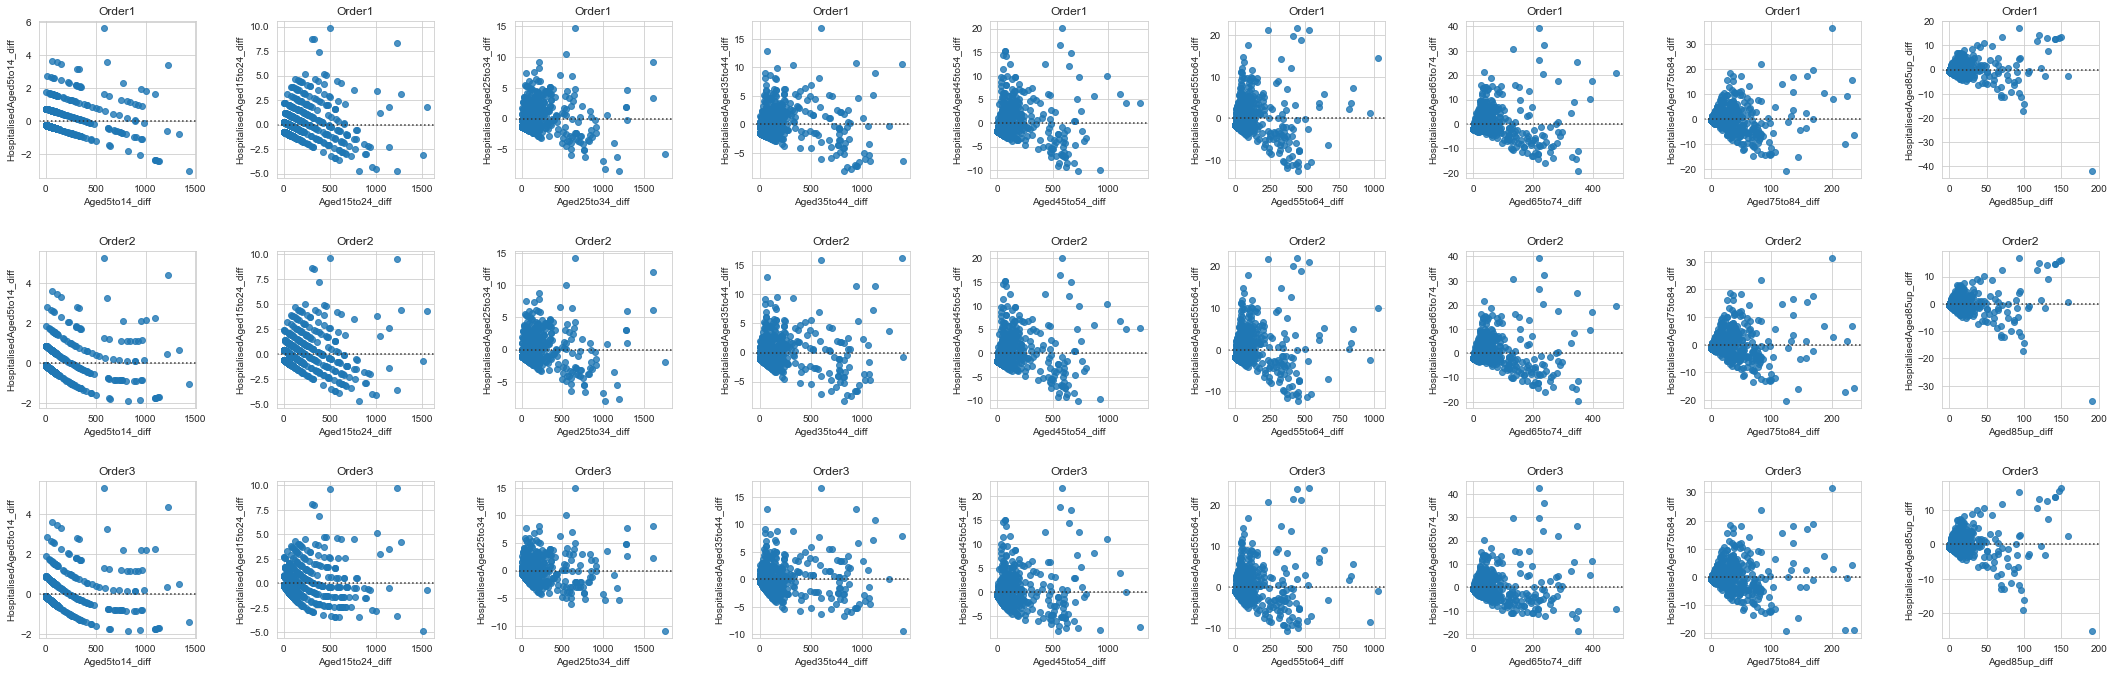

In [75]:
#I'll use the same type of loop to check if the regression models are good

#  Regression order list
order = [1,2,3]

#  plot Numerical Data
a = 3  # number of rows
b = 9  # number of columns
c = 1  # initialize plot counter

#set up figure size
fig = plt.figure(figsize=(30,10))

#create loop
for d in order :
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged5to14_diff", y="HospitalisedAged5to14_diff", 
                      order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged15to24_diff", y="HospitalisedAged15to24_diff", 
                      order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged25to34_diff", y="HospitalisedAged25to34_diff", 
                      order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged35to44_diff", y="HospitalisedAged35to44_diff", 
                      order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged45to54_diff", y="HospitalisedAged45to54_diff", 
                      order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged55to64_diff", y="HospitalisedAged55to64_diff", 
                      order=d)
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged65to74_diff", y="HospitalisedAged65to74_diff", 
                      order=d)
    c = c + 1
    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged75to84_diff", y="HospitalisedAged75to84_diff", 
                      order=d)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('Order' + str(d))
    plt.xlabel(d)
    sns.residplot(data=covid_IRL_ordered, 
                      x="Aged85up_diff", y="HospitalisedAged85up_diff", 
                      order=d)
    c = c + 1

#Add padding between plots
fig.tight_layout(pad=3.0)

#save fig
fig.savefig("HvsC_byAge_Resid.png", dpi=150)

plt.show()

__Hospitalisation vs Cases Numbers by Age group (where possible)__

I check % of hospitalization vs cases number to verify that over time hospitalisation  numbers went down (due to vaccination?)

<AxesSubplot:xlabel='Date', ylabel='HvsC_Total'>

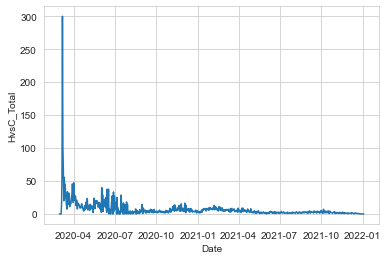

In [43]:
#I make a custom function to calculate %

#a=Hospitalization column
#b=Total cases column

#create an empty list
new_list=[]
def percentage(a, b):
    d=a/b*100
    return d


"""
Hospitalised cases is a cumulative value so I use the total covid cases 
column which is also a cumulative value
"""
#I use the % funtion to create a column with % Hospitalised vs Total cases
covid_IRL_ordered["HvsC_Total"]=percentage(covid_IRL_ordered["HospitalisedCovidCases_diff"],
                      covid_IRL_ordered["ConfirmedCovidCases"])   


sns.lineplot(data=covid_IRL_ordered, x="Date", y="HvsC_Total")


In [ ]:
"""
DAILY DATA MIGHT BE TOO GRANULAR.
I"LL GROUP BY MONTH AND CHECK % THAT WAY
"""

Get monthly data

In [90]:
#I make a list of column names that have only daily values and not cumulative
columns_forMonth=['ConfirmedCovidCases','ConfirmedCovidDeaths','HospitalisedCovidCases_diff', 'RequiringICUCovidCases_diff',
       'Aged1to4_diff', 'Aged5to14_diff', 'Aged15to24_diff', 'Aged25to34_diff',
       'Aged35to44_diff', 'Aged45to54_diff', 'Aged55to64_diff',
       'Aged65to74_diff', 'Aged75to84_diff', 'Aged85up_diff',
       'HospitalisedAged5_diff', 'HospitalisedAged5to14_diff',
       'HospitalisedAged15to24_diff', 'HospitalisedAged25to34_diff',
       'HospitalisedAged35to44_diff', 'HospitalisedAged45to54_diff',
       'HospitalisedAged55to64_diff', 'HospitalisedAged65to74_diff',
       'HospitalisedAged75to84_diff', 'HospitalisedAged85up_diff', 'Male_diff',
       'Female_diff', 'Unknown_diff']

In [91]:
#I create a new df where the date column is only showing the months
#and the other columns have aggregated monthly values
#I do this by grouping by the date column but using the .dt attribute strftime
#to group by year and month all the columns of the list and returning a sum
covid_IRL_M=covid_IRL_ordered.groupby(covid_IRL_ordered['Date'].
                                      dt.strftime('%Y-%m'))[columns_forMonth].sum()
#Check the df
covid_IRL_M.head()

ConfirmedCovidCases  ConfirmedCovidDeaths  \
Date                                                 
2020-02                    1                   0.0   
2020-03                 3234                  71.0   
2020-04                15112                 981.0   
2020-05                 4406                 463.0   
2020-06                  560                 106.0   

         HospitalisedCovidCases_diff  RequiringICUCovidCases_diff  \
Date                                                                
2020-02                          0.0                          0.0   
2020-03                        759.0                        136.0   
2020-04                       1995.0                        250.0   
2020-05                        483.0                         47.0   
2020-06                         58.0                          1.0   

         Aged1to4_diff  Aged5to14_diff  Aged15to24_diff  Aged25to34_diff  \
Date                                                                       
2020-02            0.0             0.0              0.0              0.0   
2020-03           17.0            28.0            175.0            474.0   
2020-04           81.0           172.0           1144.0           2700.0   
2020-05           54.0           107.0            499.0            996.0   
2020-06           19.0            21.0             76.0             97.0   

         Aged35to44_diff  Aged45to54_diff  ...  HospitalisedAged25to34_diff  \
Date                                       ...                                
2020-02              0.0              0.0  ...                          0.0   
2020-03            495.0            499.0  ...                         67.0   
2020-04           2914.0           3153.0  ...                         99.0   
2020-05            967.0            807.0  ...                         29.0   
2020-06             99.0            104.0  ...                          3.0   

         HospitalisedAged35to44_diff  HospitalisedAged45to54_diff  \
Date                                                                
2020-02                          0.0                          0.0   
2020-03                         70.0                        126.0   
2020-04                        157.0                        250.0   
2020-05                         33.0                         56.0   
2020-06                          8.0                          7.0   

         HospitalisedAged55to64_diff  HospitalisedAged65to74_diff  \
Date                                                                
2020-02                          0.0                          0.0   
2020-03                        122.0                        124.0   
2020-04                        289.0                        373.0   
2020-05                         67.0                         79.0   
2020-06                          8.0                         12.0   

         HospitalisedAged75to84_diff  HospitalisedAged85up_diff  Male_diff  \
Date                                                                         
2020-02                          0.0                        0.0        0.0   
2020-03                        144.0                       73.0     1318.0   
2020-04                        472.0                      311.0     7017.0   
2020-05                        111.0                       81.0     2264.0   
2020-06                         10.0                        7.0      271.0   

         Female_diff  Unknown_diff  
Date                                
2020-02          0.0           0.0  
2020-03       1322.0           0.0  
2020-04      10199.0           0.0  
2020-05       2702.0           3.0  
2020-06        317.0           0.0  

[5 rows x 27 columns]

In [92]:
#I need to bring the date column outside the index in order to plot it the way I want
covid_IRL_M=covid_IRL_M.reset_index()

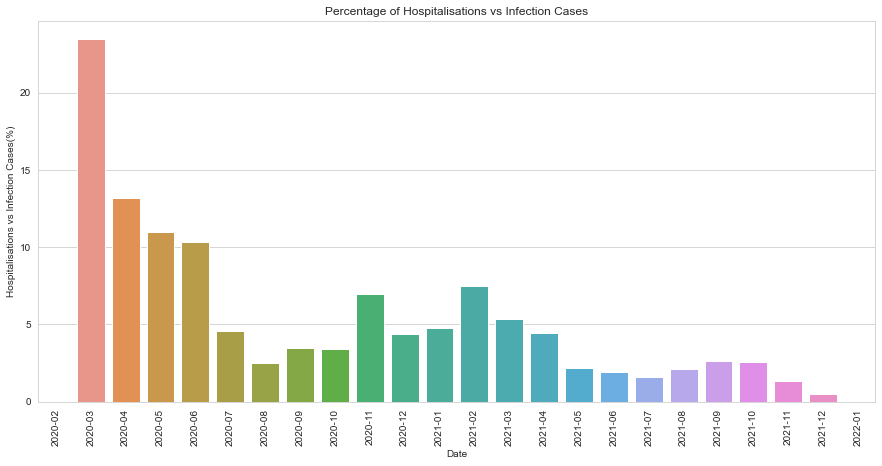

In [94]:
#I use the % funtion to create a column with % Hospitalised vs Total cases
covid_IRL_M["HvsC_Total"]=percentage(covid_IRL_M["HospitalisedCovidCases_diff"],
                      covid_IRL_M["ConfirmedCovidCases"])   

#covid_IRL_M["HvsC_Total"].max()

fig, ax=plt.subplots(figsize=(15,7))
ax=sns.barplot(data=covid_IRL_M, x="Date", y="HvsC_Total")
ax.set_ylabel("Hospitalisations vs Infection Cases(%)")
ax.set_title("Percentage of Hospitalisations vs Infection Cases")
plt.xticks(rotation=90)

#save figure
fig.savefig("HvsC_Per.png", dpi=150)
plt.show()

In [95]:
#I use the % funtion to create new columns with % Hospitalised vs Total cases
#I know I could do some sort of loop but I am running out of time
#I want to see the visualisations
covid_IRL_M["HvsC_5to14"]=percentage(covid_IRL_M["HospitalisedAged5to14_diff"],
                      covid_IRL_M["Aged5to14_diff"])  
covid_IRL_M["HvsC_15to24"]=percentage(covid_IRL_M["HospitalisedAged15to24_diff"],
                      covid_IRL_M["Aged15to24_diff"])
covid_IRL_M["HvsC_25to34"]=percentage(covid_IRL_M["HospitalisedAged25to34_diff"],
                      covid_IRL_M["Aged25to34_diff"])
covid_IRL_M["HvsC_35to44"]=percentage(covid_IRL_M["HospitalisedAged35to44_diff"],
                      covid_IRL_M["Aged35to44_diff"])
covid_IRL_M["HvsC_45to54"]=percentage(covid_IRL_M["HospitalisedAged45to54_diff"],
                      covid_IRL_M["Aged45to54_diff"])
covid_IRL_M["HvsC_55to64"]=percentage(covid_IRL_M["HospitalisedAged55to64_diff"],
                      covid_IRL_M["Aged55to64_diff"])
covid_IRL_M["HvsC_65to74"]=percentage(covid_IRL_M["HospitalisedAged65to74_diff"],
                      covid_IRL_M["Aged65to74_diff"])
covid_IRL_M["HvsC_75to84"]=percentage(covid_IRL_M["HospitalisedAged75to84_diff"],
                      covid_IRL_M["Aged75to84_diff"])
covid_IRL_M["HvsC_85up"]=percentage(covid_IRL_M["HospitalisedAged85up_diff"],
                      covid_IRL_M["Aged85up_diff"])

covid_IRL_M.columns

Index(['Date', 'ConfirmedCovidCases', 'ConfirmedCovidDeaths',
       'HospitalisedCovidCases_diff', 'RequiringICUCovidCases_diff',
       'Aged1to4_diff', 'Aged5to14_diff', 'Aged15to24_diff', 'Aged25to34_diff',
       'Aged35to44_diff', 'Aged45to54_diff', 'Aged55to64_diff',
       'Aged65to74_diff', 'Aged75to84_diff', 'Aged85up_diff',
       'HospitalisedAged5_diff', 'HospitalisedAged5to14_diff',
       'HospitalisedAged15to24_diff', 'HospitalisedAged25to34_diff',
       'HospitalisedAged35to44_diff', 'HospitalisedAged45to54_diff',
       'HospitalisedAged55to64_diff', 'HospitalisedAged65to74_diff',
       'HospitalisedAged75to84_diff', 'HospitalisedAged85up_diff', 'Male_diff',
       'Female_diff', 'Unknown_diff', 'HvsC_Total', 'HvsC_5to14',
       'HvsC_15to24', 'HvsC_25to34', 'HvsC_35to44', 'HvsC_45to54',
       'HvsC_55to64', 'HvsC_65to74', 'HvsC_75to84', 'HvsC_85up'],
      dtype='object')

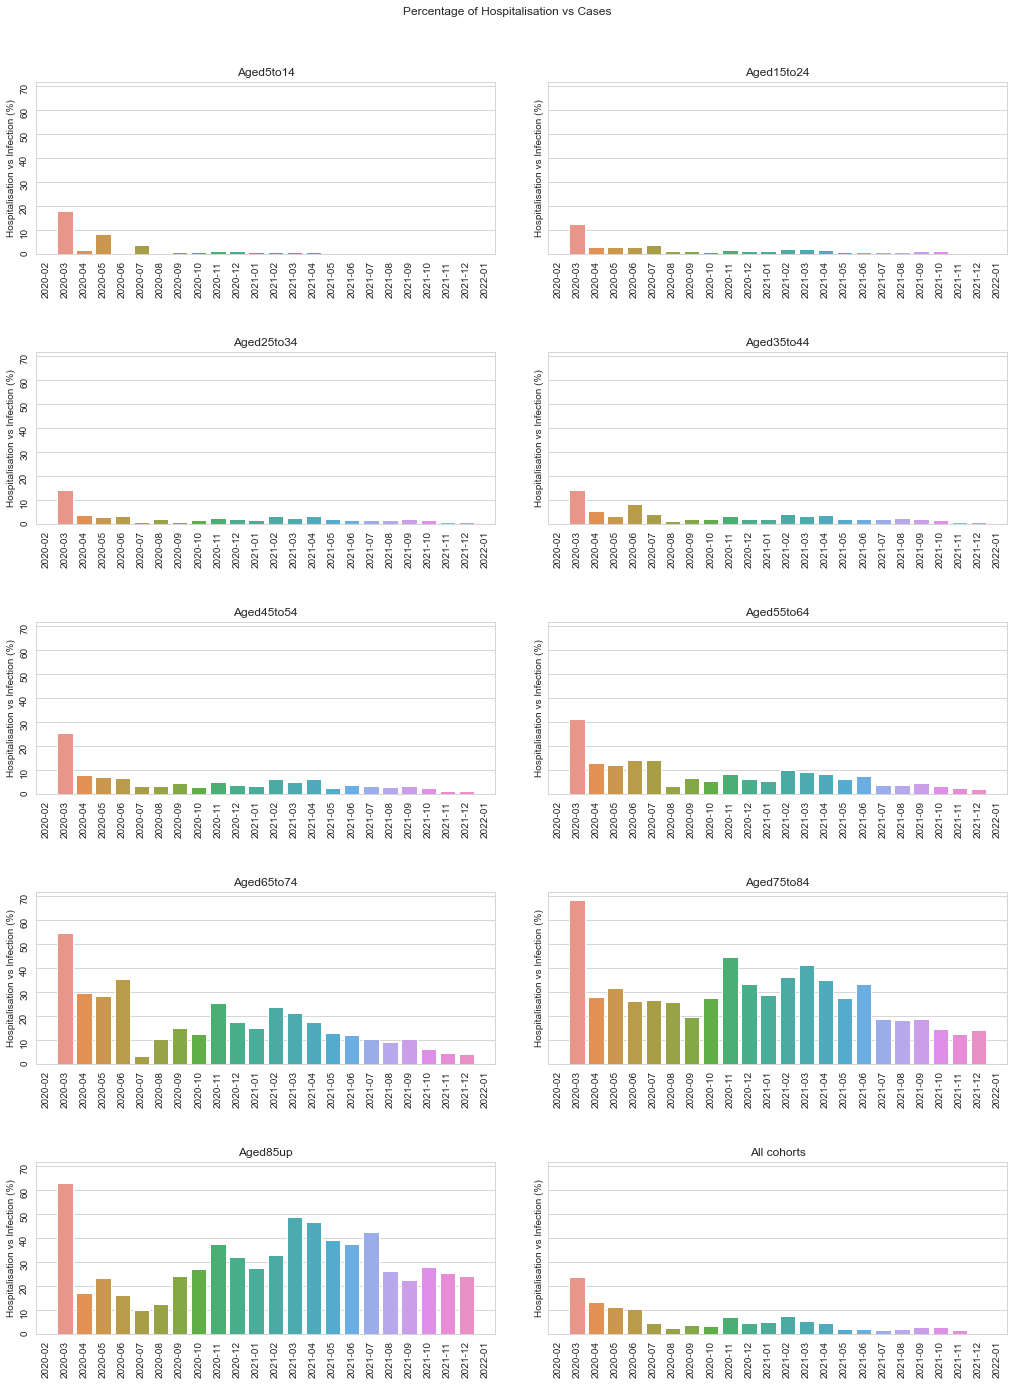

In [96]:
#set up a multiplot area 5 rows by 2 columns  
#share the ylabel so data can be compared more easily
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(5,2, sharey=True, figsize = (15, 20))
fig.suptitle('Percentage of Hospitalisation vs Cases')

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=covid_IRL_M, x="Date", y="HvsC_5to14")
sns.barplot(ax=axes[0,1],data=covid_IRL_M, x="Date", y="HvsC_15to24")
sns.barplot(ax=axes[1,0], data=covid_IRL_M, x="Date", y="HvsC_25to34")
sns.barplot(ax=axes[1,1],data=covid_IRL_M, x="Date", y="HvsC_35to44")
sns.barplot(ax=axes[2,0],data=covid_IRL_M, x="Date", y="HvsC_45to54")
sns.barplot(ax=axes[2,1],data=covid_IRL_M, x="Date", y="HvsC_55to64")
sns.barplot(ax=axes[3,0],data=covid_IRL_M, x="Date", y="HvsC_65to74")
sns.barplot(ax=axes[3,1],data=covid_IRL_M, x="Date", y="HvsC_75to84")
sns.barplot(ax=axes[4,0],data=covid_IRL_M, x="Date", y="HvsC_85up")
sns.barplot(ax=axes[4,1],data=covid_IRL_M, x="Date", y="HvsC_Total")

#set labels for x and y axes
axes[0,0].set_title("Aged5to14")
axes[0,1].set_title("Aged15to24")
axes[1,0].set_title("Aged25to34")
axes[1,1].set_title("Aged35to44")
axes[2,0].set_title("Aged45to54")
axes[2,1].set_title("Aged55to64")
axes[3,0].set_title("Aged65to74")
axes[3,1].set_title("Aged75to84")
axes[4,0].set_title("Aged85up")
axes[4,1].set_title("All cohorts")

# create a for loop to set up axes labels and ticks rotations
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set_ylabel("Hospitalisation vs Infection (%)")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=4.0)

#save fig
fig.savefig("HvsC_per_byAge.png", dpi=150)

plt.show()

In [97]:
#I make a df where I exclude the first two and the last month
#The Feb 2020 records started at the end of the month so I remove this
#Similarely I only have 3 days for Jan 2022
#I remove MArch 2020 as maybe they hospitalised most patients woth covid as isolation measure
covid_IRL_M_short=covid_IRL_M[(covid_IRL_M["Date"]> "2020-03") & (covid_IRL_M["Date"]<"2022-01")]
covid_IRL_M_short
                                    

Date  ConfirmedCovidCases  ConfirmedCovidDeaths  \
2   2020-04                15112                 981.0   
3   2020-05                 4406                 463.0   
4   2020-06                  560                 106.0   
5   2020-07                  637                  41.0   
6   2020-08                 2794                  18.0   
7   2020-09                 7430                  31.0   
8   2020-10                25479                 119.0   
9   2020-11                11373                 146.0   
10  2020-12                19381                 191.0   
11  2021-01               104985                1082.0   
12  2021-02                23335                1045.0   
13  2021-03                16388                 376.0   
14  2021-04                13126                 230.0   
15  2021-05                13236                  49.0   
16  2021-06                10559                  57.0   
17  2021-07                29097                  37.0   
18  2021-08                52256                  57.0   
19  2021-09                41558                 157.0   
20  2021-10                55744                 187.0   
21  2021-11               122836                 216.0   
22  2021-12               218669                 260.0   

    HospitalisedCovidCases_diff  RequiringICUCovidCases_diff  Aged1to4_diff  \
2                        1995.0                        250.0           81.0   
3                         483.0                         47.0           54.0   
4                          58.0                          1.0           19.0   
5                          29.0                          4.0           27.0   
6                          70.0                         10.0           94.0   
7                         256.0                         36.0          222.0   
8                         863.0                         86.0          861.0   
9                         795.0                         63.0          486.0   
10                        855.0                         84.0          646.0   
11                       4995.0                        511.0         2229.0   
12                       1750.0                        156.0         1136.0   
13                        879.0                         89.0         1280.0   
14                        581.0                         69.0          822.0   
15                        285.0                         37.0          796.0   
16                        206.0                         16.0          559.0   
17                        457.0                         49.0         1173.0   
18                       1099.0                        123.0         2514.0   
19                       1108.0                        124.0         2738.0   
20                       1446.0                        147.0         2605.0   
21                       1631.0                        190.0         5644.0   
22                       1062.0                         72.0         5657.0   

    Aged5to14_diff  Aged15to24_diff  Aged25to34_diff  Aged35to44_diff  ...  \
2            172.0           1144.0           2700.0           2914.0  ...   
3            107.0            499.0            996.0            967.0  ...   
4             21.0             76.0             97.0             99.0  ...   
5             28.0            109.0            151.0             97.0  ...   
6            207.0            588.0            611.0            470.0  ...   
7            575.0           1630.0           1253.0           1019.0  ...   
8           2192.0           6329.0           4071.0           3500.0  ...   
9           1229.0           2075.0           1781.0           1757.0  ...   
10          1613.0           3273.0           3322.0           2839.0  ...   
11          5154.0          18162.0          19567.0          17149.0  ...   
12          2152.0           4426.0           3835.0           3840.0  ...   
13          2313.0           2789.0           2727.0   

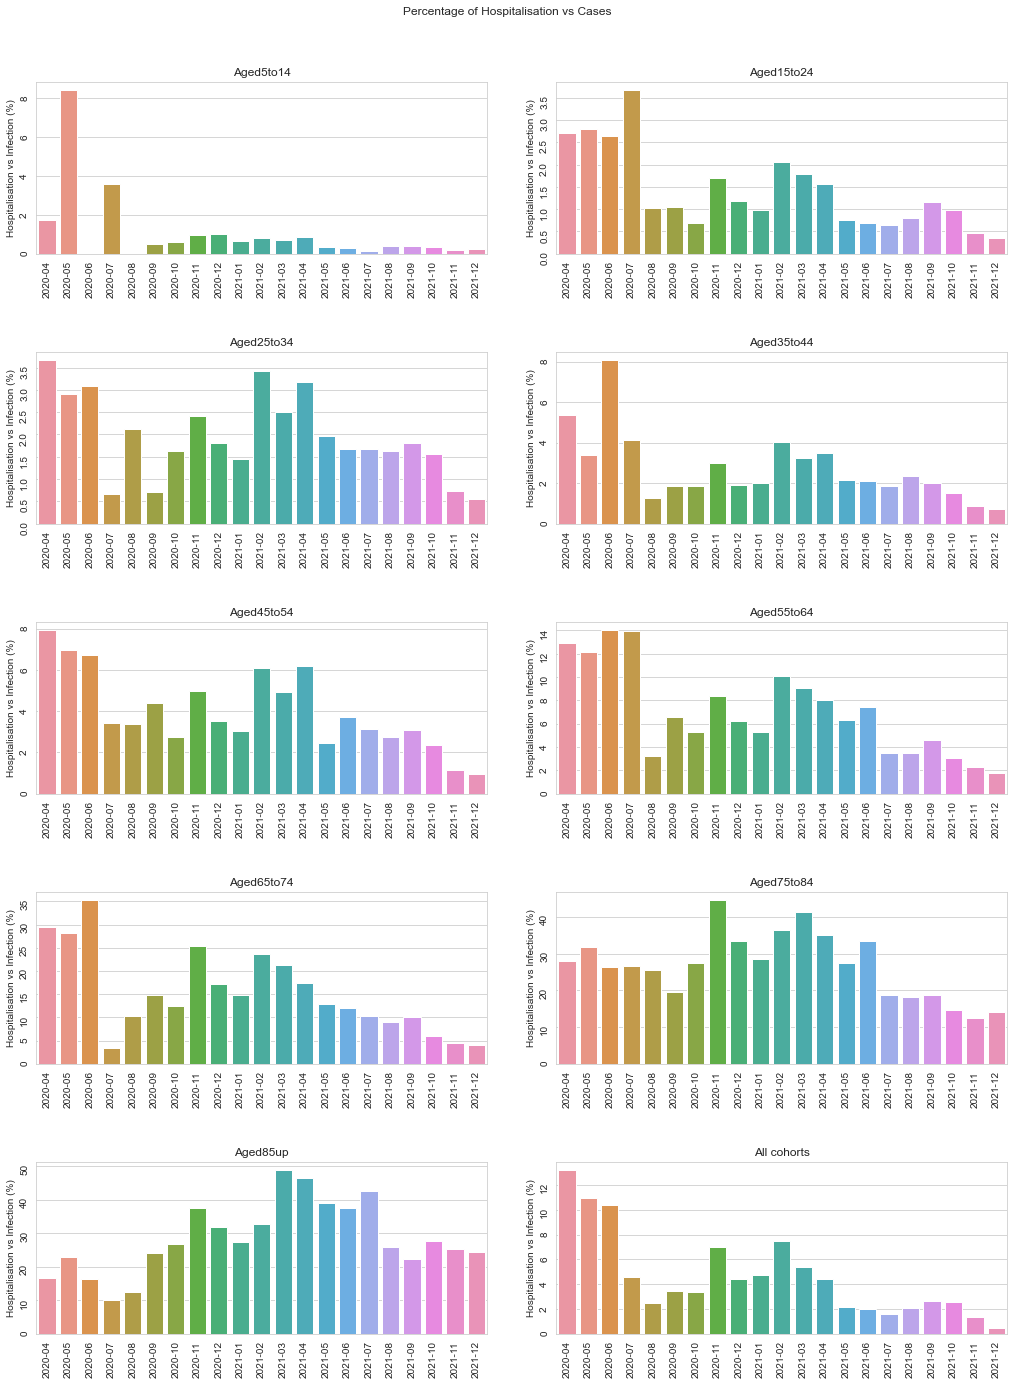

In [98]:
#NEw plots with new df

#set up a multiplot area 5 rows by 2 columns  
#don't share the ylabel 
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(5,2, figsize = (15, 20))
fig.suptitle('Percentage of Hospitalisation vs Cases')

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=covid_IRL_M_short, x="Date", y="HvsC_5to14")
sns.barplot(ax=axes[0,1],data=covid_IRL_M_short, x="Date", y="HvsC_15to24")
sns.barplot(ax=axes[1,0], data=covid_IRL_M_short, x="Date", y="HvsC_25to34")
sns.barplot(ax=axes[1,1],data=covid_IRL_M_short, x="Date", y="HvsC_35to44")
sns.barplot(ax=axes[2,0],data=covid_IRL_M_short, x="Date", y="HvsC_45to54")
sns.barplot(ax=axes[2,1],data=covid_IRL_M_short, x="Date", y="HvsC_55to64")
sns.barplot(ax=axes[3,0],data=covid_IRL_M_short, x="Date", y="HvsC_65to74")
sns.barplot(ax=axes[3,1],data=covid_IRL_M_short, x="Date", y="HvsC_75to84")
sns.barplot(ax=axes[4,0],data=covid_IRL_M_short, x="Date", y="HvsC_85up")
sns.barplot(ax=axes[4,1],data=covid_IRL_M_short, x="Date", y="HvsC_Total")

#set labels for x and y axes
axes[0,0].set_title("Aged5to14")
axes[0,1].set_title("Aged15to24")
axes[1,0].set_title("Aged25to34")
axes[1,1].set_title("Aged35to44")
axes[2,0].set_title("Aged45to54")
axes[2,1].set_title("Aged55to64")
axes[3,0].set_title("Aged65to74")
axes[3,1].set_title("Aged75to84")
axes[4,0].set_title("Aged85up")
axes[4,1].set_title("All cohorts")



# create a for loop to set up axes labels, ticks rotations and format of date
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set_ylabel("Hospitalisation vs Infection (%)")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=4.0)

#save fig
fig.savefig("HvsC_per_byAge_short.png", dpi=150)

plt.show()

In [ ]:
"""
>>>check out July 2020, it's low for most chohorts but it's high for younger people
"""

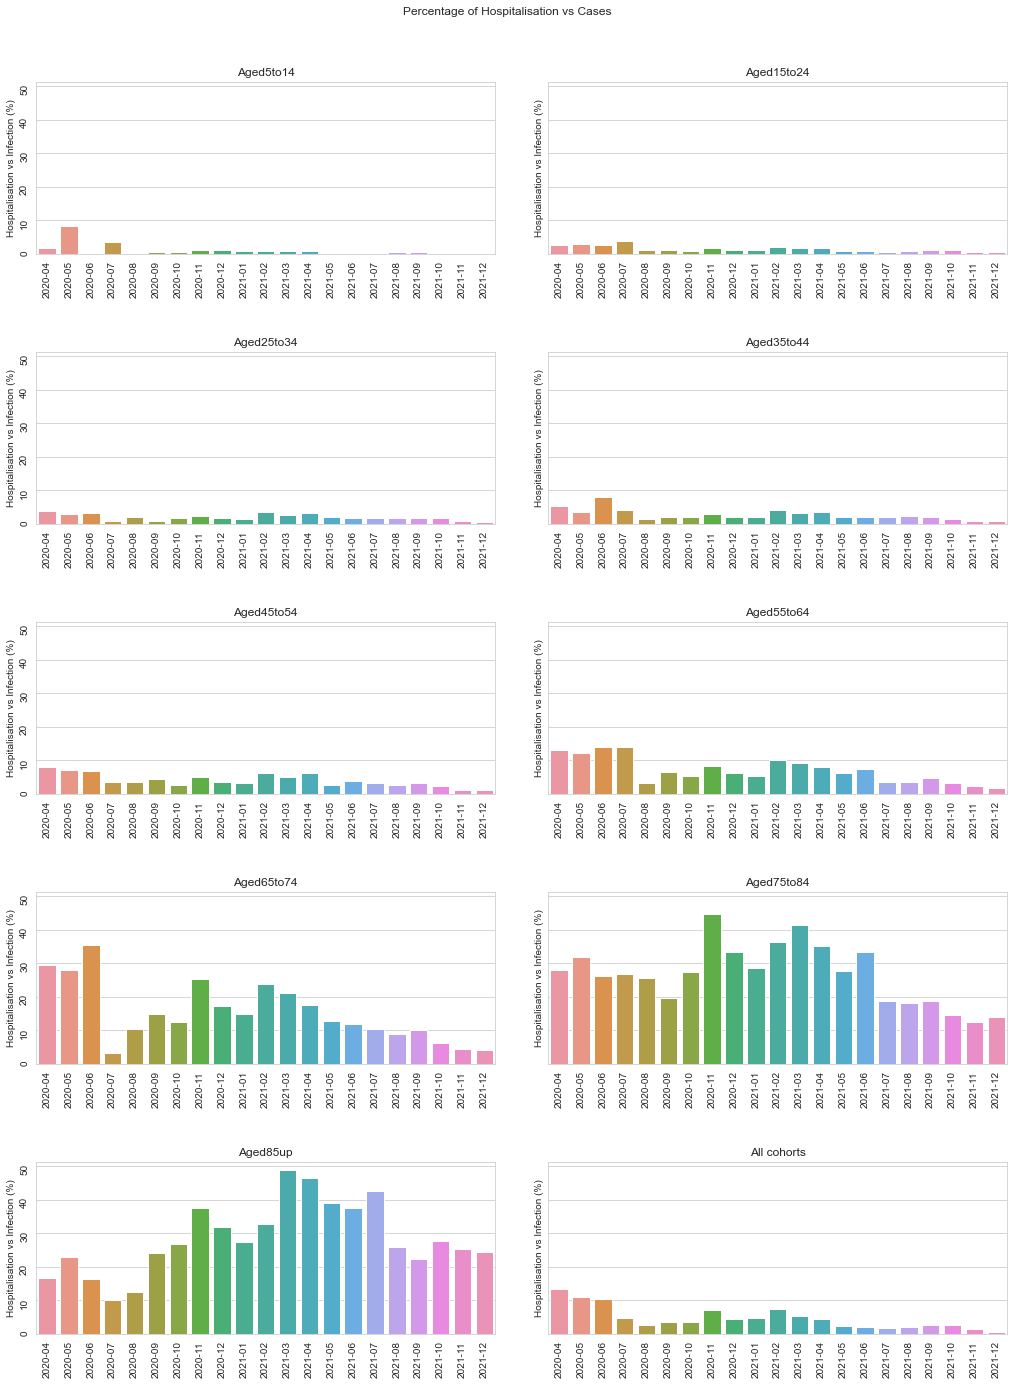

In [99]:
#NEw plots with new df

#set up a multiplot area 5 rows by 2 columns  
#Share the ylabel 
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(5,2, sharey=True,figsize = (15, 20))
fig.suptitle('Percentage of Hospitalisation vs Cases')

sns.set_style("whitegrid")
sns.set_palette("GnBu")

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=covid_IRL_M_short, x="Date", y="HvsC_5to14")
sns.barplot(ax=axes[0,1],data=covid_IRL_M_short, x="Date", y="HvsC_15to24")
sns.barplot(ax=axes[1,0], data=covid_IRL_M_short, x="Date", y="HvsC_25to34")
sns.barplot(ax=axes[1,1],data=covid_IRL_M_short, x="Date", y="HvsC_35to44")
sns.barplot(ax=axes[2,0],data=covid_IRL_M_short, x="Date", y="HvsC_45to54")
sns.barplot(ax=axes[2,1],data=covid_IRL_M_short, x="Date", y="HvsC_55to64")
sns.barplot(ax=axes[3,0],data=covid_IRL_M_short, x="Date", y="HvsC_65to74")
sns.barplot(ax=axes[3,1],data=covid_IRL_M_short, x="Date", y="HvsC_75to84")
sns.barplot(ax=axes[4,0],data=covid_IRL_M_short, x="Date", y="HvsC_85up")
sns.barplot(ax=axes[4,1],data=covid_IRL_M_short, x="Date", y="HvsC_Total")

#set labels for x and y axes
axes[0,0].set_title("Aged5to14")
axes[0,1].set_title("Aged15to24")
axes[1,0].set_title("Aged25to34")
axes[1,1].set_title("Aged35to44")
axes[2,0].set_title("Aged45to54")
axes[2,1].set_title("Aged55to64")
axes[3,0].set_title("Aged65to74")
axes[3,1].set_title("Aged75to84")
axes[4,0].set_title("Aged85up")
axes[4,1].set_title("All cohorts")



# create a for loop to set up axes labels, ticks rotations and format of date
for ax in fig.axes:
    ax.tick_params(labelrotation=90)
    ax.set_ylabel("Hospitalisation vs Infection (%)")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=4.0)

fig.savefig("HvsC_byAge_per_short_sy.png", dpi=150)

plt.show()

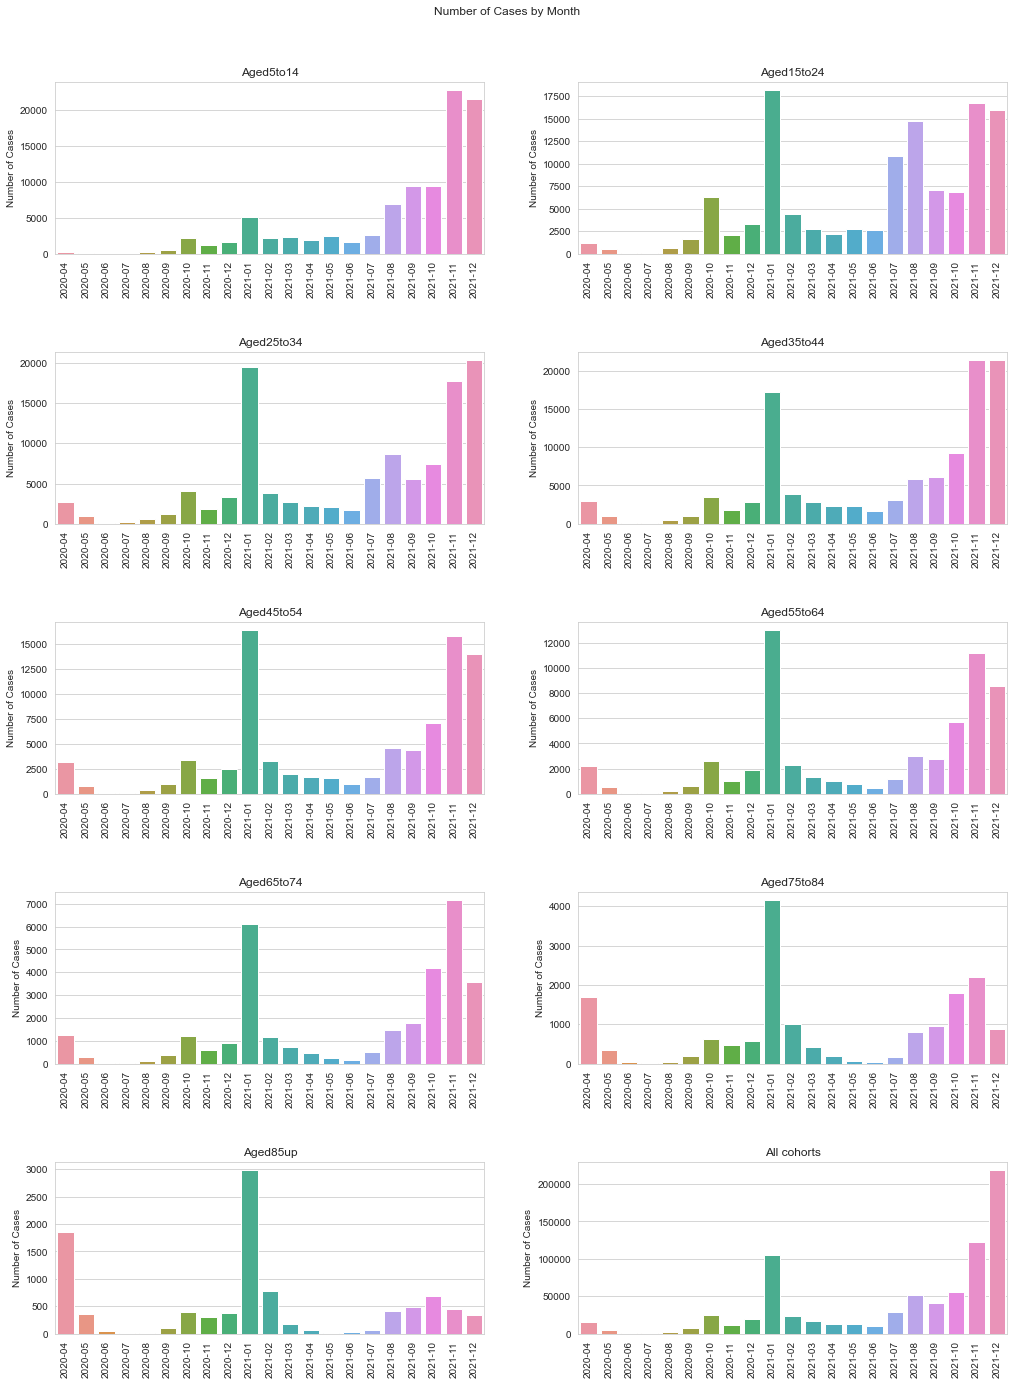

In [101]:
#NEw plots with new df

#set up a multiplot area 5 rows by 2 columns  
#don't share the ylabel 
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(5,2, figsize = (15, 20))
fig.suptitle('Number of Cases by Month')

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=covid_IRL_M_short, x="Date", y="Aged5to14_diff")
sns.barplot(ax=axes[0,1],data=covid_IRL_M_short, x="Date", y="Aged15to24_diff")
sns.barplot(ax=axes[1,0], data=covid_IRL_M_short, x="Date", y="Aged25to34_diff")
sns.barplot(ax=axes[1,1],data=covid_IRL_M_short, x="Date", y="Aged35to44_diff")
sns.barplot(ax=axes[2,0],data=covid_IRL_M_short, x="Date", y="Aged45to54_diff")
sns.barplot(ax=axes[2,1],data=covid_IRL_M_short, x="Date", y="Aged55to64_diff")
sns.barplot(ax=axes[3,0],data=covid_IRL_M_short, x="Date", y="Aged65to74_diff")
sns.barplot(ax=axes[3,1],data=covid_IRL_M_short, x="Date", y="Aged75to84_diff")
sns.barplot(ax=axes[4,0],data=covid_IRL_M_short, x="Date", y="Aged85up_diff")
sns.barplot(ax=axes[4,1],data=covid_IRL_M_short, x="Date", y="ConfirmedCovidCases")

#set labels for x and y axes
axes[0,0].set_title("Aged5to14")
axes[0,1].set_title("Aged15to24")
axes[1,0].set_title("Aged25to34")
axes[1,1].set_title("Aged35to44")
axes[2,0].set_title("Aged45to54")
axes[2,1].set_title("Aged55to64")
axes[3,0].set_title("Aged65to74")
axes[3,1].set_title("Aged75to84")
axes[4,0].set_title("Aged85up")
axes[4,1].set_title("All cohorts")



# create a for loop to set up axes labels, ticks rotations and format of date
for ax in fig.axes:
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Number of Cases")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=4.0)

fig.savefig("C_byAge_per_short_ny.png", dpi=150)

plt.show()

__Covid Deaths vs Infections and Hospitalisations__

First I plot the individual monthly trends

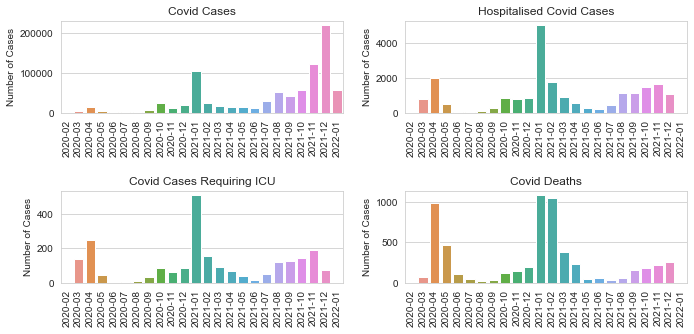

In [103]:
#set up a multiplot area 2 rows by 2 columns  
#don't share the ylabel 
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(2,2, figsize = (10, 5))

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=covid_IRL_M, x="Date", y="ConfirmedCovidCases")
sns.barplot(ax=axes[0,1],data=covid_IRL_M, x="Date", y="HospitalisedCovidCases_diff")
sns.barplot(ax=axes[1,0], data=covid_IRL_M, x="Date", y="RequiringICUCovidCases_diff")
sns.barplot(ax=axes[1,1], data=covid_IRL_M, x="Date", y="ConfirmedCovidDeaths")

#set labels for x and y axes
axes[0,0].set_title("Covid Cases")
axes[0,1].set_title("Hospitalised Covid Cases")
axes[1,0].set_title("Covid Cases Requiring ICU")
axes[1,1].set_title("Covid Deaths")

# create a for loop to set up axes labels, ticks rotations and format of date
for ax in fig.axes:
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Number of Cases")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=2.0)

#save figure
fig.savefig("CHICUD.png", dpi=150)

plt.show()

In [ ]:
"""
Interesting patterns.
1) Hospitalisations and ICU cases seems to be strongly correlated
2) In 2021 Hospitalisation is going down despite cases going up compared to 2020
3) High number of deaths in Jan 2021 not associated with hospitalisations  
nor ICU cases in the same month.
4) spike of cases in Oct 2020 is also visible in spike of ICU
"""

 % Hosp vs Deaths and ICU cases

In [105]:
#I use the % funtion to create new columns with % Hospitalised vs Total cases
#I know I could do some sort of loop but I am running out of time
#I want to see the visualisations
covid_IRL_M["ICUvsH"]=percentage(covid_IRL_M["RequiringICUCovidCases_diff"],
                      covid_IRL_M["HospitalisedCovidCases_diff"])  
covid_IRL_M["DvsH"]=percentage(covid_IRL_M["ConfirmedCovidDeaths"],
                      covid_IRL_M["HospitalisedCovidCases_diff"])
covid_IRL_M["DvsICU"]=percentage(covid_IRL_M["ConfirmedCovidDeaths"],
                      covid_IRL_M["RequiringICUCovidCases_diff"])
covid_IRL_M["DvsC"]=percentage(covid_IRL_M["ConfirmedCovidDeaths"],
                      covid_IRL_M["ConfirmedCovidCases"])
covid_IRL_M["ICUvsC"]=percentage(covid_IRL_M["RequiringICUCovidCases_diff"],
                      covid_IRL_M["ConfirmedCovidCases"])

covid_IRL_M.columns

Index(['Date', 'ConfirmedCovidCases', 'ConfirmedCovidDeaths',
       'HospitalisedCovidCases_diff', 'RequiringICUCovidCases_diff',
       'Aged1to4_diff', 'Aged5to14_diff', 'Aged15to24_diff', 'Aged25to34_diff',
       'Aged35to44_diff', 'Aged45to54_diff', 'Aged55to64_diff',
       'Aged65to74_diff', 'Aged75to84_diff', 'Aged85up_diff',
       'HospitalisedAged5_diff', 'HospitalisedAged5to14_diff',
       'HospitalisedAged15to24_diff', 'HospitalisedAged25to34_diff',
       'HospitalisedAged35to44_diff', 'HospitalisedAged45to54_diff',
       'HospitalisedAged55to64_diff', 'HospitalisedAged65to74_diff',
       'HospitalisedAged75to84_diff', 'HospitalisedAged85up_diff', 'Male_diff',
       'Female_diff', 'Unknown_diff', 'HvsC_Total', 'HvsC_5to14',
       'HvsC_15to24', 'HvsC_25to34', 'HvsC_35to44', 'HvsC_45to54',
       'HvsC_55to64', 'HvsC_65to74', 'HvsC_75to84', 'HvsC_85up', 'ICUvsH',
       'DvsH', 'DvsICU', 'DvsC', 'ICUvsC'],
      dtype='object')

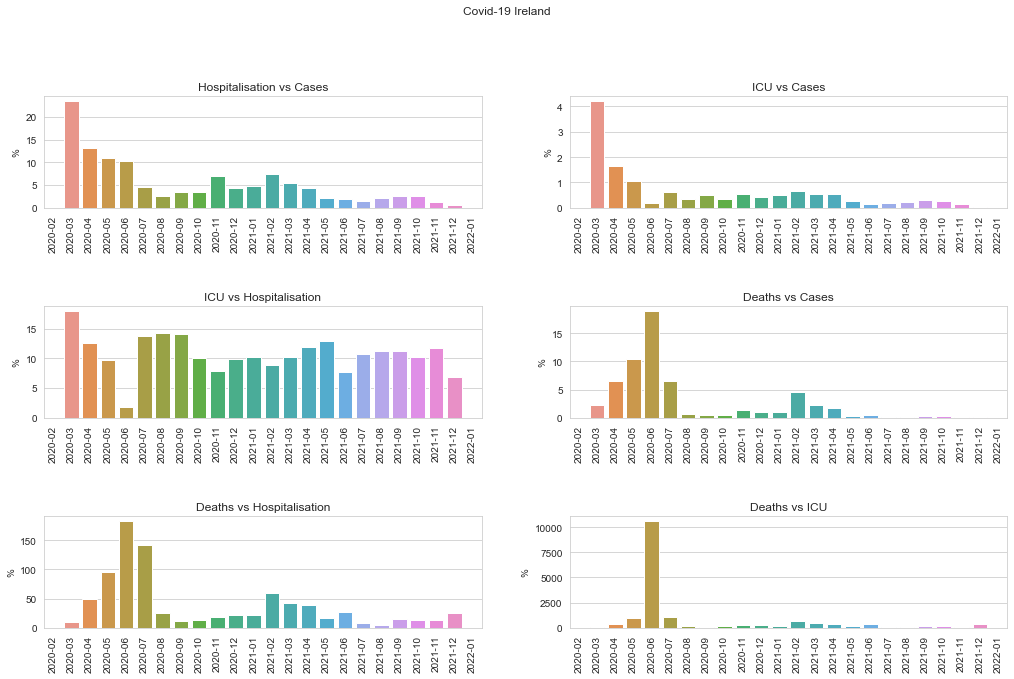

In [106]:
#set up a multiplot area 3 rows by 2 columns  
#don't share the ylabel 
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(3,2, figsize = (15, 10))
fig.suptitle('Covid-19 Ireland')

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=covid_IRL_M, x="Date", y="HvsC_Total")
sns.barplot(ax=axes[0,1],data=covid_IRL_M, x="Date", y="ICUvsC")
sns.barplot(ax=axes[1,0], data=covid_IRL_M, x="Date", y="ICUvsH")
sns.barplot(ax=axes[1,1],data=covid_IRL_M, x="Date", y="DvsC")
sns.barplot(ax=axes[2,0],data=covid_IRL_M, x="Date", y="DvsH")
sns.barplot(ax=axes[2,1],data=covid_IRL_M, x="Date", y="DvsICU")

#set labels for x and y axes
axes[0,0].set_title("Hospitalisation vs Cases")
axes[0,1].set_title("ICU vs Cases")
axes[1,0].set_title("ICU vs Hospitalisation")
axes[1,1].set_title("Deaths vs Cases")
axes[2,0].set_title("Deaths vs Hospitalisation")
axes[2,1].set_title("Deaths vs ICU")

# create a for loop to set up axes labels, ticks rotations and format of date
for ax in fig.axes:
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("%")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=4.0)

fig.savefig("Per_CHICUD.png", dpi=150)

plt.show()

In [ ]:
"""
1)Interestingly, Hospitalisation vs cases is going down, however once people get to hospital 
The % that ends up in ICU is relatively constant.
2)spike in Deaths vs ICU/Hospitalisations in June 2020

"""

Stacked cahrt of infections/hospitalisations by age

In [194]:
covid_IRL_M.columns

Index(['Date', 'ConfirmedCovidCases', 'ConfirmedCovidDeaths',
       'HospitalisedCovidCases_diff', 'RequiringICUCovidCases_diff',
       'Aged1to4_diff', 'Aged5to14_diff', 'Aged15to24_diff', 'Aged25to34_diff',
       'Aged35to44_diff', 'Aged45to54_diff', 'Aged55to64_diff',
       'Aged65to74_diff', 'Aged75to84_diff', 'Aged85up_diff',
       'HospitalisedAged5_diff', 'HospitalisedAged5to14_diff',
       'HospitalisedAged15to24_diff', 'HospitalisedAged25to34_diff',
       'HospitalisedAged35to44_diff', 'HospitalisedAged45to54_diff',
       'HospitalisedAged55to64_diff', 'HospitalisedAged65to74_diff',
       'HospitalisedAged75to84_diff', 'HospitalisedAged85up_diff', 'Male_diff',
       'Female_diff', 'Unknown_diff', 'HvsC_Total', 'HvsC_5to14',
       'HvsC_15to24', 'HvsC_25to34', 'HvsC_35to44', 'HvsC_45to54',
       'HvsC_55to64', 'HvsC_65to74', 'HvsC_75to84', 'HvsC_85up', 'ICUvsH',
       'DvsH', 'DvsICU', 'DvsC', 'ICUvsC'],
      dtype='object')


Stacked bar chart of infections in ireland by month by age

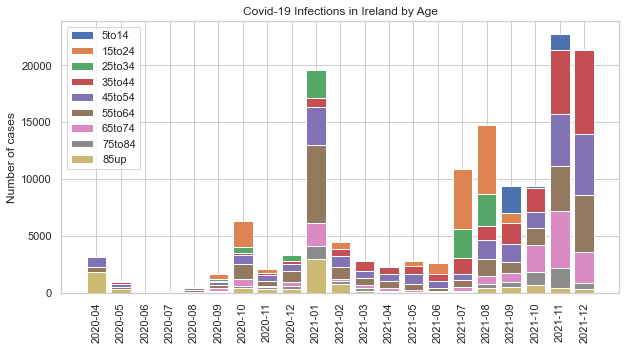

In [255]:
fig, ax = plt.subplots(figsize=(10,5))

#ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged1to4_diff"], label='1to4')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged5to14_diff"], label='5to14')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged15to24_diff"], label='15to24')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged25to34_diff"], label='25to34')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged35to44_diff"], label='35to44')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged45to54_diff"], label='45to54')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged55to64_diff"], label='55to64')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged65to74_diff"], label='65to74')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged75to84_diff"], label='75to84')
ax.bar(covid_IRL_M_short["Date"], covid_IRL_M_short["Aged85up_diff"], label='85up')

ax.set_ylabel('Number of cases')
ax.set_title('Covid-19 Infections in Ireland by Age')
ax.legend()
ax.tick_params(axis='x', labelrotation=90)

fig.savefig("covid_IRL_stacked.png", dpi=150)

plt.show()

Stacked bar chart of % 

In [286]:
# create a list of column to which apply the transformations 
C_stack_col=['Date','Aged5to14_diff', 'Aged15to24_diff', 'Aged25to34_diff','Aged35to44_diff', 'Aged45to54_diff', 'Aged55to64_diff','Aged65to74_diff', 'Aged75to84_diff', 'Aged85up_diff' ]

#create a new df with those columns only
covid_stack_M_short=covid_IRL_M_short[C_stack_col]

#create 2 new df one with the summed values
#and the other with %
  
df_total = covid_stack_M_short["Aged5to14_diff"] + covid_stack_M_short["Aged15to24_diff"] +covid_stack_M_short["Aged25to34_diff"] +covid_stack_M_short["Aged35to44_diff"] +covid_stack_M_short["Aged45to54_diff"] +covid_stack_M_short["Aged55to64_diff"] + covid_stack_M_short["Aged65to74_diff"] + covid_stack_M_short["Aged75to84_diff"] + covid_stack_M_short["Aged85up_diff"]
df_rel = covid_stack_M_short[covid_stack_M_short.columns[1:]].div(df_total, 0)*100
  


In [289]:
#add the date column to the % df
df_rel["Date"]=covid_stack_M_short["Date"]

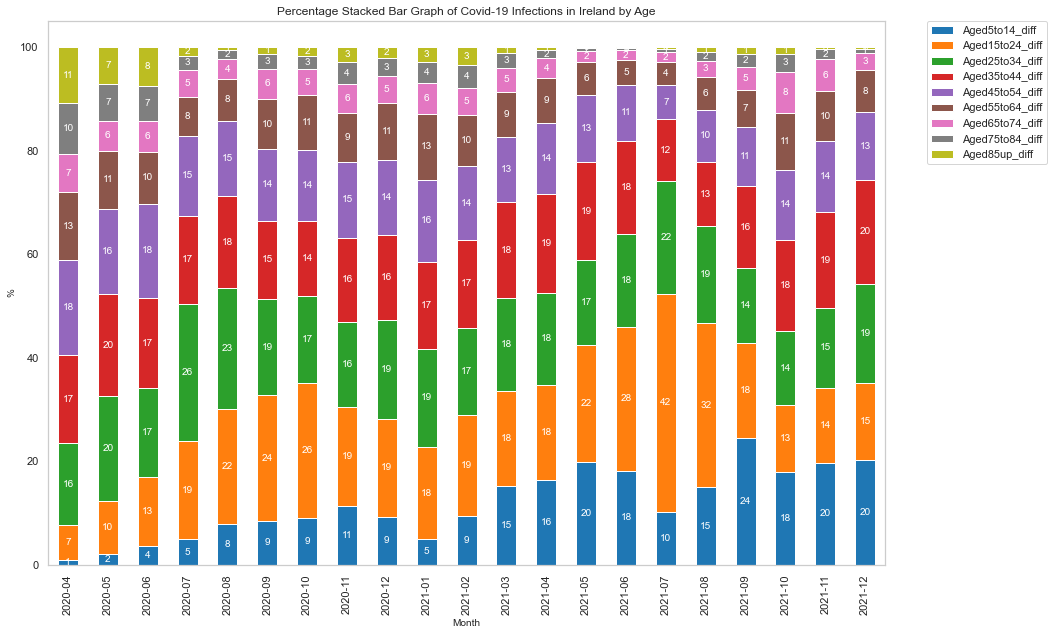

In [296]:
#create a stacked bar chart with labels

ax = df_rel.plot(x = 'Date', kind = 'bar', stacked = True, 
  title = 'Percentage Stacked Bar Graph of Covid-19 Infections in Ireland by Age', 
  mark_right = True, figsize=(15,10))

# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, color="white")
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("%", fontsize=10)
ax.set_xlabel("Month", fontsize=10)

plt.show()
        


***

# Covid Variants & Vaccinations

One of the many element making this analysis complicated is the fact that the virus changes and that people's immune response against it changed as well due to the vaccination program.

I think this is a reason why we cannot correlate easily cases numbers vs hospitalisations in most cohorts. I think the easies cohort is the unvaccinated (=kids).

I'll compile some info regarding variants of concern discovery dates in Ireland and vaccination schedules in Ireland. 

__Variants__

[Info regarding variants of concern in Ireland has been sourced from here](https://www.hpsc.ie/a-z/respiratory/coronavirus/novelcoronavirus/surveillance/summaryofcovid-19virusvariantsinireland/Virus%20Variant%20report.pdf)

"Cases of five variants of concern (VOC) have been identified in Ireland to date; B.1.1.7 (Alpha), B.1.351 (Beta), P.1 (Gamma), B.1.617.2 (Delta) and B.1.1.529 (Omicron). Several sublineages of the Delta variant have also been identified. A small number of cases of two variants of interest (VOI) have been also found ; C.37 (Lambda) and B.1.621 (Mu)." from HPSC document referenced above

In [107]:
#HPSC data is based on week numbers reather than dates so I need to convert the week number into a datetime value
#I found the following bit of code that does that

#I import two python packages (datetime and dateutil.relativedelta)
import datetime
from dateutil.relativedelta import relativedelta

#I test the result for week 51 of 2020
print(datetime.date(2020, 1, 1) + relativedelta(weeks=+51))

2020-12-23


In [108]:
#Because I'll use this a few times I'll make a custom function

#I'll need to feed the YEAR and WEEK_N to the function and it will return 
#the DATE
def week_number_to_date(YEAR, WEEK_N):
    DATE=datetime.date(YEAR, 1, 1) + relativedelta(weeks=+WEEK_N)
    return DATE

In [109]:
week_number_to_date(2020,51)

datetime.date(2020, 12, 23)

In [110]:
#I make a dictionary with the variants discovery dates in Ireland
variants_IRL={"Alpha":week_number_to_date(2020,37),"Beta":week_number_to_date(2020,52), 
             "Gamma":week_number_to_date(2021,5),"Delta":week_number_to_date(2021,13), 
              "Omicron":week_number_to_date(2021,47)}
print(variants_IRL)

{'Alpha': datetime.date(2020, 9, 16), 'Beta': datetime.date(2020, 12, 30), 'Gamma': datetime.date(2021, 2, 5), 'Delta': datetime.date(2021, 4, 2), 'Omicron': datetime.date(2021, 11, 26)}


In [111]:
#I make a df from the dictionary
#I had an error (ValueError: If using all scalar values, you must must pass an index)
#I found that passing thekey/value pairs with .items() method solved the problem
#I added the names of the columns
variants=pd.DataFrame(variants_IRL.items(), columns=["Variant", "Var_Date"])

In [98]:
variants

Variant    Var_Date
0    Alpha  2020-09-16
1     Beta  2020-12-30
2    Gamma  2021-02-05
3    Delta  2021-04-02
4  Omicron  2021-11-26

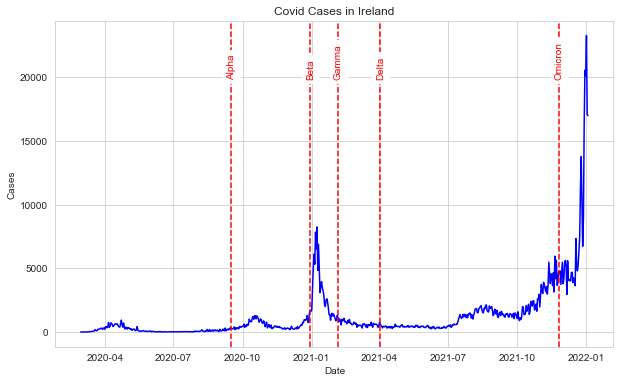

In [113]:
#plot cases in Ireland highlighting Variants discovery dates
#set plot style
sns.set_style("whitegrid")

# prepare the figure
fig, ax = plt.subplots(figsize = (10, 6))

# set up the plot
sns.lineplot(ax= ax, data=covid_IRL_ordered, x="Date",y="ConfirmedCovidCases", color="b").set_title('Covid Cases in Ireland')

# set axes labels
plt.xlabel('Date')
plt.ylabel('Cases')

#add vertical lines to specify key dates

#Alpha
#ax.avline specifies info for line (first location on x axix, then line style and colour)
ax.axvline(pd.to_datetime('2020-09-16'),linestyle='--', color='r')

#plt.text specifies info for the text (x-coordinate of data label, y-coordinate of label, label and fontsize)
plt.text(x = pd.to_datetime('2020-09-22'), y = 20000, ha='right',
         s = "Alpha", color='r', rotation=90).set_backgroundcolor("white")

#Beta
ax.axvline(pd.to_datetime('2020-12-30'),linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-01-05'), y = 20000, ha="right", 
         s = "Beta", color='r', rotation=90).set_backgroundcolor("white")

#Gamma
ax.axvline(pd.to_datetime('2021-02-05'),linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-02-11'), y = 20000, ha="right", 
         s = "Gamma", color='r', rotation=90).set_backgroundcolor("white")

#Delta
ax.axvline(pd.to_datetime('2021-04-02'),linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-04-08'), y = 20000, ha="right", 
         s = "Delta", color='r', rotation=90).set_backgroundcolor("white")

#Omicron
ax.axvline(pd.to_datetime('2021-11-26'),linestyle='--',color='r')
plt.text(x = pd.to_datetime('2021-12-02'), y = 20000, ha="right", 
         s = "Omicron", color='r', rotation=90).set_backgroundcolor("white")

fig.savefig("Covid_Var.png", dpi=150)
plt.show()


In [ ]:
"""
By reading the literature, Beta and Gamma variants weren't widespread.
The peak after Xmas 2020 was due predominatly to the Alpha variant which
was first found in samples in sept 2020 (via retrospective analysis) but
become prevalent in Dec 2020.

I dont't think that many conclusions can be drawn just based on discovery 
dates of variants. the HPSC has more comprehensive visualizations for which I 
haven't found the corresponding datasets.

I will abandon this line of enquiry.
"""

__Vaccines__

[Vaccination dataset sourced here](https://covid-19.geohive.ie/datasets/0101ed10351e42968535bb002f94c8c6_0/about)

In [114]:
#This dataset is a csv file saved locally, I import it as Pandas DataFrame.

vaccines_IRL = pd.read_csv('/Users/Alessandra/Dropbox/Data Analytics/Project/UCDPA_AlessandraRavida/Data/COVID-19_HSE_Weekly_Vaccination_Figures.csv')

__Understanding the dataset__

Check basic data structure of the data set via .info(), .head() functions.
Also note the first and last day of dataset for personal reference.

In [115]:
#I start analysing structure of the df
vaccines_IRL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   X                    53 non-null     float64
 1   Y                    53 non-null     float64
 2   ExtractDate          53 non-null     object 
 3   Week                 53 non-null     object 
 4   TotalweeklyVaccines  53 non-null     int64  
 5   Male                 53 non-null     int64  
 6   Female               53 non-null     int64  
 7   NA                   53 non-null     int64  
 8   Moderna              53 non-null     int64  
 9   Pfizer               53 non-null     int64  
 10  Janssen              53 non-null     int64  
 11  AstraZeneca          53 non-null     int64  
 12  Partial_Age10to19    53 non-null     int64  
 13  Partial_Age20to29    53 non-null     int64  
 14  Partial_Age30to39    53 non-null     int64  
 15  Partial_Age40to49    53 non-null     int64

In [116]:
#look at the first 5 rows of the dataset

vaccines_IRL.head()

X         Y             ExtractDate      Week  TotalweeklyVaccines  \
0 -7.6926  53.28823  2022/01/03 00:00:00+00  2020-W53                 3955   
1 -7.6926  53.28823  2022/01/03 00:00:00+00  2021-W01                43882   
2 -7.6926  53.28823  2022/01/03 00:00:00+00  2021-W02                52684   
3 -7.6926  53.28823  2022/01/03 00:00:00+00  2021-W03                49733   
4 -7.6926  53.28823  2022/01/03 00:00:00+00  2021-W04                51409   

    Male  Female  NA  Moderna  Pfizer  ...  FullyPer_Age10to19  \
0   1252    2703   0        2    3946  ...                 NaN   
1  11720   32162   0       14   43849  ...            0.000000   
2  13892   38792   0     1923   50737  ...            0.000000   
3  14790   34942   1       20   49675  ...            0.000004   
4  14867   36542   0        9   51341  ...            0.000119   

   FullyPer_Age20to29  FullyPer_Age30to39  FullyPer_Age40to49  \
0                 NaN                 NaN                 NaN   
1            0.000003            0.000010            0.000003   
2            0.000015            0.000019            0.000008   
3            0.001095            0.001296            0.001134   
4            0.012113            0.015385            0.016736   

   FullyPer_Age50to59  FullyPer_Age60to69  FullyPer_Age70to79  FullyPer_80_  \
0                 NaN                 NaN                 NaN           NaN   
1            0.000005            0.000000            0.000003      0.000011   
2            0.000008            0.000000            0.000006      0.000011   
3            0.001122            0.000483            0.000033      0.000068   
4            0.016266            0.008142            0.001080      0.004180   

   FullyPer_NA  ObjectId  
0          NaN         1  
1          NaN         2  
2          NaN         3  
3          inf         4  
4          inf         5  

[5 rows x 67 columns]

In [118]:
vaccines_IRL.columns

Index(['X', 'Y', 'ExtractDate', 'Week', 'TotalweeklyVaccines', 'Male',
       'Female', 'NA', 'Moderna', 'Pfizer', 'Janssen', 'AstraZeneca',
       'Partial_Age10to19', 'Partial_Age20to29', 'Partial_Age30to39',
       'Partial_Age40to49', 'Partial_Age50to59', 'Partial_Age60to69',
       'Partial_Age70to79', 'Partial_Age80_', 'Partial_NA', 'ParCum_Age10to19',
       'ParCum_Age20to29', 'ParCum_Age30to39', 'ParCum_Age40to49',
       'ParCum_Age50to59', 'ParCum_Age60to69', 'ParCum_Age70to79',
       'ParCum_80_', 'ParCum_NA', 'ParPer_Age10to19', 'ParPer_Age20to29',
       'ParPer_Age30to39', 'ParPer_Age40to49', 'ParPer_Age50to59',
       'ParPer_Age60to69', 'ParPer_Age70to79', 'ParPer_80_', 'ParPer_NA',
       'Fully_Age10to19', 'Fully_Age20to29', 'Fully_Age30to39',
       'Fully_Age40to49', 'Fully_Age50to59', 'Fully_Age60to69',
       'Fully_Age70to79', 'Fully_Age80_', 'Fully_NA', 'FullyCum_Age10to19',
       'FullyCum_Age20to29', 'FullyCum_Age30to39', 'FullyCum_Age40to49',
       'Fully

In [119]:
"""
First date in dataset is Week 53 of 2020.
I now check what's the last date.
This information will be important to slice other time-based datasets.
"""
#I select the last row of the dataframe via its index number and only the date column

vaccines_IRL.loc[52 , "Week"]

'2021-W52'

__Cleaning the dataset__

Check for NaN values and replace them with 0.0

In [120]:
#I check for NaN in the dataset

vaccines_IRL.isna().sum()

X                      0
Y                      0
ExtractDate            0
Week                   0
TotalweeklyVaccines    0
                      ..
FullyPer_Age60to69     1
FullyPer_Age70to79     1
FullyPer_80_           1
FullyPer_NA            3
ObjectId               0
Length: 67, dtype: int64

In [121]:
#replacing NaN with 0 and check if successful

vaccines_IRL_fill = vaccines_IRL.fillna(0)
vaccines_IRL_fill.isna().sum()

X                      0
Y                      0
ExtractDate            0
Week                   0
TotalweeklyVaccines    0
                      ..
FullyPer_Age60to69     0
FullyPer_Age70to79     0
FullyPer_80_           0
FullyPer_NA            0
ObjectId               0
Length: 67, dtype: int64

In [122]:
vaccines_IRL_fill["Week"]

0     2020-W53
1     2021-W01
2     2021-W02
3     2021-W03
4     2021-W04
5     2021-W05
6     2021-W06
7     2021-W07
8     2021-W08
9     2021-W09
10    2021-W10
11    2021-W11
12    2021-W12
13    2021-W13
14    2021-W14
15    2021-W15
16    2021-W16
17    2021-W17
18    2021-W18
19    2021-W19
20    2021-W20
21    2021-W21
22    2021-W22
23    2021-W23
24    2021-W24
25    2021-W25
26    2021-W26
27    2021-W27
28    2021-W28
29    2021-W29
30    2021-W30
31    2021-W31
32    2021-W32
33    2021-W33
34    2021-W34
35    2021-W35
36    2021-W36
37    2021-W37
38    2021-W38
39    2021-W39
40    2021-W40
41    2021-W41
42    2021-W42
43    2021-W43
44    2021-W44
45    2021-W45
46    2021-W46
47    2021-W47
48    2021-W48
49    2021-W49
50    2021-W50
51    2021-W51
52    2021-W52
Name: Week, dtype: object

In [123]:
#I make a loop to extract the date (year, month, day (=first day of the week) #I create a variable week from the week column ofthe vaccines df
Week=vaccines_IRL_fill["Week"]
#I create an empty list
date=[]

#for loop based on items in the Week series
for i in Week:
    #the function below returns the date, it needs a string 'year-Wnumber'as input(=i)
    d= datetime.datetime.strptime(str(i) + '-1', '%G-W%V-%u')
    #I add each iteration to the date list
    date.append(d)

#I create a new column to the vaccines df with the date list
vaccines_IRL_fill["Date"]=date
vaccines_IRL_fill["Date"]

0    2020-12-28
1    2021-01-04
2    2021-01-11
3    2021-01-18
4    2021-01-25
5    2021-02-01
6    2021-02-08
7    2021-02-15
8    2021-02-22
9    2021-03-01
10   2021-03-08
11   2021-03-15
12   2021-03-22
13   2021-03-29
14   2021-04-05
15   2021-04-12
16   2021-04-19
17   2021-04-26
18   2021-05-03
19   2021-05-10
20   2021-05-17
21   2021-05-24
22   2021-05-31
23   2021-06-07
24   2021-06-14
25   2021-06-21
26   2021-06-28
27   2021-07-05
28   2021-07-12
29   2021-07-19
30   2021-07-26
31   2021-08-02
32   2021-08-09
33   2021-08-16
34   2021-08-23
35   2021-08-30
36   2021-09-06
37   2021-09-13
38   2021-09-20
39   2021-09-27
40   2021-10-04
41   2021-10-11
42   2021-10-18
43   2021-10-25
44   2021-11-01
45   2021-11-08
46   2021-11-15
47   2021-11-22
48   2021-11-29
49   2021-12-06
50   2021-12-13
51   2021-12-20
52   2021-12-27
Name: Date, dtype: datetime64[ns]

Convert Date column into datetime variables

In [124]:
#I make a datetime series from the Date column 
vaccines_IRL_fill["Date"]=pd.to_datetime(vaccines_IRL_fill["Date"])

Group by Month

In [125]:
#I create a new df where the date column is only showing the months
#and the other columns have aggregated monthly values
#I do this by grouping by the date column but using the .dt attribute strftime
#to group by year and month all the columns listed and returning a sum
vaccines_IRL_M=vaccines_IRL_fill.groupby(vaccines_IRL_fill['Date'].
                                      dt.strftime('%Y-%m'))[['TotalweeklyVaccines', 'Male',
       'Female', 'NA', 'Moderna', 'Pfizer', 'Janssen', 'AstraZeneca',
       'Partial_Age10to19', 'Partial_Age20to29', 'Partial_Age30to39',
       'Partial_Age40to49', 'Partial_Age50to59', 'Partial_Age60to69',
       'Partial_Age70to79', 'Partial_Age80_', 'Partial_NA',
       'Fully_Age10to19', 'Fully_Age20to29', 'Fully_Age30to39',
       'Fully_Age40to49', 'Fully_Age50to59', 'Fully_Age60to69',
       'Fully_Age70to79', 'Fully_Age80_', 'Fully_NA']].sum()

#Check the df
vaccines_IRL_M.head()

TotalweeklyVaccines    Male  Female  NA  Moderna  Pfizer  Janssen  \
Date                                                                         
2020-12                 3955    1252    2703   0        2    3946        0   
2021-01               197708   55269  142438   1     1966  195602        1   
2021-02               263640   78978  184659   3     7629  185551       10   
2021-03               517914  215828  302062  24    33867  345770       42   
2021-04               687757  335660  352029  68    40356  476398       49   

         AstraZeneca  Partial_Age10to19  Partial_Age20to29  ...  Partial_NA  \
Date                                                        ...               
2020-12            7                  5                807  ...           1   
2021-01          139                536              17869  ...          24   
2021-02        70450                656              15406  ...           9   
2021-03       138235               1928              22775  ...           2   
2021-04       170954               3004              13951  ...           3   

         Fully_Age10to19  Fully_Age20to29  Fully_Age30to39  Fully_Age40to49  \
Date                                                                          
2020-12              0.0              0.0              0.0              0.0   
2021-01             81.0           7291.0          10659.0          12829.0   
2021-02            442.0          11218.0          17415.0          22345.0   
2021-03            138.0           3503.0           4946.0           5752.0   
2021-04            371.0            910.0           1538.0           1776.0   

         Fully_Age50to59  Fully_Age60to69  Fully_Age70to79  Fully_Age80_  \
Date                                                                       
2020-12              0.0              0.0              0.0           0.0   
2021-01          10104.0           4031.0            364.0         736.0   
2021-02          20947.0          12552.0           6329.0       15576.0   
2021-03           6153.0           5494.0          15768.0       96397.0   
2021-04           2016.0           3780.0         110902.0       66871.0   

         Fully_NA  
Date               
2020-12       0.0  
2021-01       4.0  
2021-02      17.0  
2021-03       2.0  
2021-04       0.0  

[5 rows x 26 columns]

In [126]:
#check for NaN
vaccines_IRL_M.isna().sum()

TotalweeklyVaccines    0
Male                   0
Female                 0
NA                     0
Moderna                0
Pfizer                 0
Janssen                0
AstraZeneca            0
Partial_Age10to19      0
Partial_Age20to29      0
Partial_Age30to39      0
Partial_Age40to49      0
Partial_Age50to59      0
Partial_Age60to69      0
Partial_Age70to79      0
Partial_Age80_         0
Partial_NA             0
Fully_Age10to19        0
Fully_Age20to29        0
Fully_Age30to39        0
Fully_Age40to49        0
Fully_Age50to59        0
Fully_Age60to69        0
Fully_Age70to79        0
Fully_Age80_           0
Fully_NA               0
dtype: int64

In [127]:
#remove "Date" from index
vaccines_IRL_M=vaccines_IRL_M.reset_index()

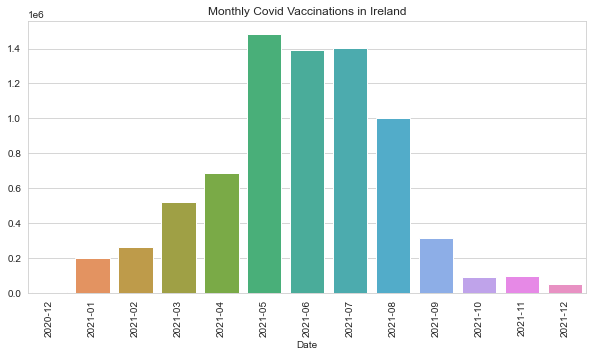

In [129]:
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=vaccines_IRL_M, x= "Date", y="TotalweeklyVaccines")
ax.set_ylabel("")
ax.set_title("Monthly Covid Vaccinations in Ireland")
plt.xticks(rotation=90)

fig.savefig("Vacc.png", dpi=150)
plt.show()

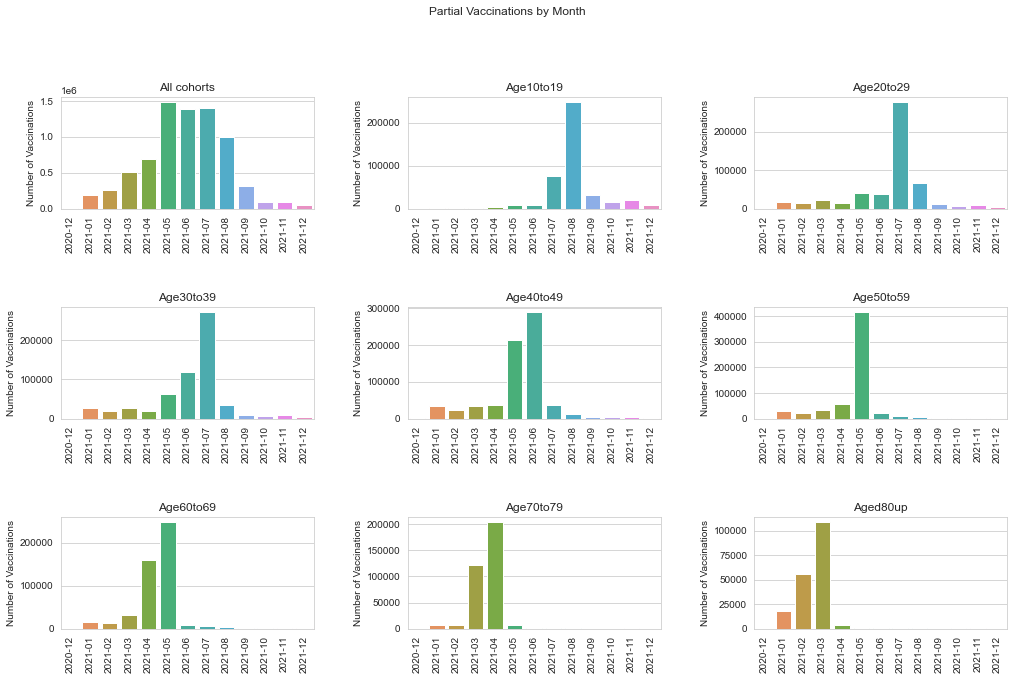

In [130]:
#plot partial vaccinations by age

#set up a multiplot area 3 rows by 3 columns  
#don't share the ylabel 
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(3,3, figsize = (15, 10))
fig.suptitle('Partial Vaccinations by Month')

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=vaccines_IRL_M, x="Date", y="TotalweeklyVaccines")
sns.barplot(ax=axes[0,1],data=vaccines_IRL_M, x="Date", y="Partial_Age10to19")
sns.barplot(ax=axes[0,2], data=vaccines_IRL_M, x="Date", y="Partial_Age20to29")
sns.barplot(ax=axes[1,0],data=vaccines_IRL_M, x="Date", y="Partial_Age30to39")
sns.barplot(ax=axes[1,1],data=vaccines_IRL_M, x="Date", y="Partial_Age40to49")
sns.barplot(ax=axes[1,2],data=vaccines_IRL_M, x="Date", y="Partial_Age50to59")
sns.barplot(ax=axes[2,0],data=vaccines_IRL_M, x="Date", y="Partial_Age60to69")
sns.barplot(ax=axes[2,1],data=vaccines_IRL_M, x="Date", y="Partial_Age70to79")
sns.barplot(ax=axes[2,2],data=vaccines_IRL_M, x="Date", y="Partial_Age80_")


#set labels for x and y axes
axes[0,0].set_title("All cohorts")
axes[0,1].set_title("Age10to19")
axes[0,2].set_title("Age20to29")
axes[1,0].set_title("Age30to39")
axes[1,1].set_title("Age40to49")
axes[1,2].set_title("Age50to59")
axes[2,0].set_title("Age60to69")
axes[2,1].set_title("Age70to79")
axes[2,2].set_title("Aged80up")



# create a for loop to set up axes labels, ticks rotations and format of date
for ax in fig.axes:
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Number of Vaccinations")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=4.0)

fig.savefig("Vacc_part.png", dpi=150)

plt.show()

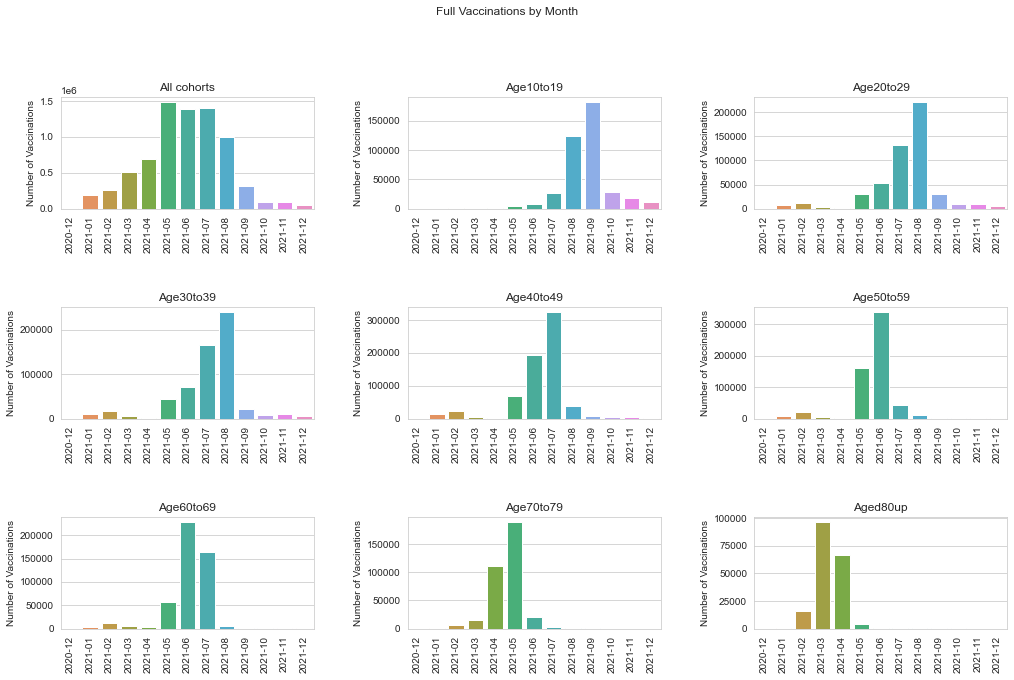

In [131]:
#plot full vaccinations by age

#set up a multiplot area 3 rows by 3 columns  
#don't share the ylabel 
#Set the size of the plots so that they are optimally visualised

fig, axes = plt.subplots(3,3, figsize = (15, 10))
fig.suptitle('Full Vaccinations by Month')

#define what's to go into each plot
sns.barplot(ax=axes[0,0], data=vaccines_IRL_M, x="Date", y="TotalweeklyVaccines")
sns.barplot(ax=axes[0,1],data=vaccines_IRL_M, x="Date", y="Fully_Age10to19")
sns.barplot(ax=axes[0,2], data=vaccines_IRL_M, x="Date", y="Fully_Age20to29")
sns.barplot(ax=axes[1,0],data=vaccines_IRL_M, x="Date", y="Fully_Age30to39")
sns.barplot(ax=axes[1,1],data=vaccines_IRL_M, x="Date", y="Fully_Age40to49")
sns.barplot(ax=axes[1,2],data=vaccines_IRL_M, x="Date", y="Fully_Age50to59")
sns.barplot(ax=axes[2,0],data=vaccines_IRL_M, x="Date", y="Fully_Age60to69")
sns.barplot(ax=axes[2,1],data=vaccines_IRL_M, x="Date", y="Fully_Age70to79")
sns.barplot(ax=axes[2,2],data=vaccines_IRL_M, x="Date", y="Fully_Age80_")


#set labels for x and y axes
axes[0,0].set_title("All cohorts")
axes[0,1].set_title("Age10to19")
axes[0,2].set_title("Age20to29")
axes[1,0].set_title("Age30to39")
axes[1,1].set_title("Age40to49")
axes[1,2].set_title("Age50to59")
axes[2,0].set_title("Age60to69")
axes[2,1].set_title("Age70to79")
axes[2,2].set_title("Aged80up")



# create a for loop to set up axes labels, ticks rotations and format of date
for ax in fig.axes:
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_ylabel("Number of Vaccinations")
    ax.set_xlabel("")

#Add padding between plots
fig.tight_layout(pad=4.0)

fig.savefig("Vacc_full.png", dpi=150)

plt.show()

In [ ]:
"""
>>check vaccinations and infections by age
"""

***

## Import and Clean data - Covid-19 UK

__Importing COVID-19 Dataset for UK__
[Click here for dataset source](https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumCasesByPublishDate&metric=newCasesBySpecimenDate&metric=newCasesByPublishDate&format=csv&release=2022-01-03)

In [132]:
#This dataset is a csv file saved locally, I import it as Pandas DataFrame.
covid_UK = pd.read_csv('/Users/Alessandra/Dropbox/Data Analytics/Project/UCDPA_AlessandraRavida/Data/overview_2022-01-03.csv')

__Understanding the dataset__

Check basic data structure of the data set via .info(), .head() functions.
Also note the first and last day of dataset for personal reference.

In [133]:
#I start analysing structure of the df
covid_UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   areaCode                705 non-null    object 
 1   areaName                705 non-null    object 
 2   areaType                705 non-null    object 
 3   date                    705 non-null    object 
 4   cumCasesByPublishDate   704 non-null    float64
 5   newCasesByPublishDate   704 non-null    float64
 6   newCasesBySpecimenDate  701 non-null    float64
dtypes: float64(3), object(4)
memory usage: 38.7+ KB


In [134]:
#look at the first 5 rows of the dataset

covid_UK.head()

areaCode        areaName  areaType        date  cumCasesByPublishDate  \
0  K02000001  United Kingdom  overview  2022-01-03             13422815.0   
1  K02000001  United Kingdom  overview  2022-01-02             13266431.0   
2  K02000001  United Kingdom  overview  2022-01-01             13117469.0   
3  K02000001  United Kingdom  overview  2021-12-31             12937886.0   
4  K02000001  United Kingdom  overview  2021-12-30             12748050.0   

   newCasesByPublishDate  newCasesBySpecimenDate  
0               157758.0                     NaN  
1               151663.0                     NaN  
2               179637.0                     NaN  
3               189846.0                     NaN  
4               189213.0                156830.0

In [135]:
#Check number of rows and columns
covid_UK.shape

(705, 7)

In [136]:
covid_UK.columns

Index(['areaCode', 'areaName', 'areaType', 'date', 'cumCasesByPublishDate',
       'newCasesByPublishDate', 'newCasesBySpecimenDate'],
      dtype='object')

In [138]:
"""
check first date in data set.
"""
#I select the first row of the dataframe via its index number and only the date column

covid_UK.loc[0 , "date"]

'2022-01-03'

In [139]:
"""
I now check what's the last date.
This information will be important to slice other time-based datasets.
"""
#I select the last row of the dataframe via its index number and only the date column

covid_UK.loc[704 , "date"]

'2020-01-30'

In [ ]:
"""
Dates are arranged in the opposite way from the Irish dataset.
I will need to clean the dataset and then sort the index.
"""

__Cleaning the dataset__

Check for NaN values and replace them with 0.0

In [140]:
#I check if there are NaN values
covid_UK.isna().sum()

areaCode                  0
areaName                  0
areaType                  0
date                      0
cumCasesByPublishDate     1
newCasesByPublishDate     1
newCasesBySpecimenDate    4
dtype: int64

In [141]:
#replacing NaN with 0 and check if successful

covid_UK_fill = covid_UK.fillna(0)
covid_UK_fill.isna().sum()

areaCode                  0
areaName                  0
areaType                  0
date                      0
cumCasesByPublishDate     0
newCasesByPublishDate     0
newCasesBySpecimenDate    0
dtype: int64

Convert Date column into datetime variables

In [142]:
"""
The display of the x axis needs to be addressed.
One problem could be that the Date column is not seen as date.
If I convert the date column into date variable Imight be able
to control the axes better.
"""

#I check the type of variables in the column Date
covid_UK_fill.dtypes

areaCode                   object
areaName                   object
areaType                   object
date                       object
cumCasesByPublishDate     float64
newCasesByPublishDate     float64
newCasesBySpecimenDate    float64
dtype: object

In [143]:
#I will convert the Date values into datetime variables
covid_UK_fill['date'] = pd.to_datetime(covid_UK_fill['date'], format= '%Y-%m-%d')

#I check if the format of the Date column has changed successfully
covid_UK_fill.dtypes

areaCode                          object
areaName                          object
areaType                          object
date                      datetime64[ns]
cumCasesByPublishDate            float64
newCasesByPublishDate            float64
newCasesBySpecimenDate           float64
dtype: object

In [144]:
#I want to see how the date column looks like
covid_UK_fill["date"]

0     2022-01-03
1     2022-01-02
2     2022-01-01
3     2021-12-31
4     2021-12-30
         ...    
700   2020-02-03
701   2020-02-02
702   2020-02-01
703   2020-01-31
704   2020-01-30
Name: date, Length: 705, dtype: datetime64[ns]

Set the Date column as index

In [145]:
#I set the date column as index
covid_UK_fill.set_index("date")

areaCode        areaName  areaType  cumCasesByPublishDate  \
date                                                                     
2022-01-03  K02000001  United Kingdom  overview             13422815.0   
2022-01-02  K02000001  United Kingdom  overview             13266431.0   
2022-01-01  K02000001  United Kingdom  overview             13117469.0   
2021-12-31  K02000001  United Kingdom  overview             12937886.0   
2021-12-30  K02000001  United Kingdom  overview             12748050.0   
...               ...             ...       ...                    ...   
2020-02-03  K02000001  United Kingdom  overview                    2.0   
2020-02-02  K02000001  United Kingdom  overview                    2.0   
2020-02-01  K02000001  United Kingdom  overview                    2.0   
2020-01-31  K02000001  United Kingdom  overview                    2.0   
2020-01-30  K02000001  United Kingdom  overview                    0.0   

            newCasesByPublishDate  newCasesBySpecimenDate  
date                                                       
2022-01-03               157758.0                     0.0  
2022-01-02               151663.0                     0.0  
2022-01-01               179637.0                     0.0  
2021-12-31               189846.0                     0.0  
2021-12-30               189213.0                156830.0  
...                           ...                     ...  
2020-02-03                    0.0                     0.0  
2020-02-02                    0.0                     0.0  
2020-02-01                    0.0                     0.0  
2020-01-31                    2.0                     0.0  
2020-01-30                    0.0                     2.0  

[705 rows x 6 columns]

Remove columns I am not interested in

In [146]:
#Drop columns I am not interested in
covid_UK_clean=covid_UK_fill.drop(["areaCode", "areaName","areaType", "cumCasesByPublishDate"], axis='columns')

#Check the columns in the new df
covid_UK_clean.columns


Index(['date', 'newCasesByPublishDate', 'newCasesBySpecimenDate'], dtype='object')

Rearrange timeline from oldest to newest date

In [147]:
#sort by index value in descending order
covid_UK_ordered=covid_UK_clean.sort_index(ascending=False)

#quick check
covid_UK_ordered.head(5)

date  newCasesByPublishDate  newCasesBySpecimenDate
704 2020-01-30                    0.0                     2.0
703 2020-01-31                    2.0                     0.0
702 2020-02-01                    0.0                     0.0
701 2020-02-02                    0.0                     0.0
700 2020-02-03                    0.0                     0.0

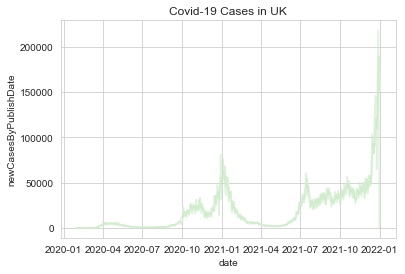

In [148]:
#Checking the difference between the two sets of data
g=sns.lineplot(data=covid_UK_ordered, x="date",y="newCasesByPublishDate")
g=sns.lineplot(data=covid_UK_ordered, x="date",y="newCasesBySpecimenDate", alpha=0.5)

g.set_title("Covid-19 Cases in UK")

plt.show()

***

## Import and Clean data - Covid-19 NI

__Importing COVID-19 Dataset for NI__
[Click here for dataset source](https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=N92000002&metric=cumCasesByPublishDate&metric=cumCasesBySpecimenDate&metric=newCasesByPublishDate&metric=newCasesBySpecimenDate&format=csv&release=2022-01-03)

In [149]:
#This dataset is a csv file saved locally, I import it as Pandas DataFrame.
covid_NI = pd.read_csv('/Users/Alessandra/Dropbox/Data Analytics/Project/UCDPA_AlessandraRavida/Data/nation_2022-01-03.csv')

__Understanding the dataset__

Check basic data structure of the data set via .info(), .head() functions.
Also note the first and last day of dataset for personal reference.

In [150]:
#I start analysing structure of the df
covid_NI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   areaCode                670 non-null    object 
 1   areaName                670 non-null    object 
 2   areaType                670 non-null    object 
 3   date                    670 non-null    object 
 4   cumCasesByPublishDate   669 non-null    float64
 5   cumCasesBySpecimenDate  669 non-null    float64
 6   newCasesByPublishDate   669 non-null    float64
 7   newCasesBySpecimenDate  666 non-null    float64
dtypes: float64(4), object(4)
memory usage: 42.0+ KB


In [151]:
#look at the first 5 rows of the dataset

covid_NI.head()

areaCode          areaName areaType        date  cumCasesByPublishDate  \
0  N92000002  Northern Ireland   nation  2022-01-03               402069.0   
1  N92000002  Northern Ireland   nation  2022-01-02               402069.0   
2  N92000002  Northern Ireland   nation  2022-01-01               402069.0   
3  N92000002  Northern Ireland   nation  2021-12-31               402069.0   
4  N92000002  Northern Ireland   nation  2021-12-30               394854.0   

   cumCasesBySpecimenDate  newCasesByPublishDate  newCasesBySpecimenDate  
0                     NaN                    0.0                     NaN  
1                402069.0                    0.0                     NaN  
2                402069.0                    0.0                     NaN  
3                402069.0                 7215.0                     NaN  
4                402069.0                 4701.0                  1142.0

In [158]:
covid_NI.columns

Index(['areaCode', 'areaName', 'areaType', 'date', 'cumCasesByPublishDate',
       'cumCasesBySpecimenDate', 'newCasesByPublishDate',
       'newCasesBySpecimenDate'],
      dtype='object')

In [152]:
#Check number of rows and columns
covid_NI.shape

(670, 8)

In [153]:
"""
check first date in data set.
"""
#I select the first row of the dataframe via its index number and only the date column

covid_NI.loc[0 , "date"]

'2022-01-03'

In [154]:
"""
I now check what's the last date.
This information will be important to slice other time-based datasets.
"""
#I select the last row of the dataframe via its index number and only the date column

covid_NI.loc[669 , "date"]

'2020-03-05'

In [ ]:
"""
Dates are arranged in the opposite way from the Irish dataset.
I will need to clean the dataset and then sort the index.
"""

__Cleaning the dataset__

Check for NaN values and replace them with 0.0

In [155]:
#I check if there are NaN values
covid_NI.isna().sum()

areaCode                  0
areaName                  0
areaType                  0
date                      0
cumCasesByPublishDate     1
cumCasesBySpecimenDate    1
newCasesByPublishDate     1
newCasesBySpecimenDate    4
dtype: int64

In [156]:
#replacing NaN with 0 and check if successful

covid_NI_fill = covid_NI.fillna(0)
covid_NI_fill.isna().sum()

areaCode                  0
areaName                  0
areaType                  0
date                      0
cumCasesByPublishDate     0
cumCasesBySpecimenDate    0
newCasesByPublishDate     0
newCasesBySpecimenDate    0
dtype: int64

Convert Date column into datetime variables

In [159]:
"""
The display of the x axis needs to be addressed.
One problem could be that the Date column is not seen as date.
If I convert the date column into date variable Imight be able
to control the axes better.
"""

#I check the type of variables in the column Date
covid_NI_fill.dtypes

areaCode                   object
areaName                   object
areaType                   object
date                       object
cumCasesByPublishDate     float64
cumCasesBySpecimenDate    float64
newCasesByPublishDate     float64
newCasesBySpecimenDate    float64
dtype: object

In [160]:
#I will convert the Date values into datetime variables
covid_NI_fill['date'] = pd.to_datetime(covid_NI_fill['date'], format= '%Y-%m-%d')

#I check if the format of the Date column has changed successfully
covid_NI_fill.dtypes

areaCode                          object
areaName                          object
areaType                          object
date                      datetime64[ns]
cumCasesByPublishDate            float64
cumCasesBySpecimenDate           float64
newCasesByPublishDate            float64
newCasesBySpecimenDate           float64
dtype: object

In [161]:
#I want to see how the date column looks like
covid_NI_fill["date"]

0     2022-01-03
1     2022-01-02
2     2022-01-01
3     2021-12-31
4     2021-12-30
         ...    
665   2020-03-09
666   2020-03-08
667   2020-03-07
668   2020-03-06
669   2020-03-05
Name: date, Length: 670, dtype: datetime64[ns]

Set the Date column as index

In [162]:
#I set the date column as index
covid_NI_fill.set_index("date")

areaCode          areaName areaType  cumCasesByPublishDate  \
date                                                                      
2022-01-03  N92000002  Northern Ireland   nation               402069.0   
2022-01-02  N92000002  Northern Ireland   nation               402069.0   
2022-01-01  N92000002  Northern Ireland   nation               402069.0   
2021-12-31  N92000002  Northern Ireland   nation               402069.0   
2021-12-30  N92000002  Northern Ireland   nation               394854.0   
...               ...               ...      ...                    ...   
2020-03-09  N92000002  Northern Ireland   nation                   12.0   
2020-03-08  N92000002  Northern Ireland   nation                    9.0   
2020-03-07  N92000002  Northern Ireland   nation                    4.0   
2020-03-06  N92000002  Northern Ireland   nation                    2.0   
2020-03-05  N92000002  Northern Ireland   nation                    0.0   

            cumCasesBySpecimenDate  newCasesByPublishDate  \
date                                                        
2022-01-03                     0.0                    0.0   
2022-01-02                402069.0                    0.0   
2022-01-01                402069.0                    0.0   
2021-12-31                402069.0                 7215.0   
2021-12-30                402069.0                 4701.0   
...                            ...                    ...   
2020-03-09                    15.0                    3.0   
2020-03-08                    12.0                    5.0   
2020-03-07                     9.0                    2.0   
2020-03-06                     4.0                    2.0   
2020-03-05                     2.0                    0.0   

            newCasesBySpecimenDate  
date                                
2022-01-03                     0.0  
2022-01-02                     0.0  
2022-01-01                     0.0  
2021-12-31                     0.0  
2021-12-30                  1142.0  
...                            ...  
2020-03-09                     3.0  
2020-03-08                     3.0  
2020-03-07                     5.0  
2020-03-06                     2.0  
2020-03-05                     2.0  

[670 rows x 7 columns]

Remove columns I am not interested in

In [163]:
#Drop columns I am not interested in
covid_NI_clean=covid_NI_fill.drop(["areaCode", "areaName","areaType", "cumCasesByPublishDate"], axis='columns')

#Check the columns in the new df
covid_NI_clean.columns


Index(['date', 'cumCasesBySpecimenDate', 'newCasesByPublishDate',
       'newCasesBySpecimenDate'],
      dtype='object')

Rearrange timeline from oldest to newest date

In [164]:
#sort by index value in descending order
covid_NI_ordered=covid_NI_clean.sort_index(ascending=False)

#quick check
covid_NI_ordered.head(5)

date  cumCasesBySpecimenDate  newCasesByPublishDate  \
669 2020-03-05                     2.0                    0.0   
668 2020-03-06                     4.0                    2.0   
667 2020-03-07                     9.0                    2.0   
666 2020-03-08                    12.0                    5.0   
665 2020-03-09                    15.0                    3.0   

     newCasesBySpecimenDate  
669                     2.0  
668                     2.0  
667                     5.0  
666                     3.0  
665                     3.0

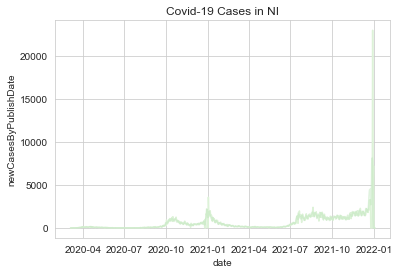

In [165]:
#Checking the difference between the two sets of data
g=sns.lineplot(data=covid_NI_ordered, x="date",y="newCasesByPublishDate")
g=sns.lineplot(data=covid_NI_ordered, x="date",y="newCasesBySpecimenDate", alpha=0.5)

g.set_title("Covid-19 Cases in NI")

plt.show()

***

# Averaging cases based on population

In order to compare data from different countries I will manipulate the data and use cases per 100,000 instead of absolute values.

__Custom Function__

In [166]:
# "a" is casese number and 
# "b" is the popuplation of the country in MILLIONS
# "answer" is the mathematical operation that yields the cases per 100,000
# returning this function as the variable "answer"

def cases_per_100k(a, b): 
    answer = (a /10)/b 
    return answer

Before I operate the custom funtion I need to remove the time column from the datasets and then I'll add it again.
Most likely there is a neater way to do this.

NI

In [169]:
#Drop the date column
NI_dates_dropped=covid_NI_ordered.drop("date",axis="columns")

#NI population = 1.885 million (2019)
covid_NI_per_100k=cases_per_100k(NI_dates_dropped,1.885)

#add the date column back and set as index
covid_NI_per_100k["Date"]=covid_NI_ordered["date"]

#I set the date column as index
covid_NI_per_100k=covid_NI_per_100k.set_index("Date")

#Check first few rows of df
covid_NI_per_100k.head()


cumCasesBySpecimenDate  newCasesByPublishDate  \
Date                                                        
2020-03-05                0.106101               0.000000   
2020-03-06                0.212202               0.106101   
2020-03-07                0.477454               0.106101   
2020-03-08                0.636605               0.265252   
2020-03-09                0.795756               0.159151   

            newCasesBySpecimenDate  
Date                                
2020-03-05                0.106101  
2020-03-06                0.106101  
2020-03-07                0.265252  
2020-03-08                0.159151  
2020-03-09                0.159151

UK

In [171]:
#Drop the date column
UK_dates_dropped=covid_UK_ordered.drop("date",axis="columns")

#UK population = 67.22 million (2020)
covid_UK_per_100k=cases_per_100k(UK_dates_dropped,67.22)

#add the date column back and set as index
covid_UK_per_100k["Date"]=covid_UK_ordered["date"]

#I set the date column as index
covid_UK_per_100k=covid_UK_per_100k.set_index("Date")

#Check first few rows of df
covid_UK_per_100k.head()


newCasesByPublishDate  newCasesBySpecimenDate
Date                                                     
2020-01-30               0.000000                0.002975
2020-01-31               0.002975                0.000000
2020-02-01               0.000000                0.000000
2020-02-02               0.000000                0.000000
2020-02-03               0.000000                0.000000

ROI

In [173]:
#Drop the date column
IRL_dates_dropped=covid_IRL_ordered.drop(["Date", "FID"],axis="columns")

#ROI population = 4.995 million (2020)
covid_IRL_per_100k=cases_per_100k(IRL_dates_dropped,4.995)

#add the date column back and set as index
covid_IRL_per_100k["Date"]=covid_IRL_ordered["Date"]

#I set the date column as index
covid_IRL_per_100k=covid_IRL_per_100k.set_index("Date")

#Check first few rows of df
covid_IRL_per_100k.head()


ConfirmedCovidCases  TotalConfirmedCovidCases  \
Date                                                                       
2020-02-29 00:00:00+00:00              0.02002                   0.02002   
2020-03-03 00:00:00+00:00              0.02002                   0.04004   
2020-03-04 00:00:00+00:00              0.08008                   0.12012   
2020-03-05 00:00:00+00:00              0.14014                   0.26026   
2020-03-06 00:00:00+00:00              0.10010                   0.36036   

                           ConfirmedCovidDeaths  TotalCovidDeaths  \
Date                                                                
2020-02-29 00:00:00+00:00                   0.0               0.0   
2020-03-03 00:00:00+00:00                   0.0               0.0   
2020-03-04 00:00:00+00:00                   0.0               0.0   
2020-03-05 00:00:00+00:00                   0.0               0.0   
2020-03-06 00:00:00+00:00                   0.0               0.0   

                           HospitalisedCovidCases  RequiringICUCovidCases  \
Date                                                                        
2020-02-29 00:00:00+00:00                 0.00000                     0.0   
2020-03-03 00:00:00+00:00                 0.00000                     0.0   
2020-03-04 00:00:00+00:00                 0.00000                     0.0   
2020-03-05 00:00:00+00:00                 0.02002                     0.0   
2020-03-06 00:00:00+00:00                 0.08008                     0.0   

                           Aged1to4  Aged5to14  Aged15to24  Aged25to34  ...  \
Date                                                                    ...   
2020-02-29 00:00:00+00:00       0.0    0.00000         0.0         0.0  ...   
2020-03-03 00:00:00+00:00       0.0    0.00000         0.0         0.0  ...   
2020-03-04 00:00:00+00:00       0.0    0.02002         0.0         0.0  ...   
2020-03-05 00:00:00+00:00       0.0    0.02002         0.0         0.0  ...   
2020-03-06 00:00:00+00:00       0.0    0.04004         0.0         0.0  ...   

                           HospitalisedAged35to44_diff  \
Date                                                     
2020-02-29 00:00:00+00:00                      0.00000   
2020-03-03 00:00:00+00:00                      0.00000   
2020-03-04 00:00:00+00:00                      0.00000   
2020-03-05 00:00:00+00:00                      0.00000   
2020-03-06 00:00:00+00:00                      0.04004   

                           HospitalisedAged45to54_diff  \
Date                                                     
2020-02-29 00:00:00+00:00                      0.00000   
2020-03-03 00:00:00+00:00                      0.00000   
2020-03-04 00:00:00+00:00                      0.00000   
2020-03-05 00:00:00+00:00                      0.02002   
2020-03-06 00:00:00+00:00                      0.00000   

                           HospitalisedAged55to64_diff  \
Date                                                     
2020-02-29 00:00:00+00:00                          0.0   
2020-03-03 00:00:00+00:00                          0.0   
2020-03-04 00:00:00+00:00                          0.0   
2020-03-05 00:00:00+00:00                          0.0   
2020-03-06 00:00:00+00:00                          0.0   

                           HospitalisedAged65to74_diff  \
Date                                                     
2020-02-29 00:00:00+00:00                          0.0   
2020-03-03 00:00:00+00:00                          0.0   
2020-03-04 00:00:00+00:00                          0.0   
2020-03-05 00:00:00+00:00                          0.0   
2020-03-06 00:00:00+00:00                          0.0   

                           HospitalisedAged75to84_diff  \
Date                                                     
2020-02-29 00:00:00+00:00                          0.0   
2020-03-03 00:00:00+00:00                          0.0   
2020-03-04 00:00:00+00:00                          0.0  

__Merge DataFrames__


In [174]:
#Before doing the join I check the shape of the left table
covid_IRL_per_100k.shape

(673, 55)

In [175]:
#The Irish dataset contains time (with timezone info) in its index
#Since the other two datasets don't have time info, I need to remove this to avoid errors in the merge
covid_IRL_per_100k.index = covid_IRL_per_100k.index.date

In [176]:
#I left join the three columns on their indexes giving suffixes for columns with overlapping names
covid_per_100k=covid_IRL_per_100k.merge(covid_UK_per_100k, how="left", 
                                        left_index=True, right_index=True, 
                                        suffixes=('_ROI','_UK')).merge(covid_NI_per_100k, how="left",
                                                                      left_index=True, right_index=True,
                                                                      suffixes=('_UK', '_NI'))

#check the shape of the new df to make sure I have the same amount of rows
covid_per_100k.shape

(673, 60)

In [164]:
#check that the columns have been named properly
covid_per_100k.columns

Index(['ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown', 'newCasesByPublishDate_UK', 'newCasesBySpecimenDate_UK',
       'cumCasesBySpecimenDate', 'newCasesByPublishDate_NI',
       'newCasesBySpecimenDate_NI'],
      dtype='object')

__Analysis and Visualization__

I want to see if the three countries follow similar infection patterns, meaning that they influence/infect each other. If so it would be interesting to see which country leads (where are the infections coming from).

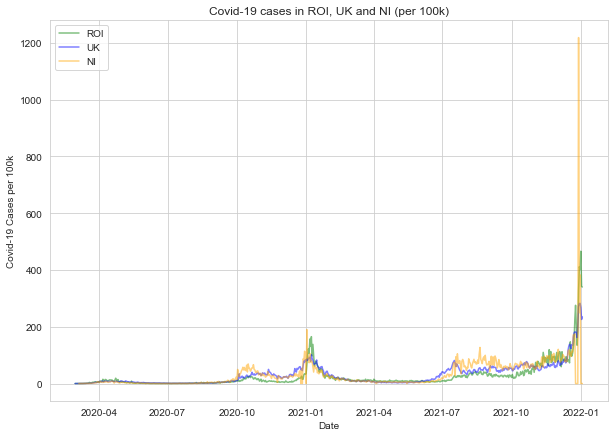

In [178]:
#I make a 3 lines plot using data from ROI, UK and NI

#set the fig size
fig, ax=plt.subplots(figsize=(10,7))

#ROI line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["ConfirmedCovidCases"], 
         linestyle= "-", alpha=0.5, color='g', label="ROI")

#UK line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["newCasesByPublishDate_UK"], 
         linestyle="-", alpha=0.5, color='b', label="UK")

#NI line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["newCasesByPublishDate_NI"], 
         linestyle="-", alpha=0.5, color='orange', label="NI")

#set axes labels, plot title and legend 
plt.xlabel("Date")
plt.ylabel("Covid-19 Cases per 100k")
plt.title("Covid-19 cases in ROI, UK and NI (per 100k)")
plt.legend()

fig.savefig("ROI_UK_NI.png", dpi=150)

plt.show()



In [ ]:
"""
The three countries seem to follow similar infection patterns.
Interestingly NI has the highest infection/100k rate between the three countries.

This chart is interesting but because the lines are overlapping to much it might be better
to look at the trends individually and maybe in pairs.
"""

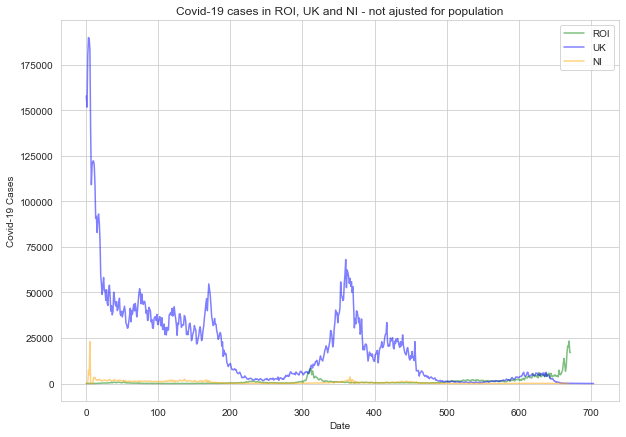

In [170]:
#I make a 3 lines plot using data from ROI, UK and NI

#set the fig size
fig, ax=plt.subplots(figsize=(10,7))

#ROI line - setting colour, transparency and label
plt.plot(covid_IRL_ordered.index, covid_IRL_ordered["ConfirmedCovidCases"], 
         linestyle= "-", alpha=0.5, color='g', label="ROI")

#UK line - setting colour, transparency and label
plt.plot(covid_UK_ordered.index, covid_UK_ordered["newCasesByPublishDate"], 
         linestyle="-", alpha=0.5, color='b', label="UK")

#NI line - setting colour, transparency and label
plt.plot(covid_NI_ordered.index, covid_NI_ordered["newCasesByPublishDate"], 
         linestyle="-", alpha=0.5, color='orange', label="NI")

#set axes labels, plot title and legend 
plt.xlabel("Date")
plt.ylabel("Covid-19 Cases")
plt.title("Covid-19 cases in ROI, UK and NI - not ajusted for population")
plt.legend()


plt.show()




In [ ]:
"""
If I compared the three countries without adjustment for popuplation 
it would have been more difficult to compare trends. 
"""

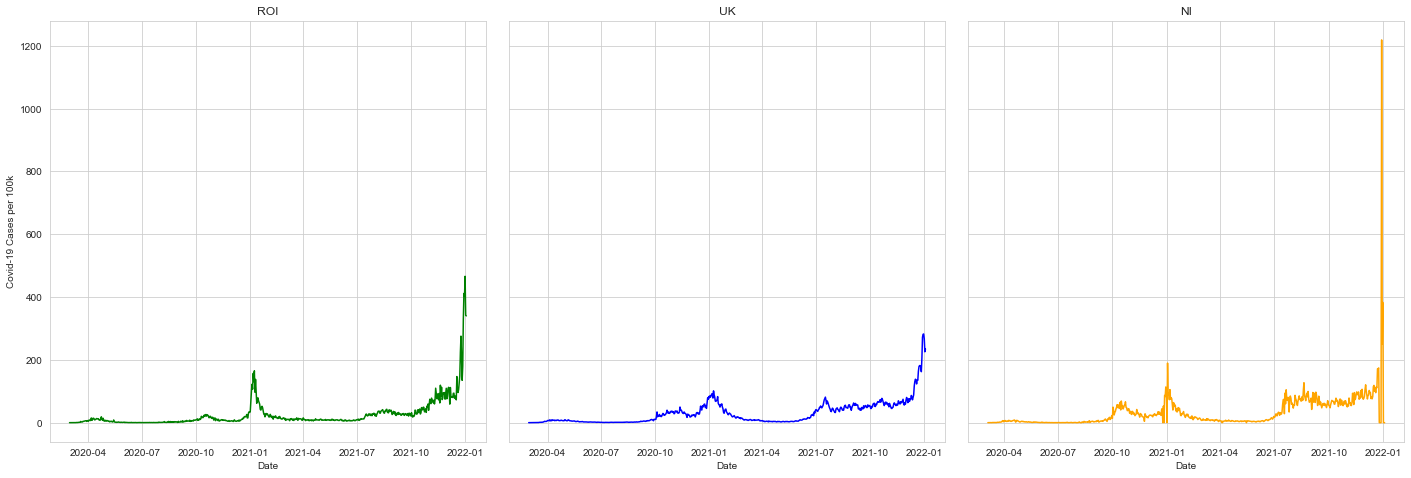

In [179]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(20,7))
ax[0].plot(covid_per_100k.index,covid_per_100k["ConfirmedCovidCases"], color="g")
ax[1].plot(covid_per_100k.index,covid_per_100k["newCasesByPublishDate_UK"], color="b")
ax[2].plot(covid_per_100k.index,covid_per_100k["newCasesByPublishDate_NI"], color="orange")

#set labels for x and y axes
ax[0].set_ylabel("Covid-19 Cases per 100k")
ax[0].set_xlabel("Date")
ax[1].set_xlabel("Date")
ax[2].set_xlabel("Date")

#set titles
ax[0].set_title("ROI")
ax[1].set_title("UK")
ax[2].set_title("NI")

#Add padding between plots
fig.tight_layout(pad=2.0)

fig.savefig("ROI_UK_NI_2.png", dpi=150)
plt.show()



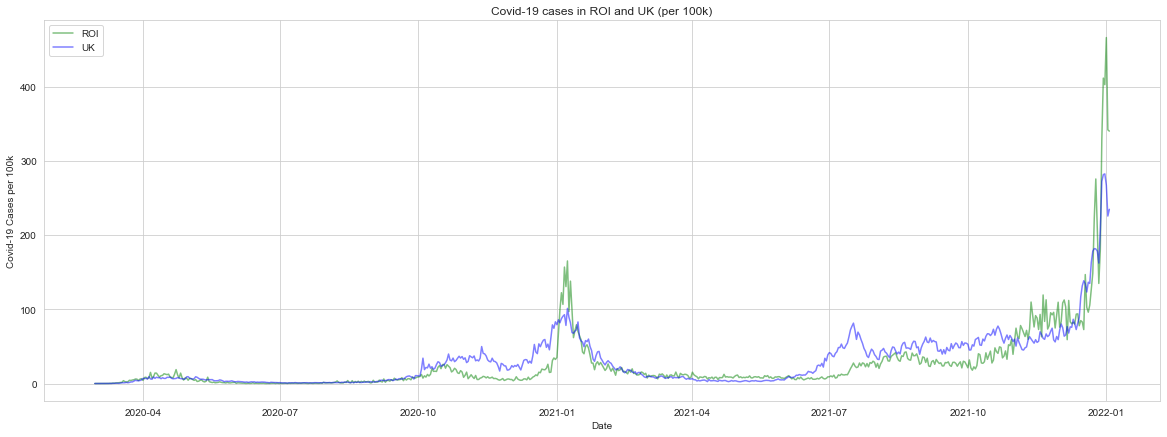

In [181]:
#I compare the trends of 2 countries at one time
#I make a 3 lines plot using data from ROI, UK and NI

#set the fig size
fig, ax=plt.subplots(figsize=(20,7))

#ROI line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["ConfirmedCovidCases"], 
         linestyle= "-", alpha=0.5, color='g', label="ROI")

#UK line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["newCasesByPublishDate_UK"], 
         linestyle="-", alpha=0.5, color='b', label="UK")

#set axes labels, plot title and legend 
plt.xlabel("Date")
plt.ylabel("Covid-19 Cases per 100k")
plt.title("Covid-19 cases in ROI and UK (per 100k)")
plt.legend()


fig.savefig("ROI_UK.png", dpi=150)
plt.show()




In [ ]:
"""
UK cases per 100k are generally slightly higher overall, but Irish peaks after 
Xmas are higher than the UK for both years.

Cases in the UK seem to peak before ROI.
- In Oct 2020 UK peaked sooner but the decrease was slower
- In Dec 2020 UK peaked sooner
- In July 2021 UK peaked sooner
- In Dec(?) 2021 ROI had a spike that it's not there in the UK
"""

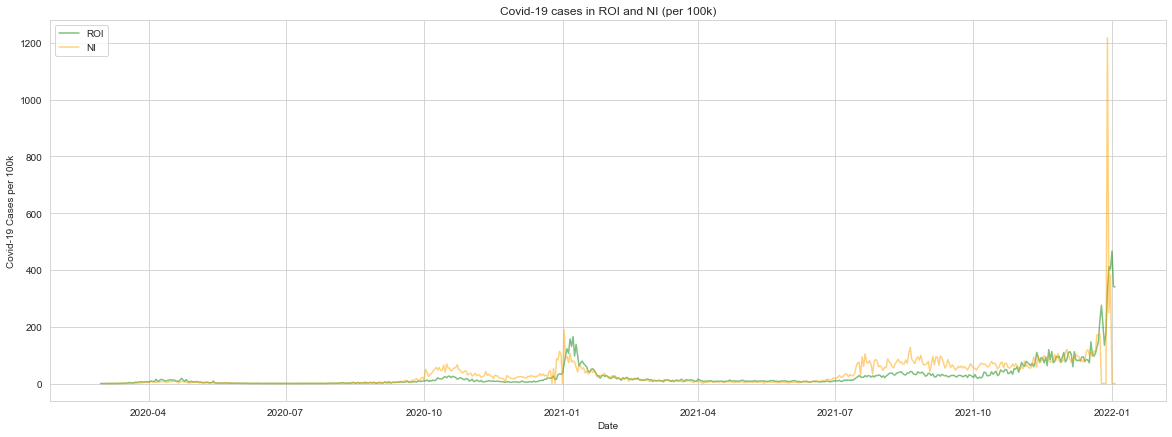

In [182]:
#I compare the trends of 2 countries at one time
#I make a 2 lines plot using data from ROI and NI

#set the fig size
fig, ax=plt.subplots(figsize=(20,7))

#ROI line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["ConfirmedCovidCases"], 
         linestyle= "-", alpha=0.5, color='g', label="ROI")

#UK line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["newCasesByPublishDate_NI"], 
         linestyle="-", alpha=0.5, color='orange', label="NI")

#set axes labels, plot title and legend 
plt.xlabel("Date")
plt.ylabel("Covid-19 Cases per 100k")
plt.title("Covid-19 cases in ROI and NI (per 100k)")
plt.legend()


fig.savefig("ROI_NI.png", dpi=150)
plt.show()





In [ ]:
"""
It looks like that in most cases ROI and NI are aligned in trends.
In Oct 2020 NI peaked before ROI
Dec-Jan 2021 where cases in NI peaked before ROI.
"""

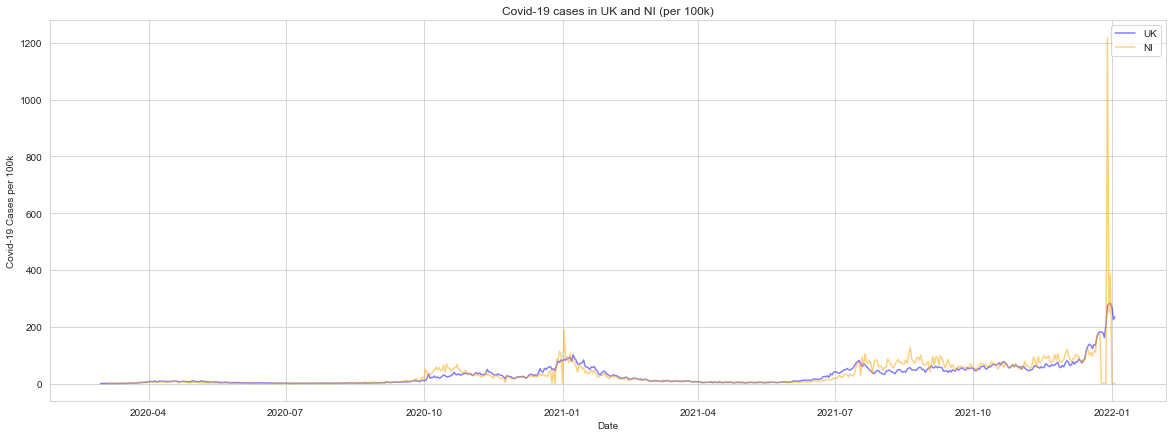

In [183]:
#I compare the trends of 2 countries at one time
#I make a 2 lines plot using data from ROI and NI

#set the fig size
fig, ax=plt.subplots(figsize=(20,7))

#ROI line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["newCasesByPublishDate_UK"], 
         linestyle= "-", alpha=0.5, color='b', label="UK")

#UK line - setting colour, transparency and label
plt.plot(covid_per_100k.index, covid_per_100k["newCasesByPublishDate_NI"], 
         linestyle="-", alpha=0.5, color='orange', label="NI")

#set axes labels, plot title and legend 
plt.xlabel("Date")
plt.ylabel("Covid-19 Cases per 100k")
plt.title("Covid-19 cases in UK and NI (per 100k)")
plt.legend()

fig.savefig("UK_NI.png", dpi=150)
plt.show()






In [180]:
"""
UK and NI trends seem to be very aligned.
Oct 2020 NI peaked earlier?
July 2021 UK peaked earlier?
"""

'\nUK and NI trends seem to be very aligned.\nOct 2020 NI peaked earlier?\nJuly 2021 UK peaked earlier?\n'

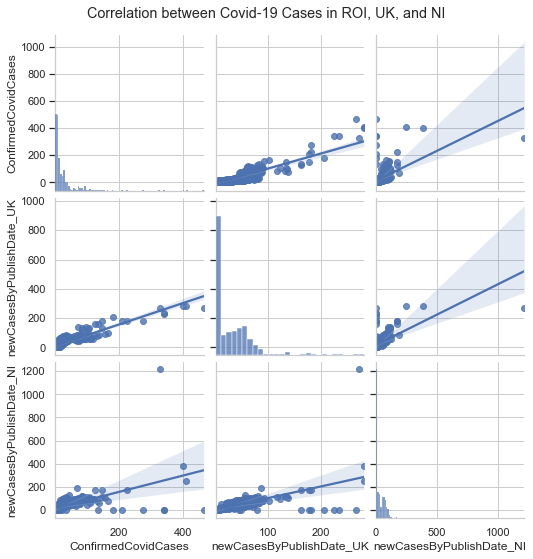

In [224]:
#check correlation between three datasets with Pair plot with regression
#set title and save fig

g=sns.pairplot(covid_per_100k, vars=["ConfirmedCovidCases", "newCasesByPublishDate_UK", "newCasesByPublishDate_NI" ], kind="reg", diag_kind="hist", palette="tab10")
g.fig.suptitle("Correlation between Covid-19 Cases in ROI, UK, and NI", y=1.03)
g.savefig("ROI_UK_NI_PP.png", dpi=150)
plt.show()

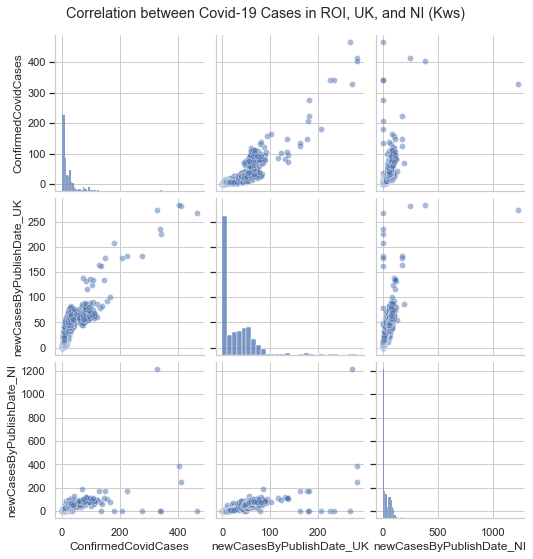

In [225]:
#check correlation between three datasets with Pair plot with regression

g=sns.pairplot(covid_per_100k, vars=["ConfirmedCovidCases", "newCasesByPublishDate_UK", "newCasesByPublishDate_NI" ], 
             plot_kws={"alpha":0.5})
g.fig.suptitle("Correlation between Covid-19 Cases in ROI, UK, and NI (Kws)", y=1.03)

g.savefig("ROI_UK_NI_PP_kws.png", dpi=150)
plt.show()

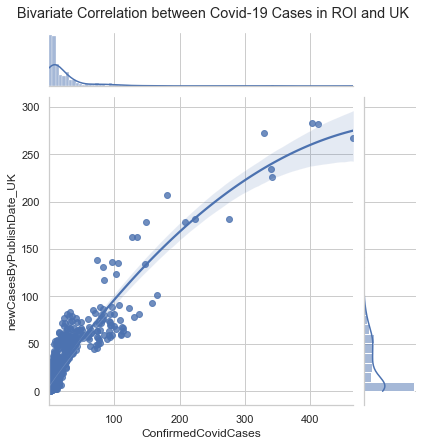

In [227]:
#I check bivariate correlation (order 2) between UK and ROI using jointplot
g= sns.jointplot(data=covid_per_100k, 
                 x= "ConfirmedCovidCases", 
                 y="newCasesByPublishDate_UK", 
                 kind="reg", order=2)
g.fig.suptitle("Bivariate Correlation between Covid-19 Cases in ROI and UK", y=1.03)
g.savefig("ROI_UK_JP.png", dpi=150)
plt.show()

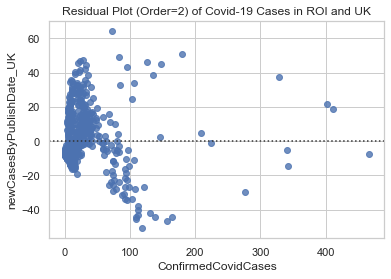

In [244]:
#Check validity of regression via resid plot
sns.residplot(data=covid_per_100k, x= "ConfirmedCovidCases", 
              y="newCasesByPublishDate_UK", order=2).set(title="Residual Plot (Order=2) of Covid-19 Cases in ROI and UK")

#fig = plt.Figure()
#fig.savefig("ROI_UK_Res.png", dpi=150)
plt.show()

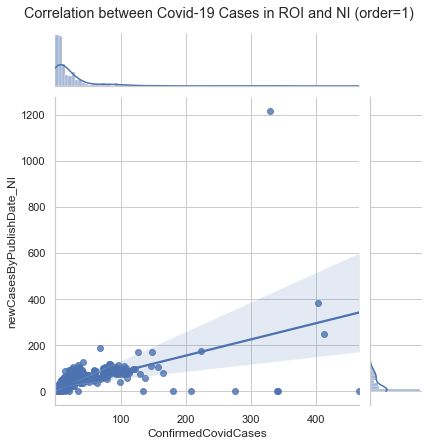

In [243]:
#I check bivariate correlation (order 2) between NI and ROI using jointplot
g= sns.jointplot(data=covid_per_100k, 
                 x= "ConfirmedCovidCases", 
                 y="newCasesByPublishDate_NI", kind="reg", order=1)
g.fig.suptitle("Correlation between Covid-19 Cases in ROI and NI (order=1)", y=1.03)
g.savefig("ROI_NI_JP.png", dpi=150)
plt.show()

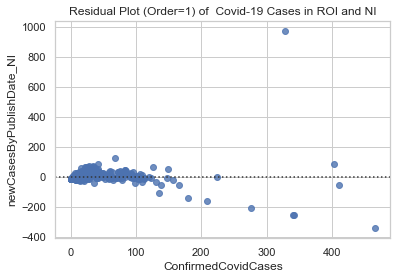

In [247]:
#Check validity of regression via resid plot
sns.residplot(data=covid_per_100k, 
              x= "ConfirmedCovidCases", 
              y="newCasesByPublishDate_NI", order=1).set(title="Residual Plot (Order=1) of  Covid-19 Cases in ROI and NI")

#fig = plt.Figure()
#fig.savefig("ROI_NI_Res.png", dpi=150)

plt.show()